In [242]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [76]:
plt.rcParams['figure.dpi'] = 300
sns.set_context('talk', font_scale= 1.2)

# Figure 2B

In [31]:
subsample_path = '/Users/bendalllab/Documents/PlacentaMAExpression'

In [32]:
dec_pheno_csv = 'decidua_sample_info.csv'
pheno_filepath = os.path.join(subsample_path, dec_pheno_csv)
pheno = pd.read_csv(pheno_filepath, index_col = 0)

In [33]:
dec_immune_vals_csv = 'decidua_immune_exprs.csv'
immune_vals_filepath = os.path.join(subsample_path, dec_immune_vals_csv)
immune_vals = pd.read_csv(immune_vals_filepath, index_col = 0)

In [34]:
immune_dec_ch_csv = 'ch_dec_immune_info.csv'
ch_info_filepath = os.path.join(subsample_path, immune_dec_ch_csv)
ch_info = pd.read_csv(ch_info_filepath, index_col = 0)
imm_ch_genes = ch_info['Symbol'].unique()

In [35]:
sample_dict = pheno['day'].to_dict()
gene_probe_dict = immune_vals['Symbol'].to_dict()
immune_t = immune_vals.loc[:, 'GSM282835': 'GSM282850'].transpose()
immune_heatmap = immune_t.transpose()
immune_heatmap.rename(index = gene_probe_dict, columns = sample_dict, inplace = True)
decidua_imm_ch = immune_heatmap[immune_heatmap.index.str.upper().isin(imm_ch_genes)]

In [36]:
dec_immune_ch_csv = '20200826_decidua_immune_ch.csv'
dec_immune_ch_filepath = os.path.join(subsample_path, dec_immune_ch_csv)
decidua_imm_ch.to_csv(dec_immune_ch_filepath, index = False)

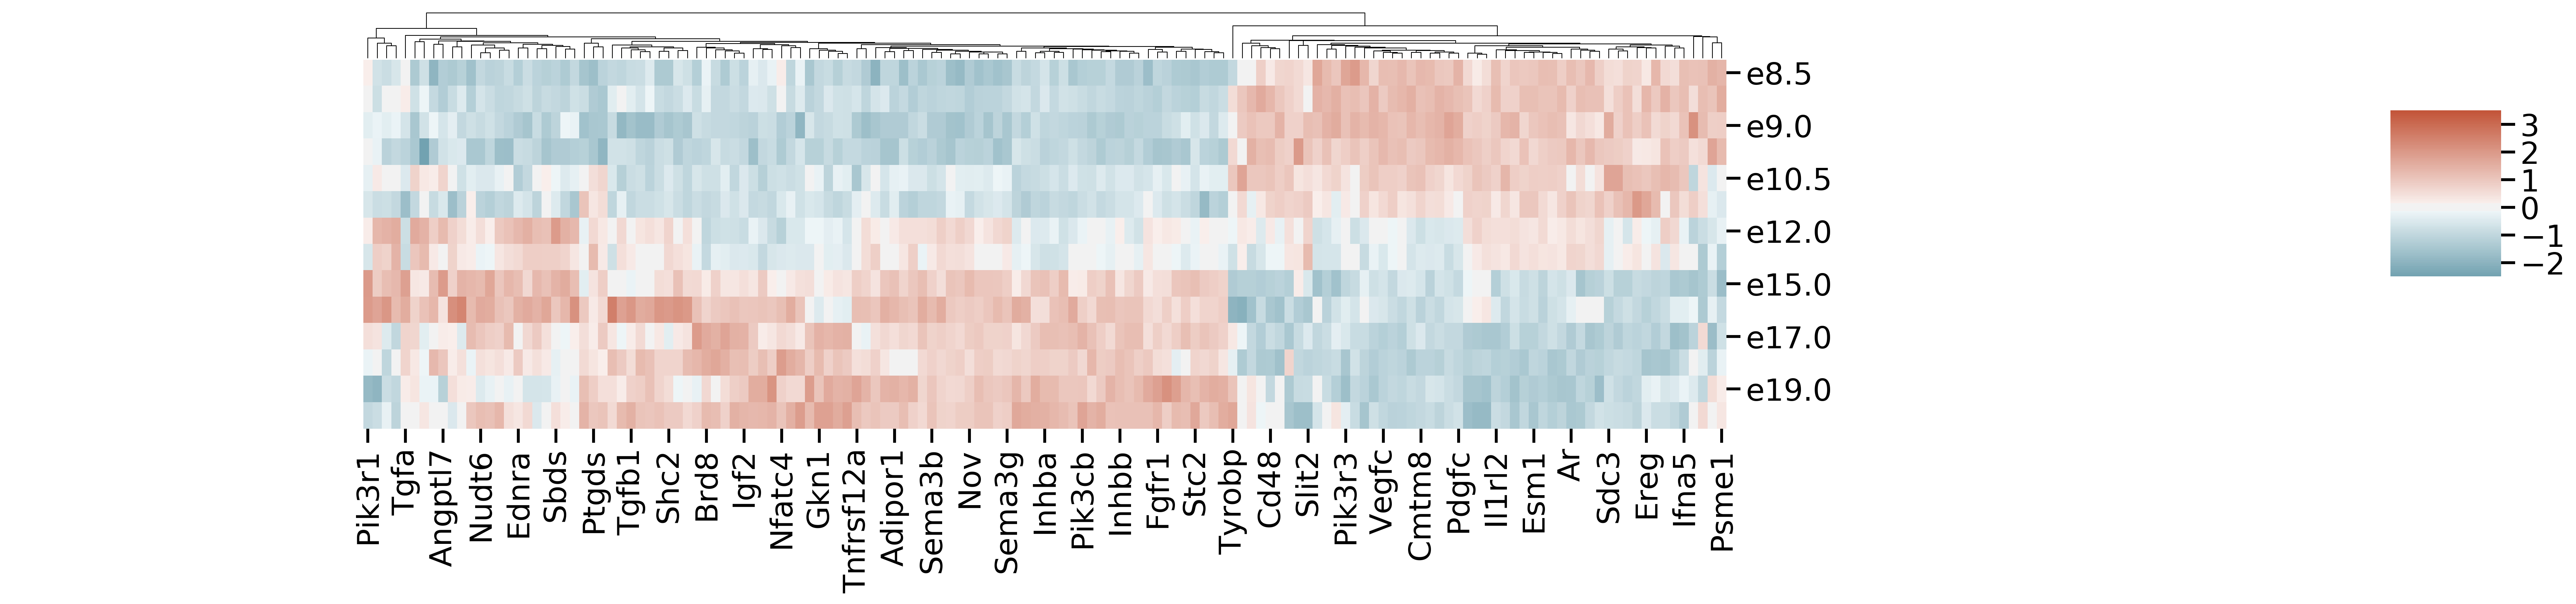

In [41]:
cg = sns.clustermap(decidua_imm_ch.transpose(), figsize=(20, 5),
               z_score = 1, center = 0,cmap = sns.diverging_palette(220, 20, n=200),
               row_cluster = False, col_cluster = True, vmin=-2.5, vmax=3.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg.cax.set_position((1.2,0.4,.05,.3))

In [38]:
vasc_dec_ch_csv = 'ch_dec_vasc_info.csv'
ch_vasc_expr_filepath = os.path.join(subsample_path, vasc_dec_ch_csv)
ch_vasc_expr = pd.read_csv(ch_vasc_expr_filepath, index_col = 0)

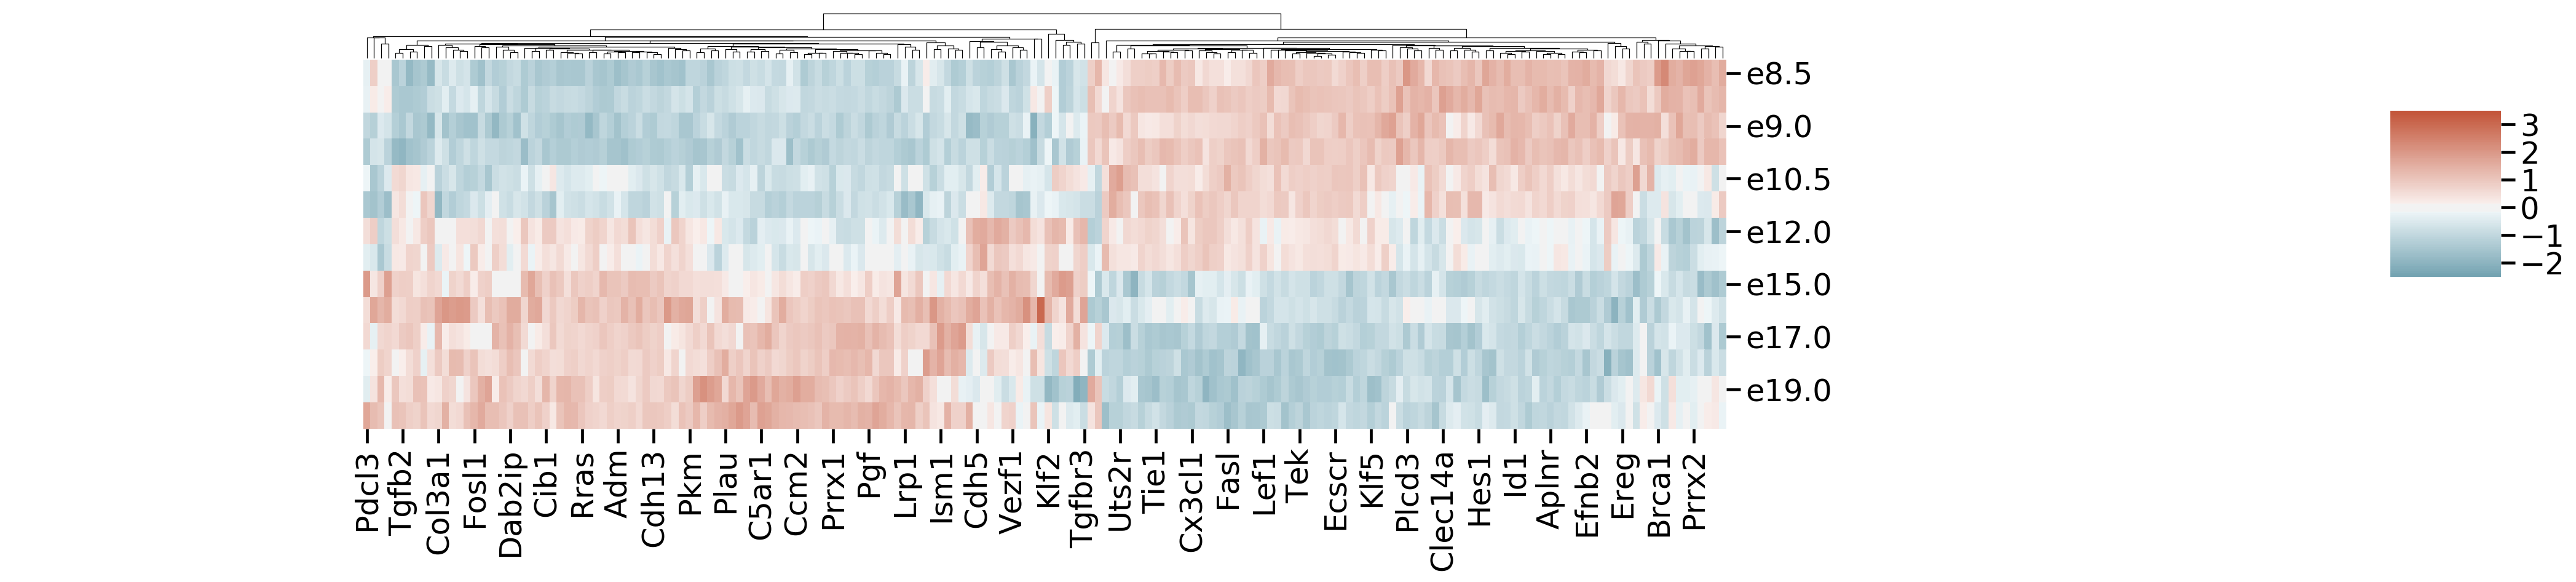

In [42]:
plt.rcParams['figure.dpi'] = 180
cg = sns.clustermap(ch_vasc_expr.transpose(), figsize=(20, 5),
               z_score = 1, center = 0,cmap = sns.diverging_palette(220, 20, n=200),
               row_cluster = False, col_cluster = True, vmin=-2.5, vmax=3.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg.cax.set_position((1.2,0.4,.05,.3))

# Figure 2C

In [244]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
counts_csv = '20201204_Batch2018maleandfemcombmaternal500wo_outliers_counts_per_sample_meta_clust.csv'
counts_filepath = os.path.join(subsample_path, counts_csv)
cell_counts = pd.read_csv(counts_filepath)      

In [245]:
cell_counts.head(5)

cell_type_v2 compartment2    day challenge timePI  cage  id  counts  \
0      B cells        PB-EV  E10.5       sal    2hr  6942   8     194   
1      B cells        PB-EV  E10.5       sal    2hr  6944  16     142   
2      B cells        PB-EV  E10.5       sal    2hr  9582  15     135   
3      B cells        PB-EV  E11.5       sal    2hr   429  19     114   
4      B cells        PB-EV  E11.5       sal    2hr  6942  10     158   

                        sample  sample_total  frac_of_immune  
0   6942_8_E10.5_sal_2hr_PB-EV           494        0.392713  
1  6944_16_E10.5_sal_2hr_PB-EV           496        0.286290  
2  9582_15_E10.5_sal_2hr_PB-EV           459        0.294118  
3   429_19_E11.5_sal_2hr_PB-EV           482        0.236515  
4  6942_10_E11.5_sal_2hr_PB-EV           462        0.341991

In [3]:
days_int = ['E10.5', 'E14.5', 'E18.5']

In [4]:
cell_type = cell_counts['cell_type_v2'].unique().tolist()

In [5]:
cell_counts.head(5)

cell_type_v2 compartment2    day challenge timePI  cage  id  counts  \
0      B cells        PB-EV  E10.5       sal    2hr  6942   8     194   
1      B cells        PB-EV  E10.5       sal    2hr  6944  16     142   
2      B cells        PB-EV  E10.5       sal    2hr  9582  15     135   
3      B cells        PB-EV  E11.5       sal    2hr   429  19     114   
4      B cells        PB-EV  E11.5       sal    2hr  6942  10     158   

                        sample  sample_total  frac_of_immune  
0   6942_8_E10.5_sal_2hr_PB-EV           494        0.392713  
1  6944_16_E10.5_sal_2hr_PB-EV           496        0.286290  
2  9582_15_E10.5_sal_2hr_PB-EV           459        0.294118  
3   429_19_E11.5_sal_2hr_PB-EV           482        0.236515  
4  6942_10_E11.5_sal_2hr_PB-EV           462        0.341991

In [7]:
from scipy.stats import ttest_ind

In [9]:
days = [('E10.5', 'E14.5'), ('E14.5', 'E18.5'), ('E18.5', 'E10.5')]
compartments = ['PL-T', 'PL-EV', 'PB-EV']
t_test_cell_frac = pd.DataFrame(columns =['cell_type', 'compartment','day1', 'day2', 't-stat_day', 'p-value_day', 'Stat diff day'])

for cell in cell_type:   
    for comp in compartments:
        for day in days: 
                day1 = cell_counts[(cell_counts['cell_type_v2']== cell) & 
                                        (cell_counts['compartment2']== comp)&
                                        (cell_counts['day']== day[0])]
                day2 = cell_counts[(cell_counts['cell_type_v2']== cell) & 
                                        (cell_counts['compartment2']== comp)&
                                        (cell_counts['day']== day[1])]

                t_stat_day, p_day = ttest_ind(day1['frac_of_immune'], day2['frac_of_immune'])
                alpha = 0.05
                if p_day > alpha:
                    dist_day = 'no'
                else:
                    dist_day = 'yes'


                data_df = pd.DataFrame(data ={'cell_type': [cell],
                                              'compartment': [comp],
                                              'day1':[day[0]],
                                              'day2':[day[1]],
                                              't-stat_day': [t_stat_day], 
                                              'p-value_day': [p_day], 
                                              'Stat diff day':[ dist_day]})
                t_test_cell_frac = t_test_cell_frac.append(data_df)

In [10]:
t_test_cell_frac['cell_type'].unique()

array(['B cells', 'Basophils', 'CD4+ T cells', 'CD8+ T cells',
       'Eosinophils', 'Monocytes', 'NK cells', 'Neutrophils'],
      dtype=object)

In [31]:
t_test_cell_frac[t_test_cell_frac['cell_type']== 'Neutrophils']

cell_type compartment   day1   day2  t-stat_day  p-value_day  \
0  Neutrophils        PL-T  E10.5  E14.5   -3.425662     0.026641   
0  Neutrophils        PL-T  E14.5  E18.5    0.155119     0.884240   
0  Neutrophils        PL-T  E18.5  E10.5    1.558341     0.194154   
0  Neutrophils       PL-EV  E10.5  E14.5   -6.531529     0.002839   
0  Neutrophils       PL-EV  E14.5  E18.5    2.054507     0.109131   
0  Neutrophils       PL-EV  E18.5  E10.5    8.098283     0.001264   
0  Neutrophils       PB-EV  E10.5  E14.5   -1.823596     0.142281   
0  Neutrophils       PB-EV  E14.5  E18.5    1.318762     0.257683   
0  Neutrophils       PB-EV  E18.5  E10.5    0.867768     0.434481   

  Stat diff day  
0           yes  
0            no  
0            no  
0           yes  
0            no  
0           yes  
0            no  
0            no  
0            no

In [12]:
TIS = cell_counts[(cell_counts['compartment2'] == 'PL-T') & cell_counts['day'].isin(days_int)]
EV = cell_counts[(cell_counts['compartment2'] == 'PL-EV') & cell_counts['day'].isin(days_int)]
PB = cell_counts[(cell_counts['compartment2'] == 'PB-EV') & cell_counts['day'].isin(days_int)]

(0, 0.8)

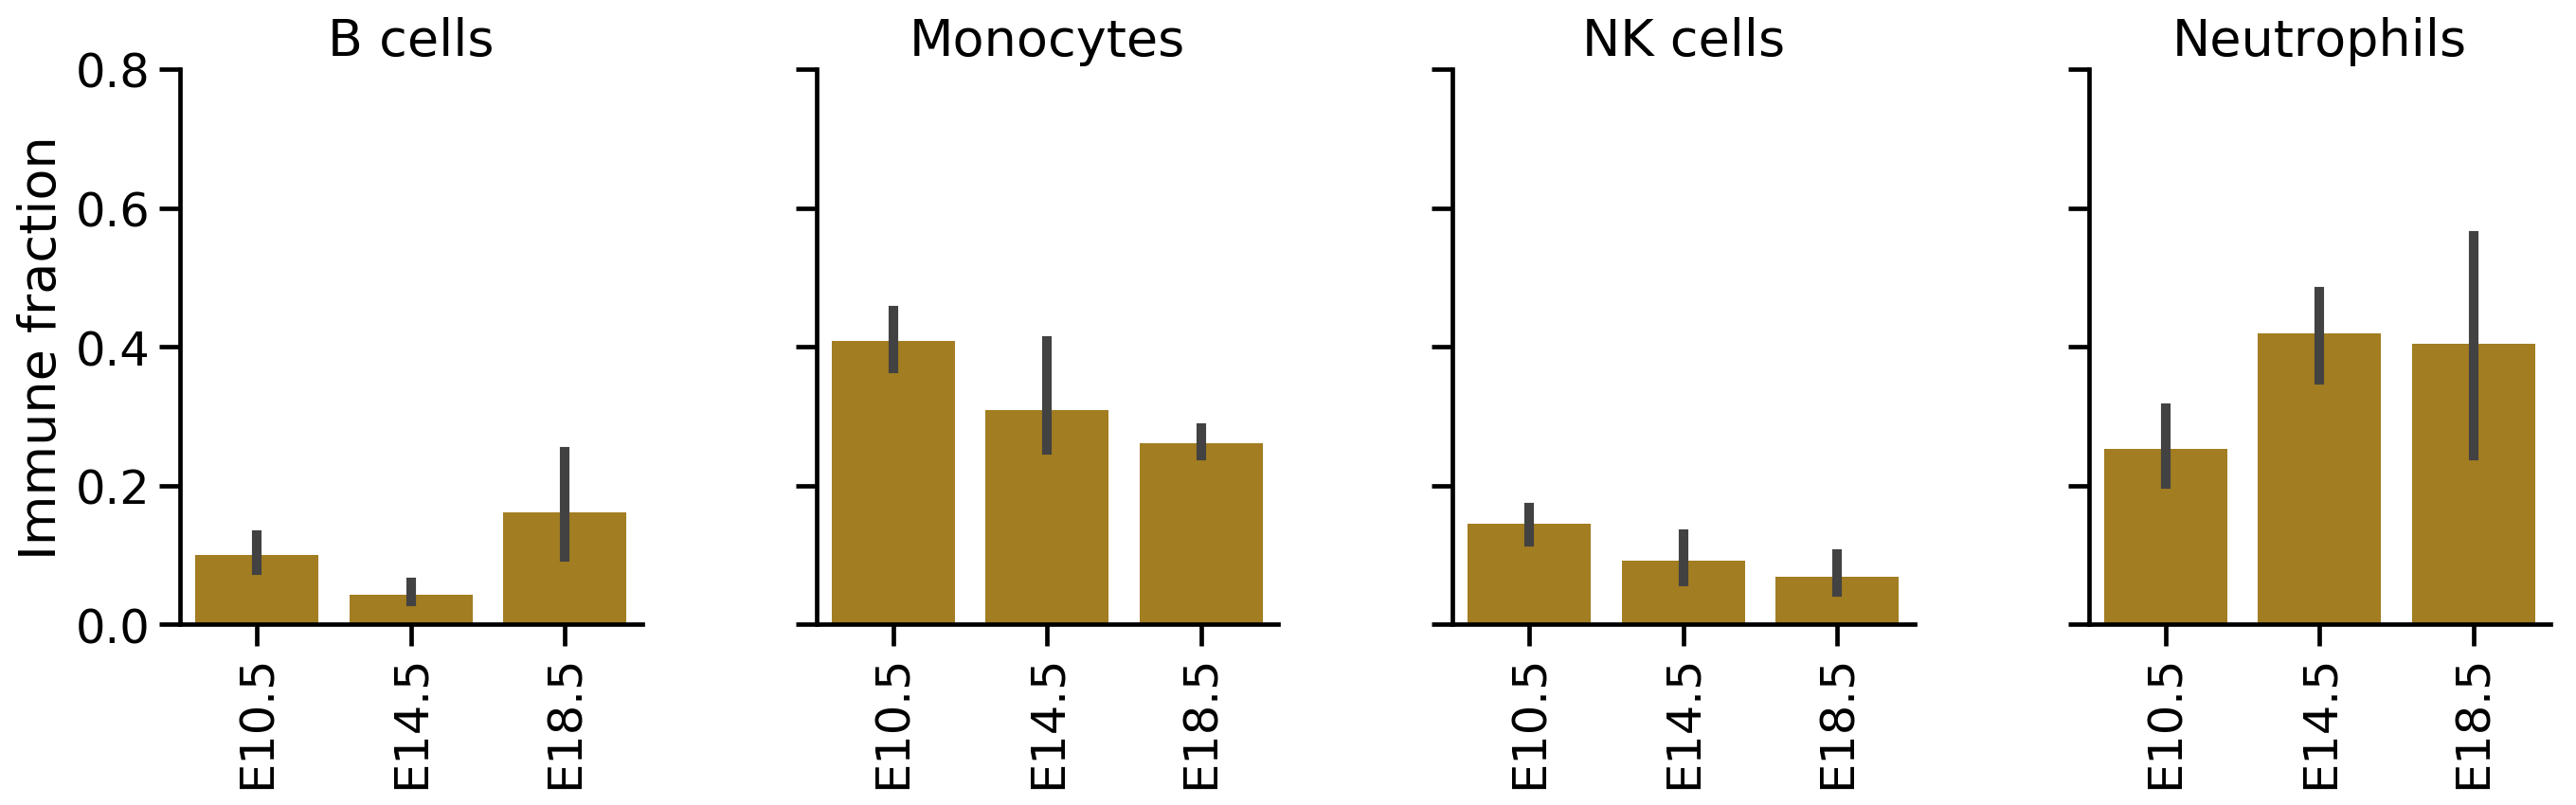

In [14]:
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)
g = sns.catplot(x='day', y='frac_of_immune',
                col = 'cell_type_v2', data= TIS[TIS['cell_type_v2'].isin(['Monocytes', 'Neutrophils', 'B cells', 'NK cells'])], color ='darkgoldenrod', kind='bar',
                sharey = True,
                aspect=0.8)

(g.set_axis_labels('', 'Immune fraction')
  .set_titles('{col_name}'))  
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];
plt.ylim(0, 0.8)

(0, 0.15)

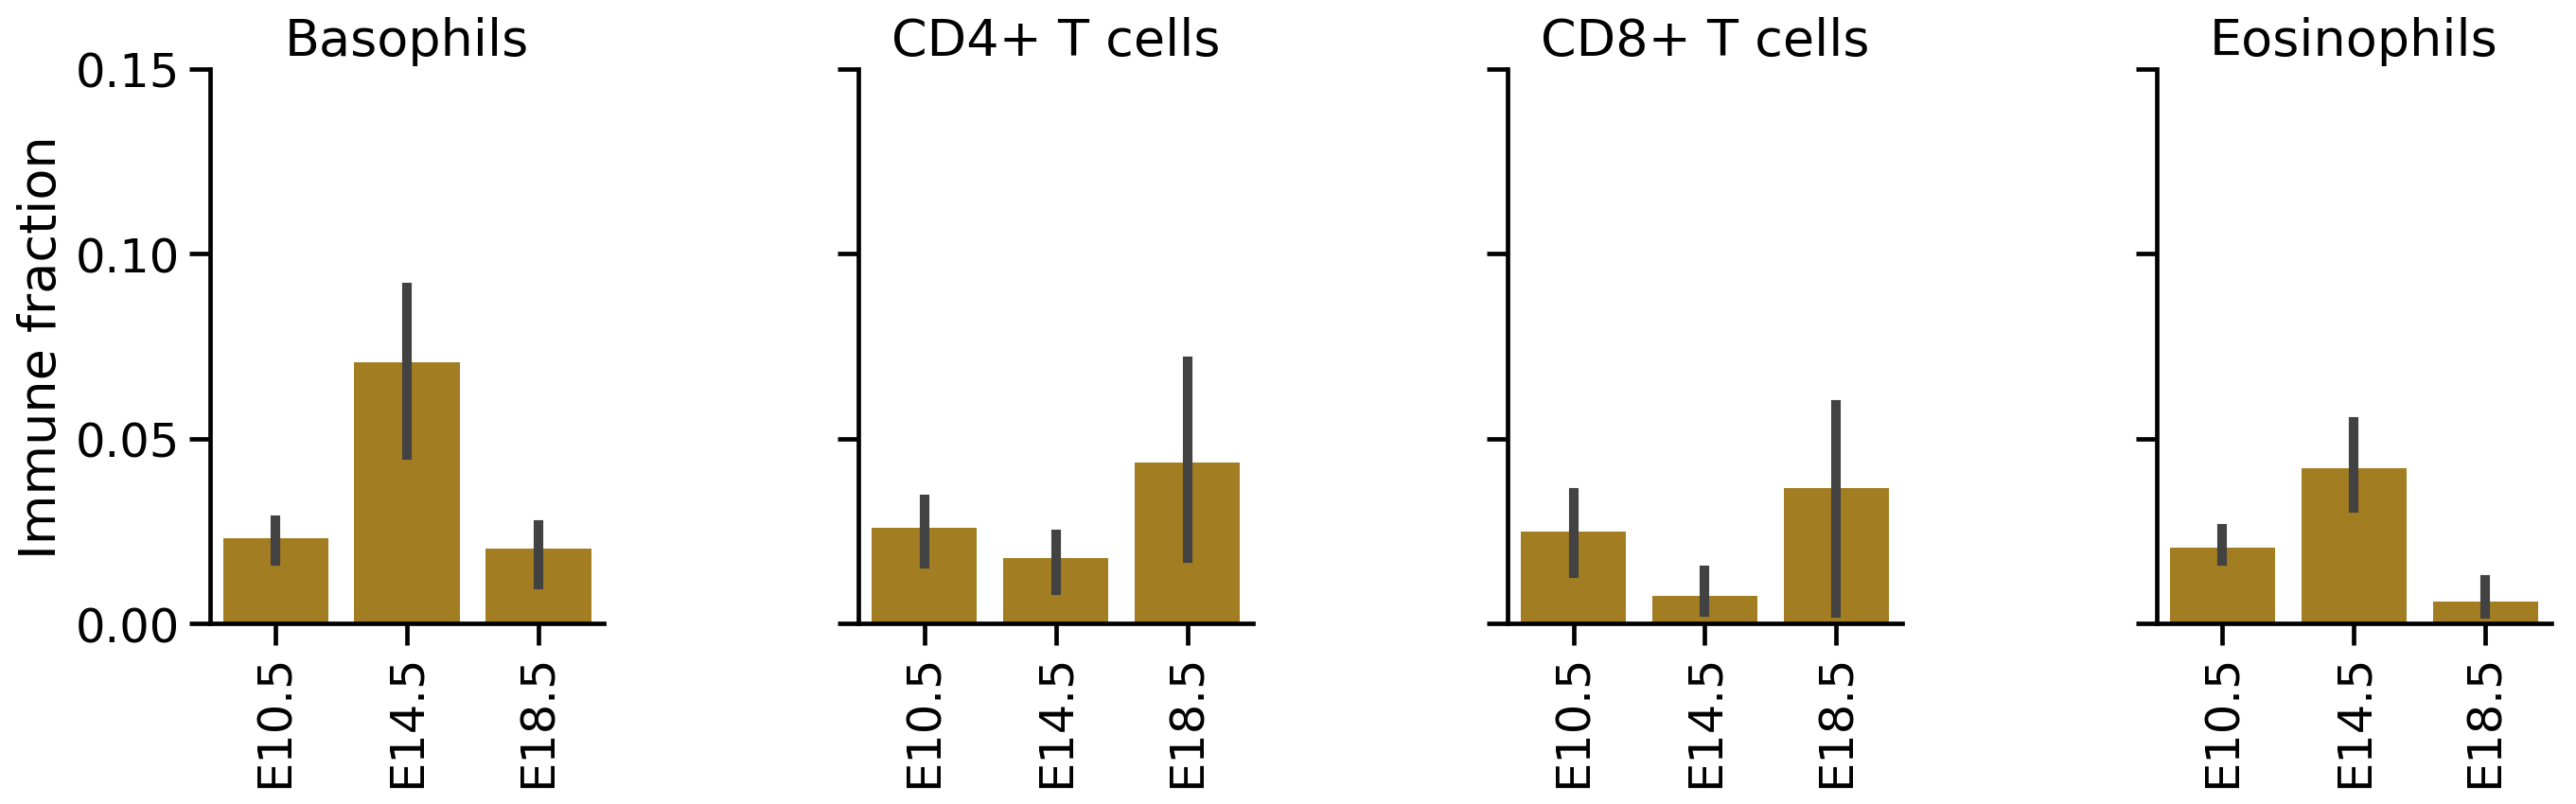

In [28]:
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)
g = sns.catplot(x='day', y='frac_of_immune',
                col = 'cell_type_v2', data= TIS[TIS['cell_type_v2'].isin(['Basophils',
                                                                          'CD4+ T cells',
                                                                          'CD8+ T cells',
                                                                          'Eosinophils'])], 
                color ='darkgoldenrod', kind='bar',
                sharey = True,
                aspect=0.8)

(g.set_axis_labels('', 'Immune fraction')
  .set_titles('{col_name}'))  
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];
plt.ylim(0, 0.15)

(0, 0.8)

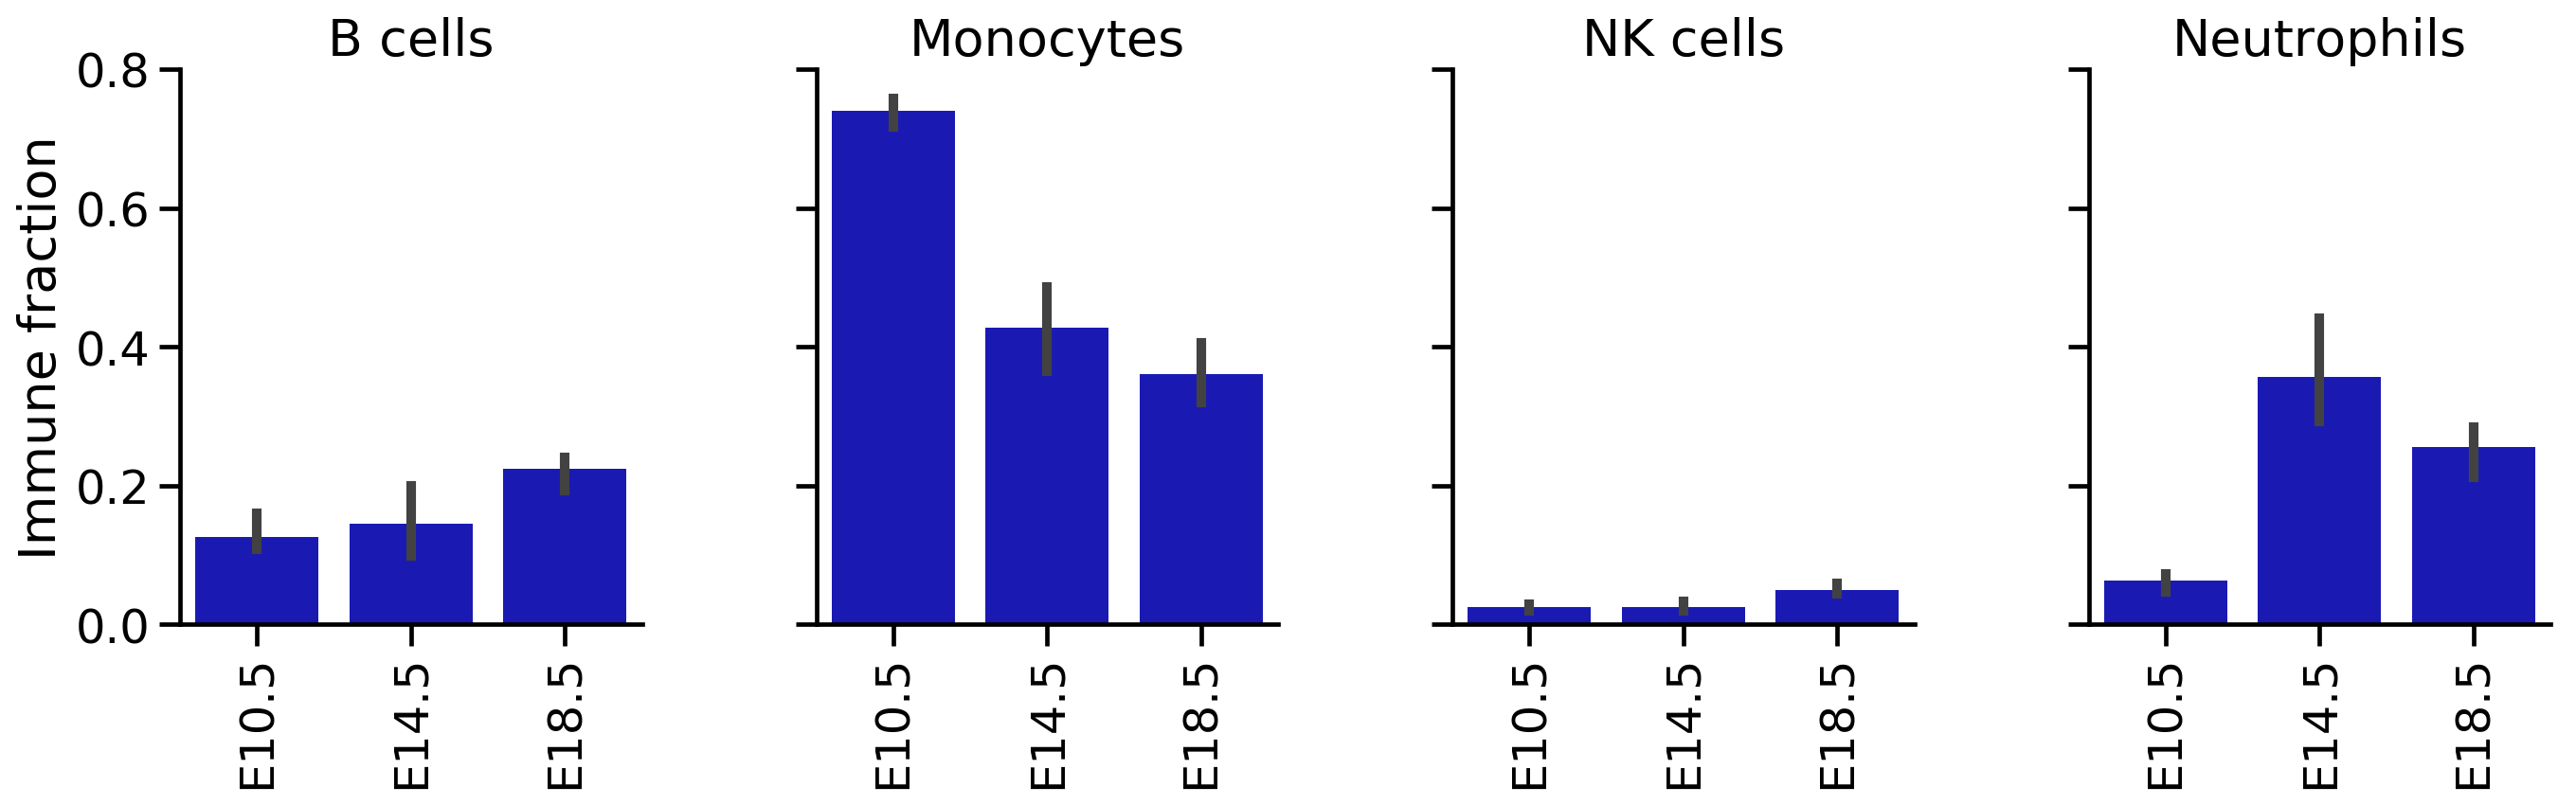

In [18]:
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)
g = sns.catplot(x='day', y='frac_of_immune',
                col = 'cell_type_v2', data= EV[EV['cell_type_v2'].isin(['B cells','Monocytes', 'Neutrophils', 'NK cells'])], color = 'mediumblue', kind='bar',
                sharey = True,
                aspect=0.8)

(g.set_axis_labels('', 'Immune fraction')
  .set_titles('{col_name}'))  
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];
plt.ylim(0, 0.8)

(0, 0.15)

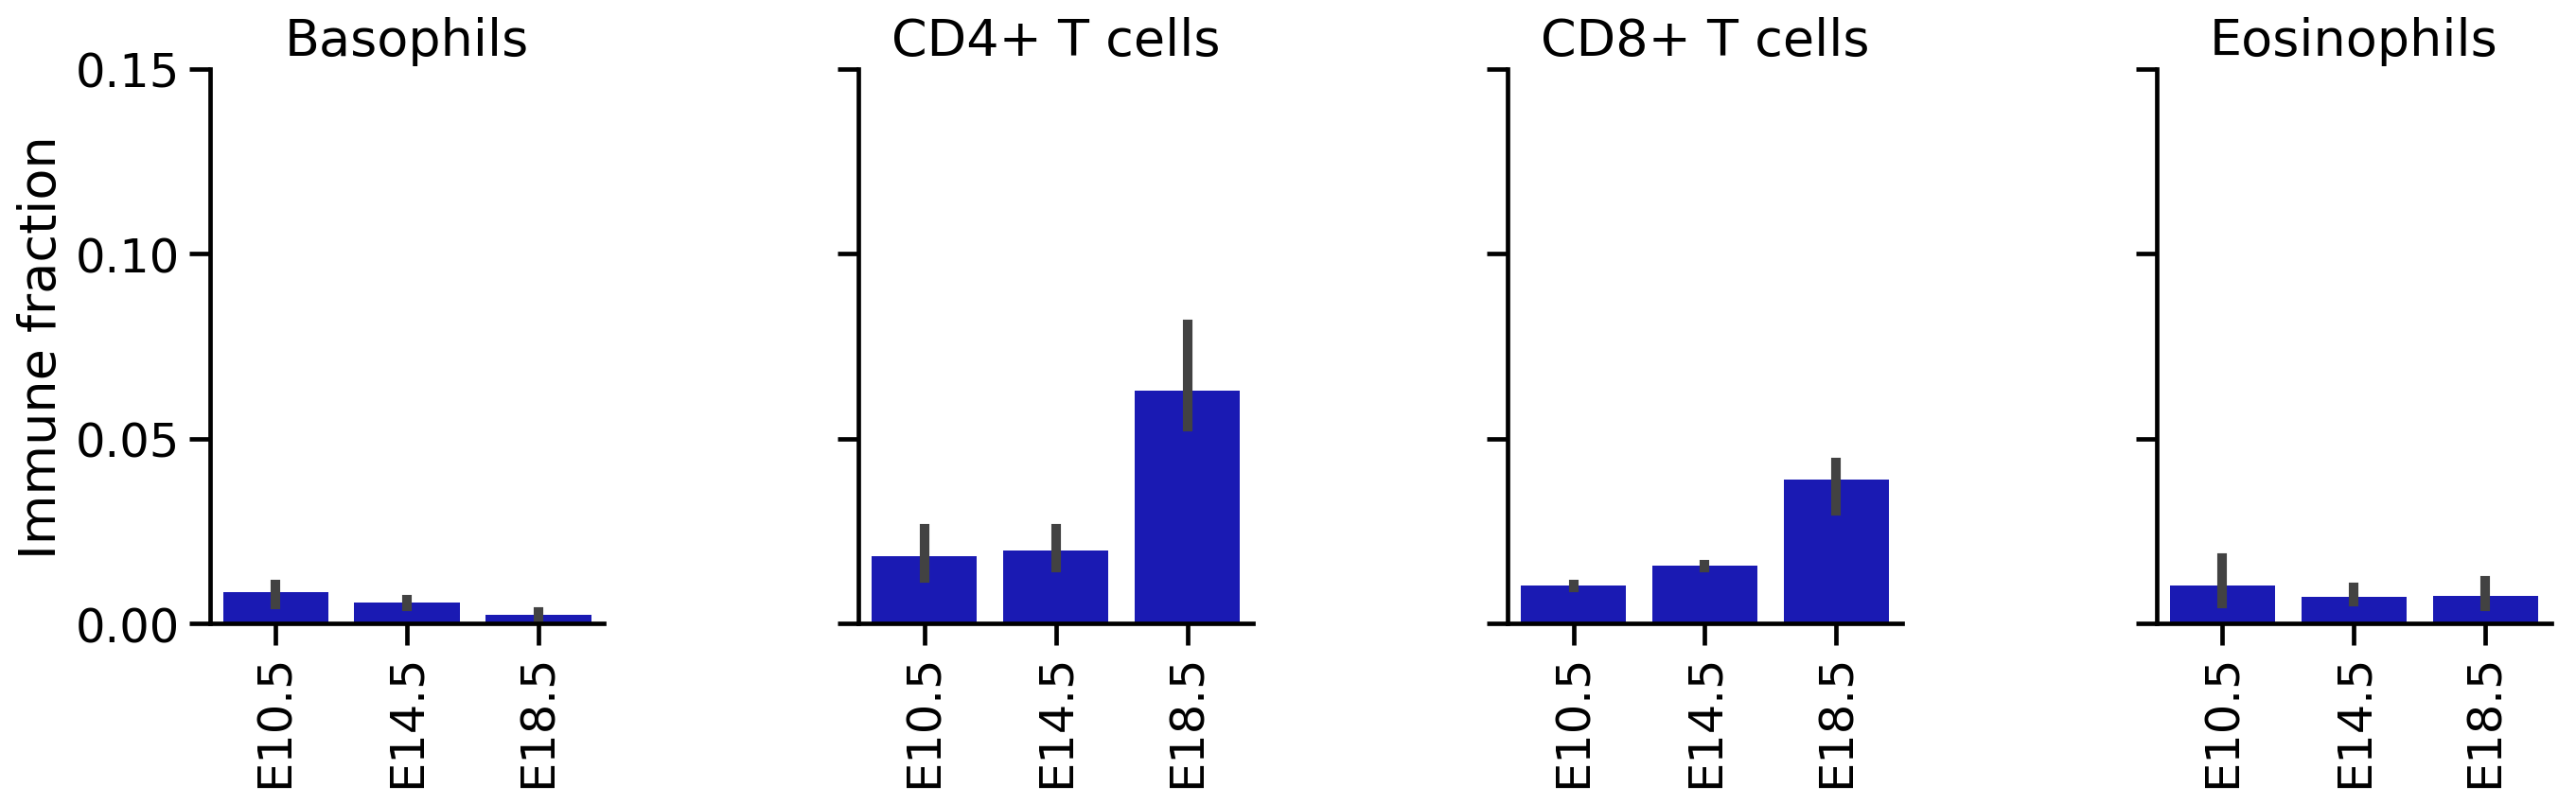

In [29]:
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)
g = sns.catplot(x='day', y='frac_of_immune',
                col = 'cell_type_v2', data= EV[EV['cell_type_v2'].isin(['Basophils',
                                                                        'CD4+ T cells',
                                                                        'CD8+ T cells',
                                                                        'Eosinophils'])], 
                color = 'mediumblue', kind='bar',
                sharey = True,
                aspect=0.8)

(g.set_axis_labels('', 'Immune fraction')
  .set_titles('{col_name}'))  
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];
plt.ylim(0, 0.15)

(0, 0.8)

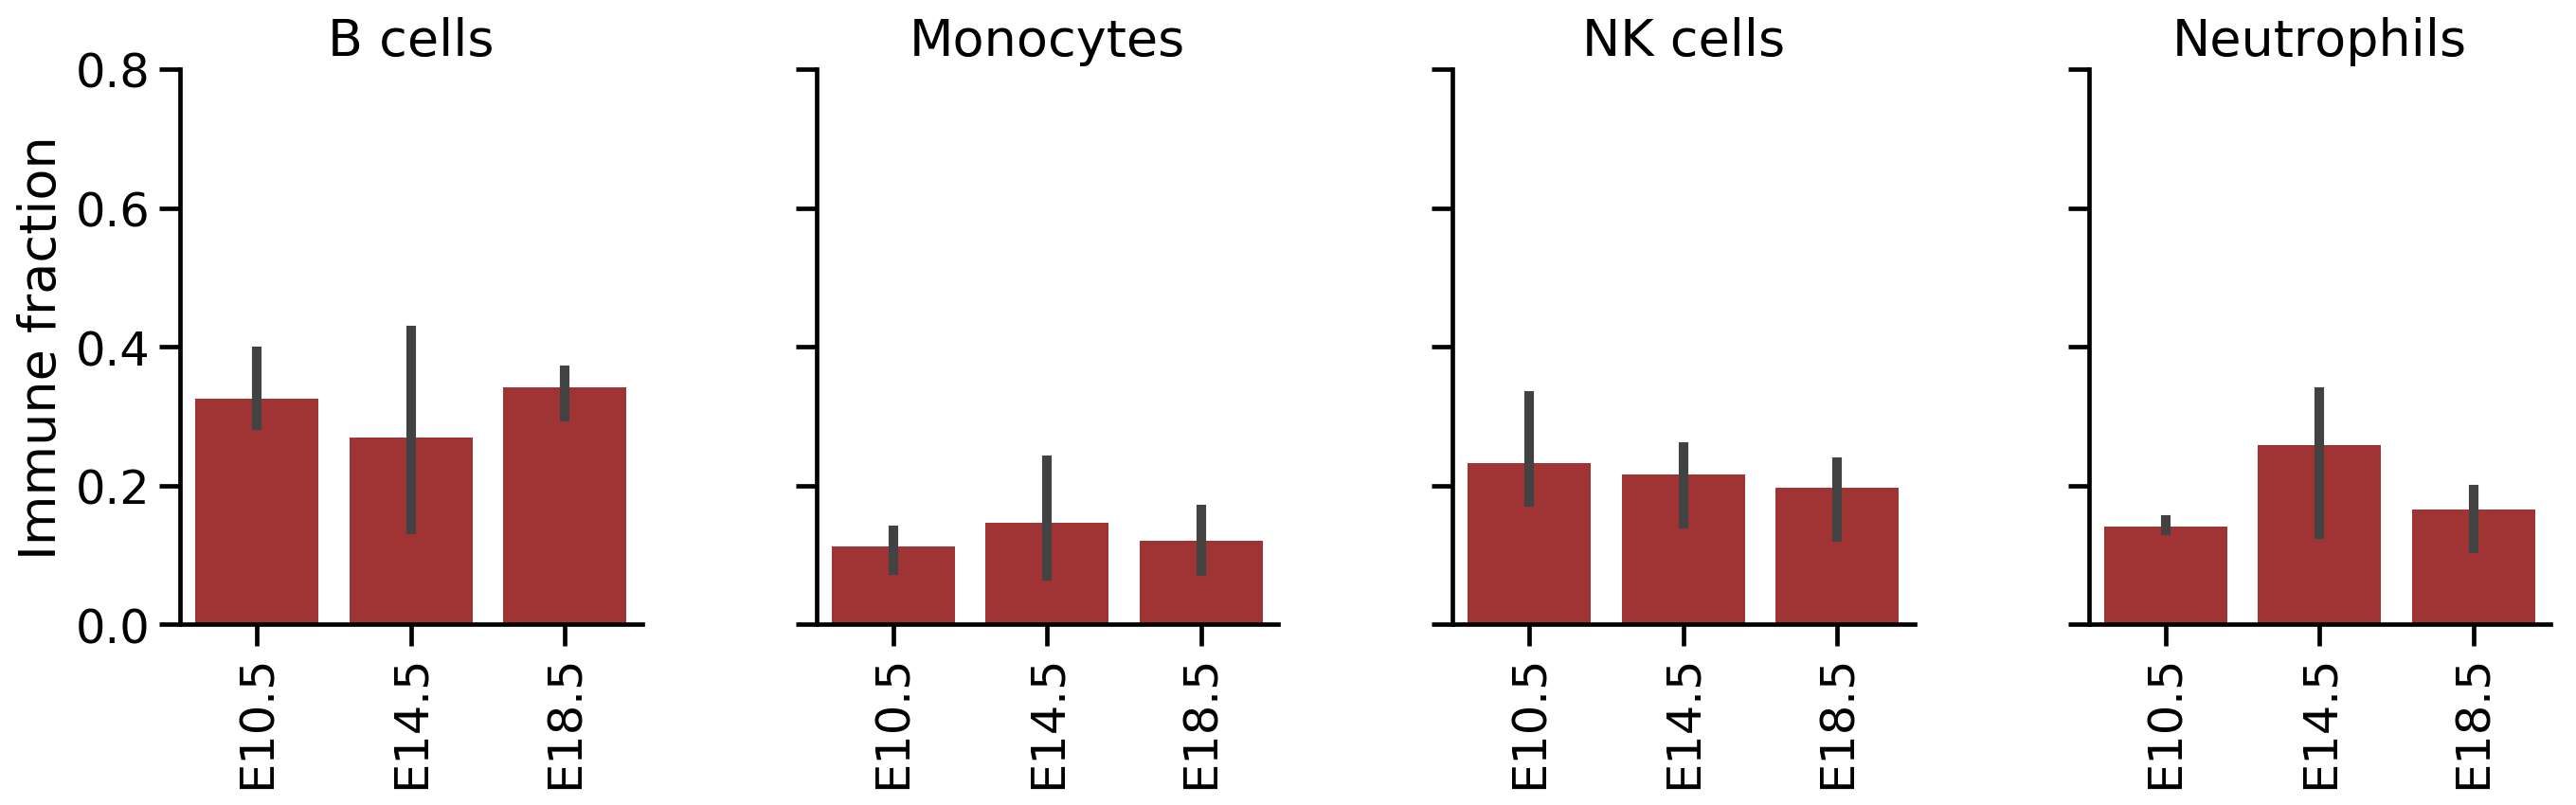

In [26]:
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)
g = sns.catplot(x='day', y='frac_of_immune',
                col = 'cell_type_v2', data= PB[PB['cell_type_v2'].isin(['B cells', 'Neutrophils', 'Monocytes','NK cells'])], 
                color = 'firebrick', kind='bar',
                sharey = True,
                aspect=0.8)

(g.set_axis_labels('', 'Immune fraction')
  .set_titles('{col_name}'))  
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];
plt.ylim(0, 0.8)

(0, 0.15)

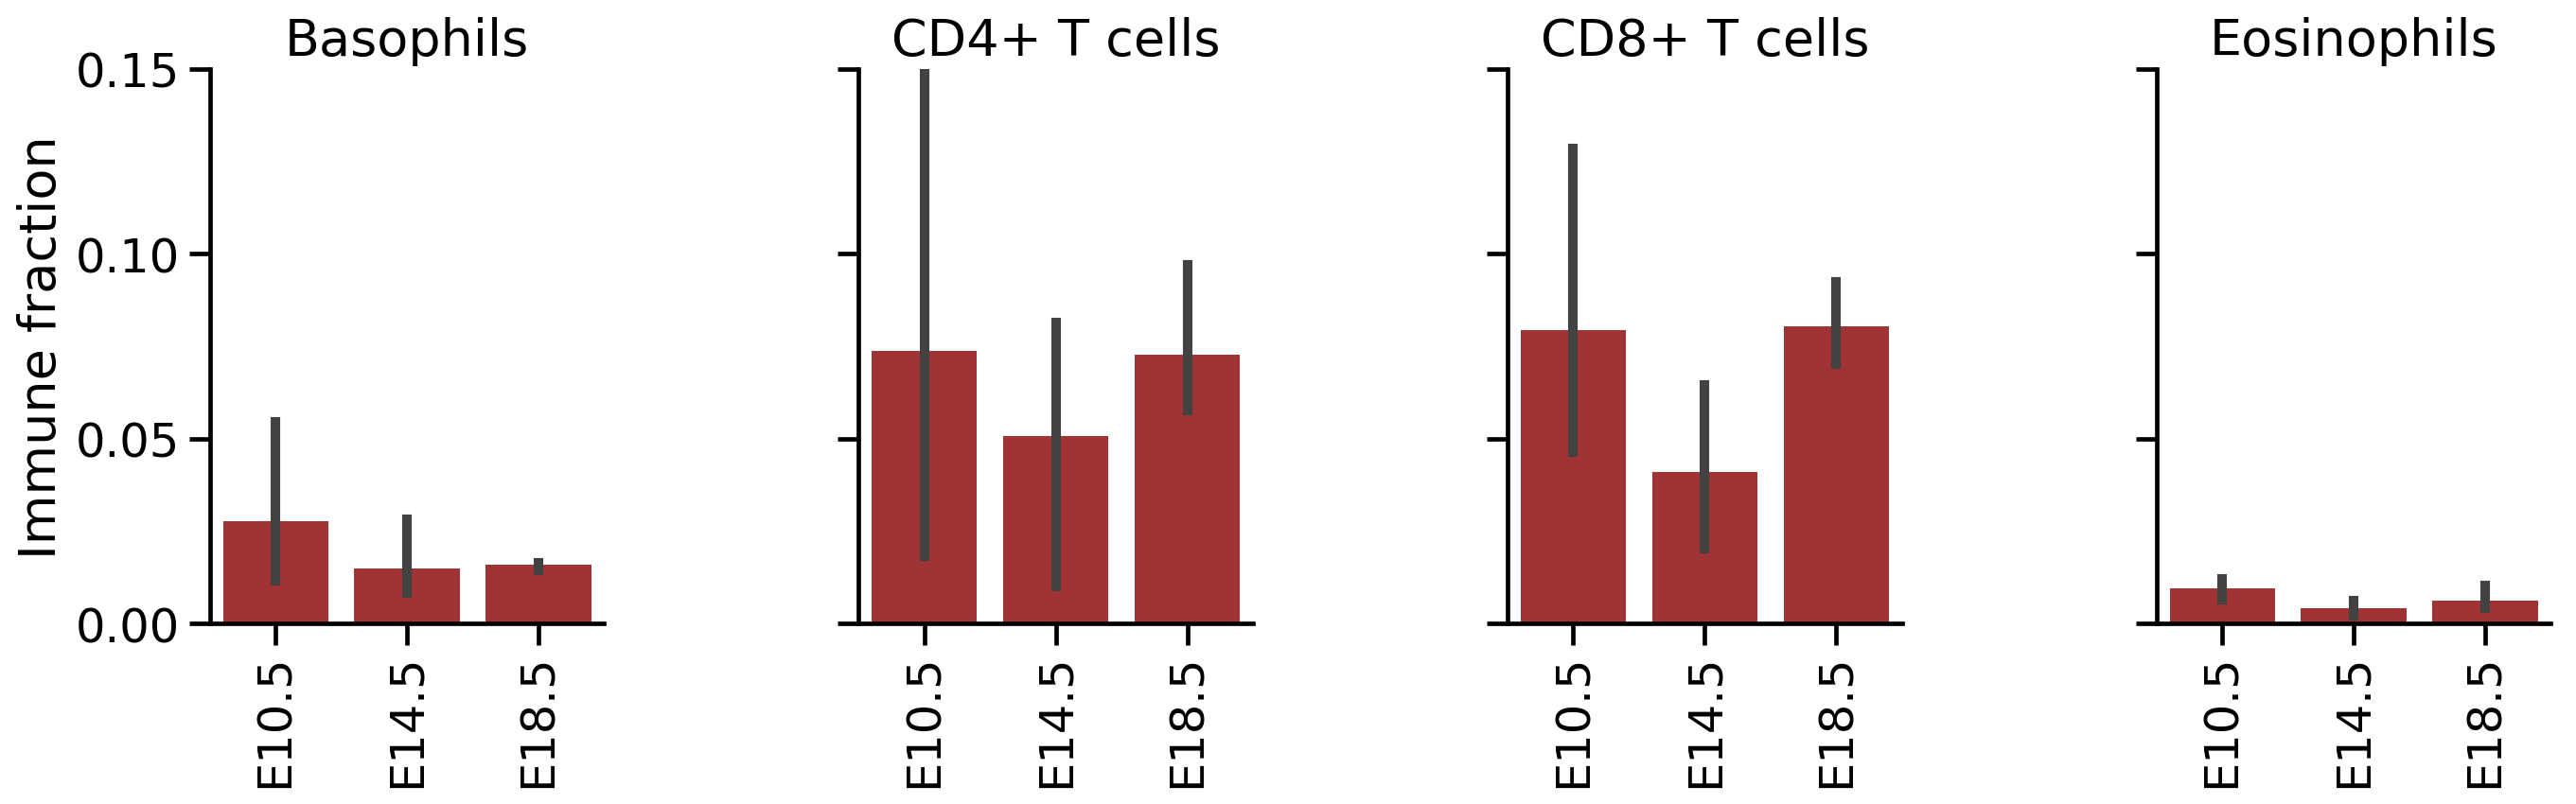

In [27]:
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)
g = sns.catplot(x='day', y='frac_of_immune',
                col = 'cell_type_v2', data= PB[PB['cell_type_v2'].isin(['Basophils',
                                                                        'CD4+ T cells',
                                                                        'CD8+ T cells',
                                                                        'Eosinophils'])], color = 'firebrick', kind='bar',
                sharey = True,
                aspect=0.8)

(g.set_axis_labels('', 'Immune fraction')
  .set_titles('{col_name}'))  
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];
plt.ylim(0, 0.15)

# Figure 2D

In [32]:
cell_list = cell_counts['cell_type_v2'].unique().tolist()
compartments = cell_counts['compartment2'].unique().tolist()
cell_counts_piv = cell_counts.groupby(['cell_type_v2', 'compartment2', 'day']).mean()
cell_counts_piv.reset_index(inplace = True)
cell_frac = cell_counts_piv[['cell_type_v2', 'compartment2', 'day', 'frac_of_immune']]

In [65]:
leiden_color_dictv2 = {'B cells': '#FFFF00',
 'CD4+ T cells': '#FF34FF',
 'CD8+ T cells': '#FF4A46',
 'Eosinophils': '#A30059',
 'Basophils': '#b98cdb',
 'Monocytes': '#552de3',
 'NK cells': '#8FB0FF',
 'Neutrophils': '#8393a3',                   
 'DCs': '#1CE6FF'}

comp_dict = {'PB-EV':'firebrick','PL-EV': 'mediumblue', 'PL-T': 'darkgoldenrod'}

In [11]:
TIS_frac = cell_frac[(cell_frac['compartment2']== 'PL-T')]
EV_frac = cell_frac[(cell_frac['compartment2']== 'PL-EV')]
PB_frac = cell_frac[(cell_frac['compartment2']== 'PB-EV')]

In [12]:
TIS_f_piv = TIS_frac.pivot_table(index = 'cell_type_v2', columns = 'day', values = 'frac_of_immune')
EV_f_piv = EV_frac.pivot_table(index = 'cell_type_v2', columns = 'day', values = 'frac_of_immune')
PB_f_piv = PB_frac.pivot_table(index = 'cell_type_v2', columns = 'day', values = 'frac_of_immune')

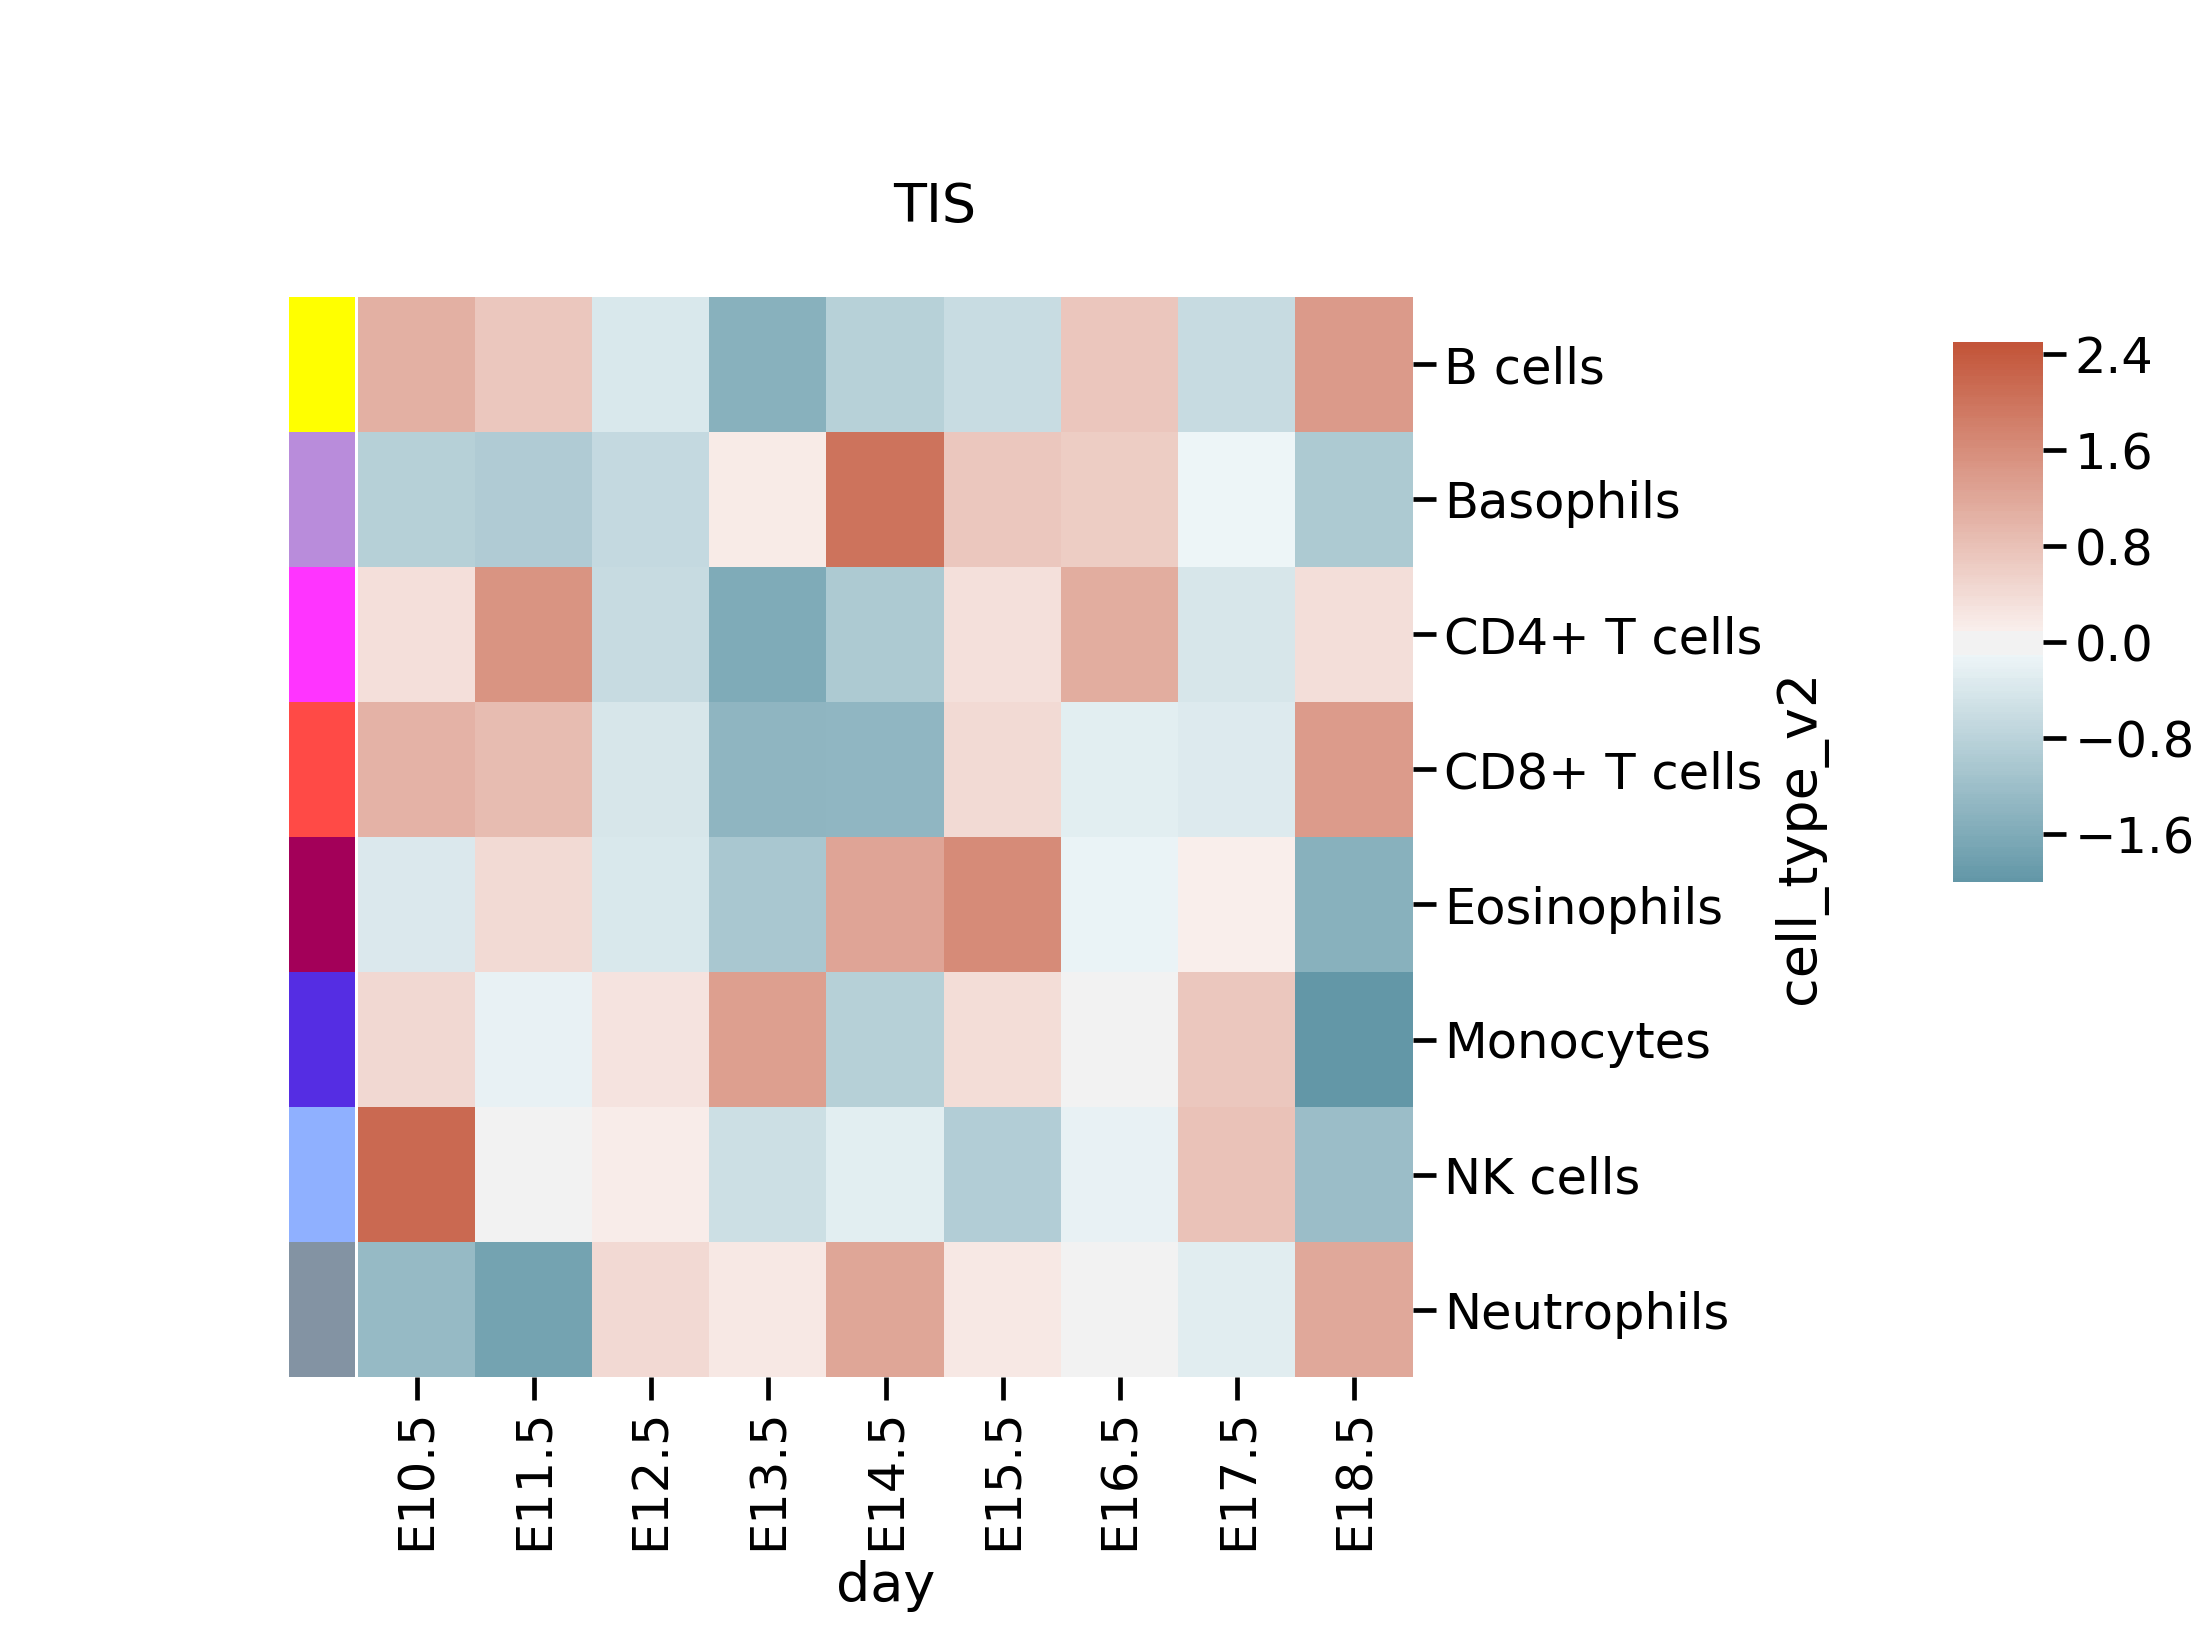

In [58]:
row_colors = TIS_f_piv.index.map(leiden_color_dictv2)
cg = sns.clustermap(TIS_f_piv, figsize=(10, 10),
               cmap = sns.diverging_palette(220, 20, n=200), row_colors = row_colors, 
               row_cluster = False, col_cluster = False, 
               z_score = 0, center = 0,
                  vmin=-2, vmax=2.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.text(-55, 3.5, 'TIS');
cg.cax.set_position((1.2,0.4,.05,.3))

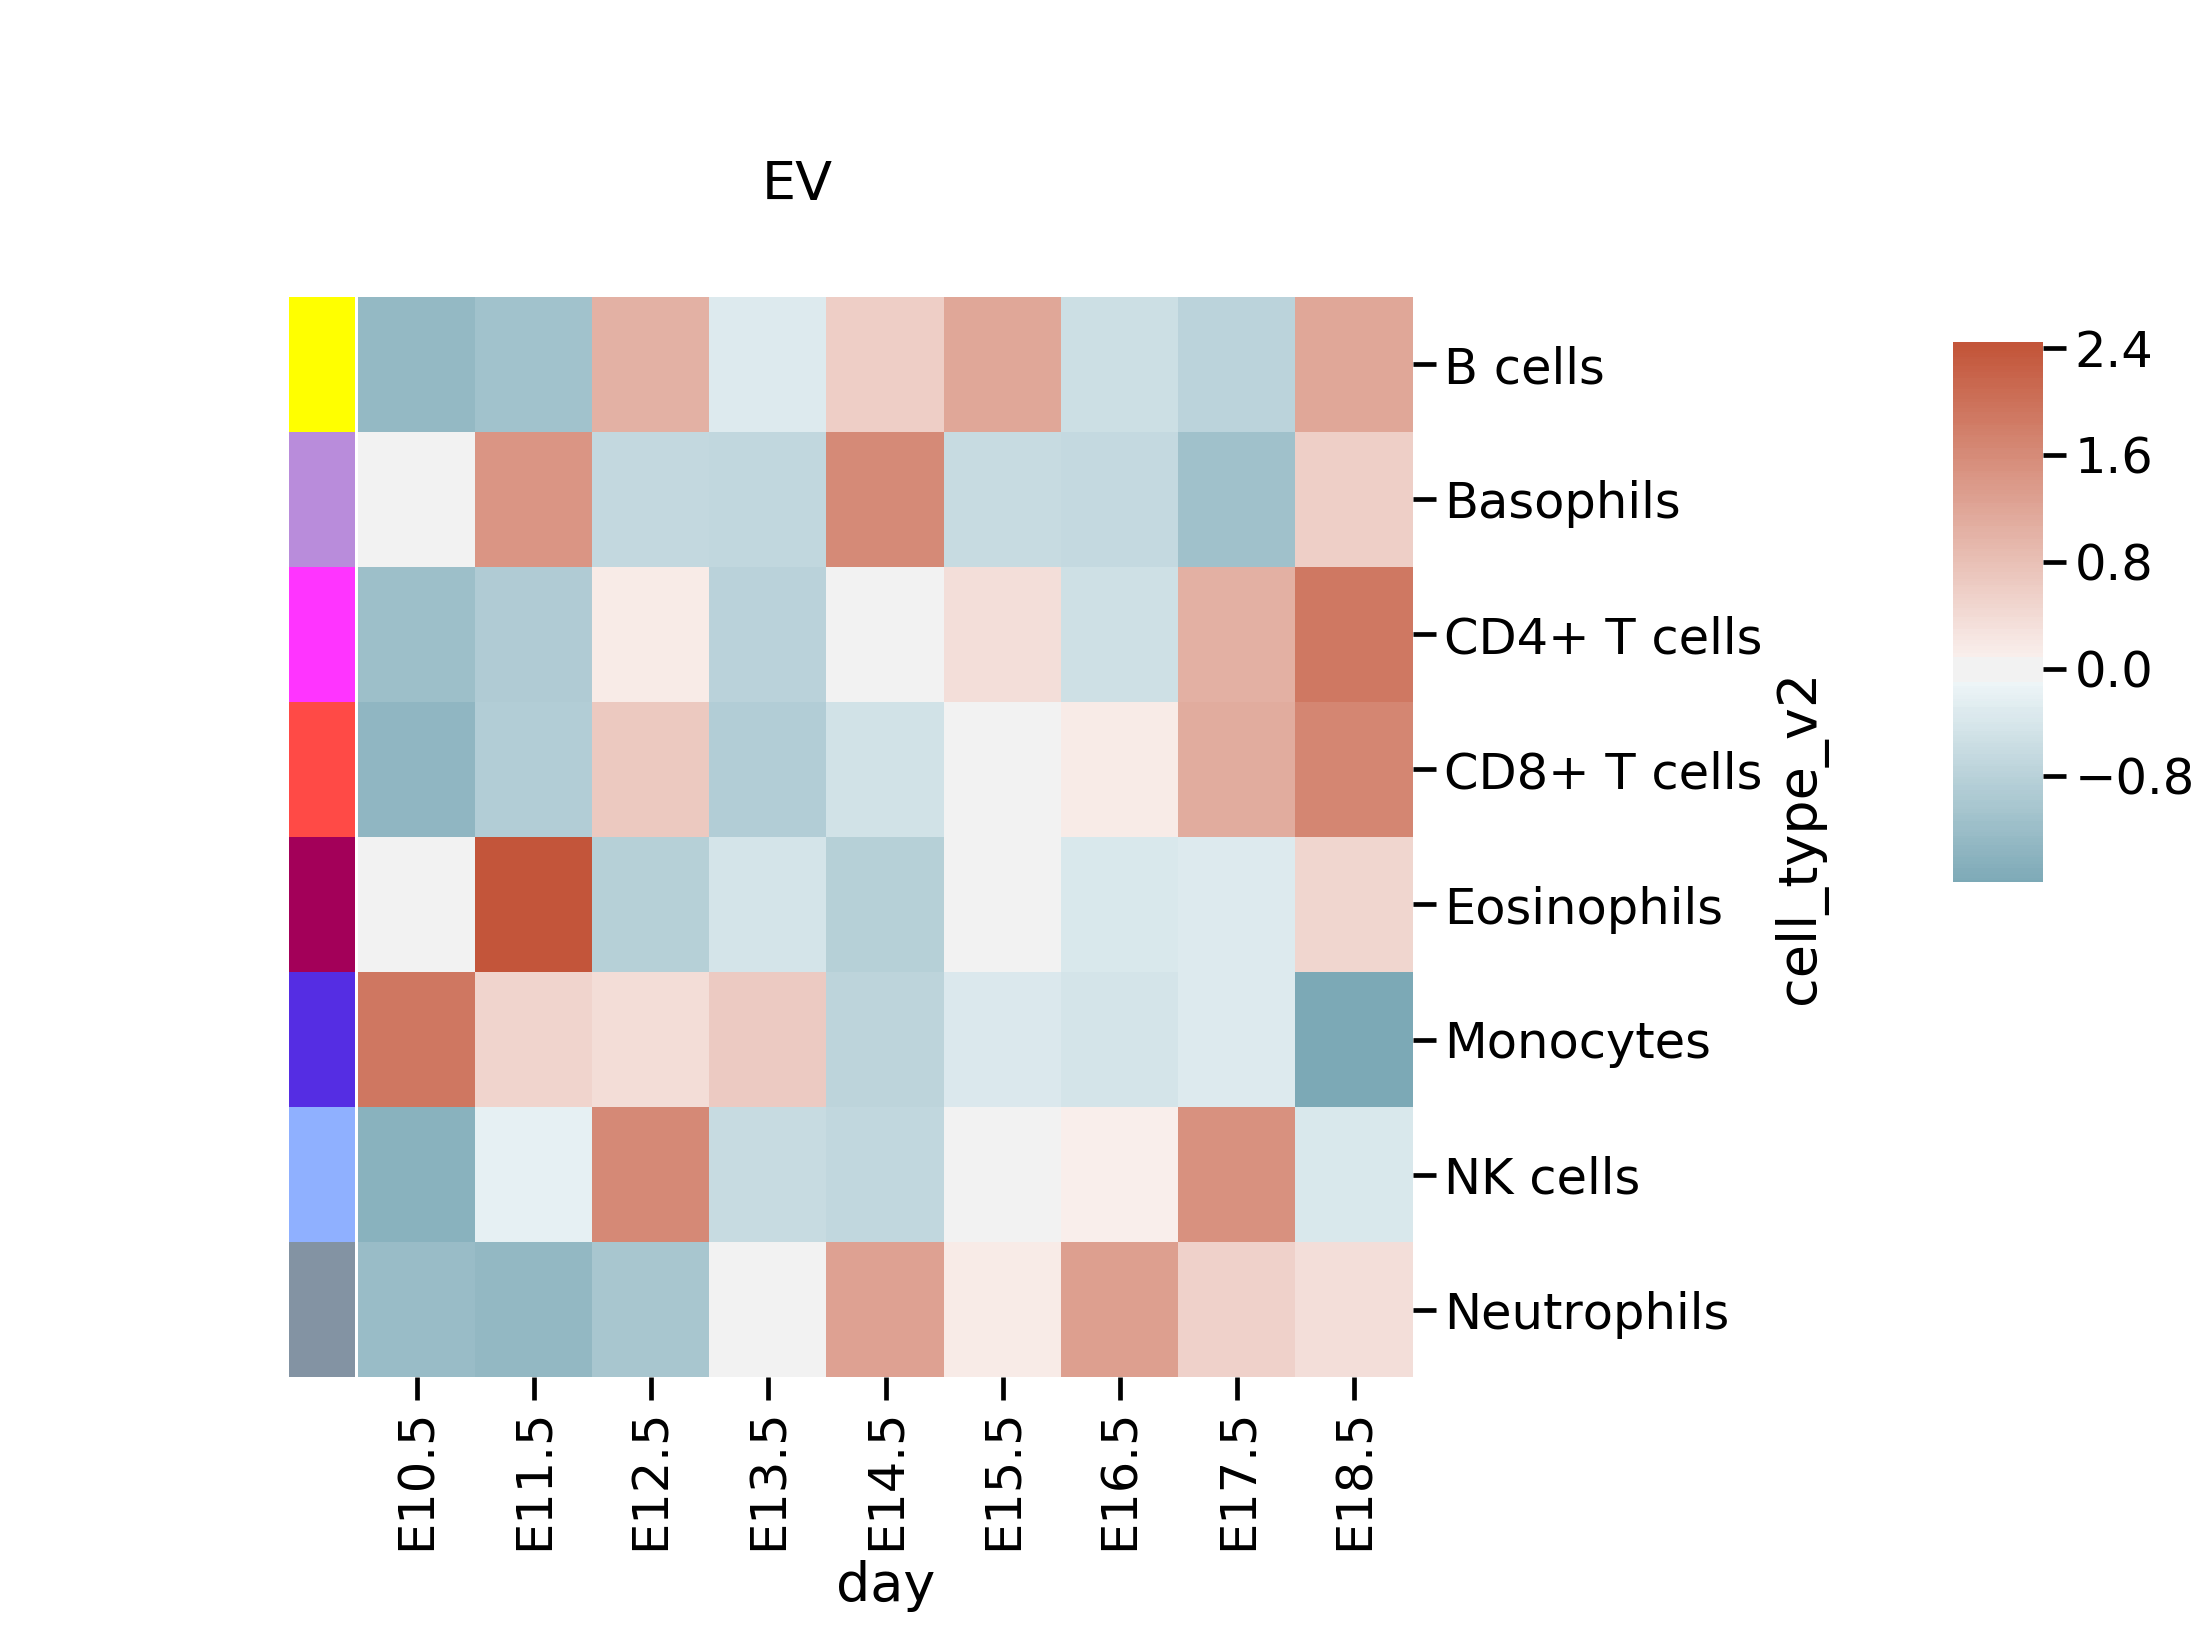

In [49]:
cg = sns.clustermap(EV_f_piv, figsize=(10, 10),
               cmap = sns.diverging_palette(220, 20, n=200), row_colors = row_colors, 
               row_cluster = False, col_cluster = False, 
               z_score = 0, center = 0,
                  vmin=-2, vmax=2.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.text(-55, 3.5, 'EV');
cg.cax.set_position((1.2,0.4,.05,.3))

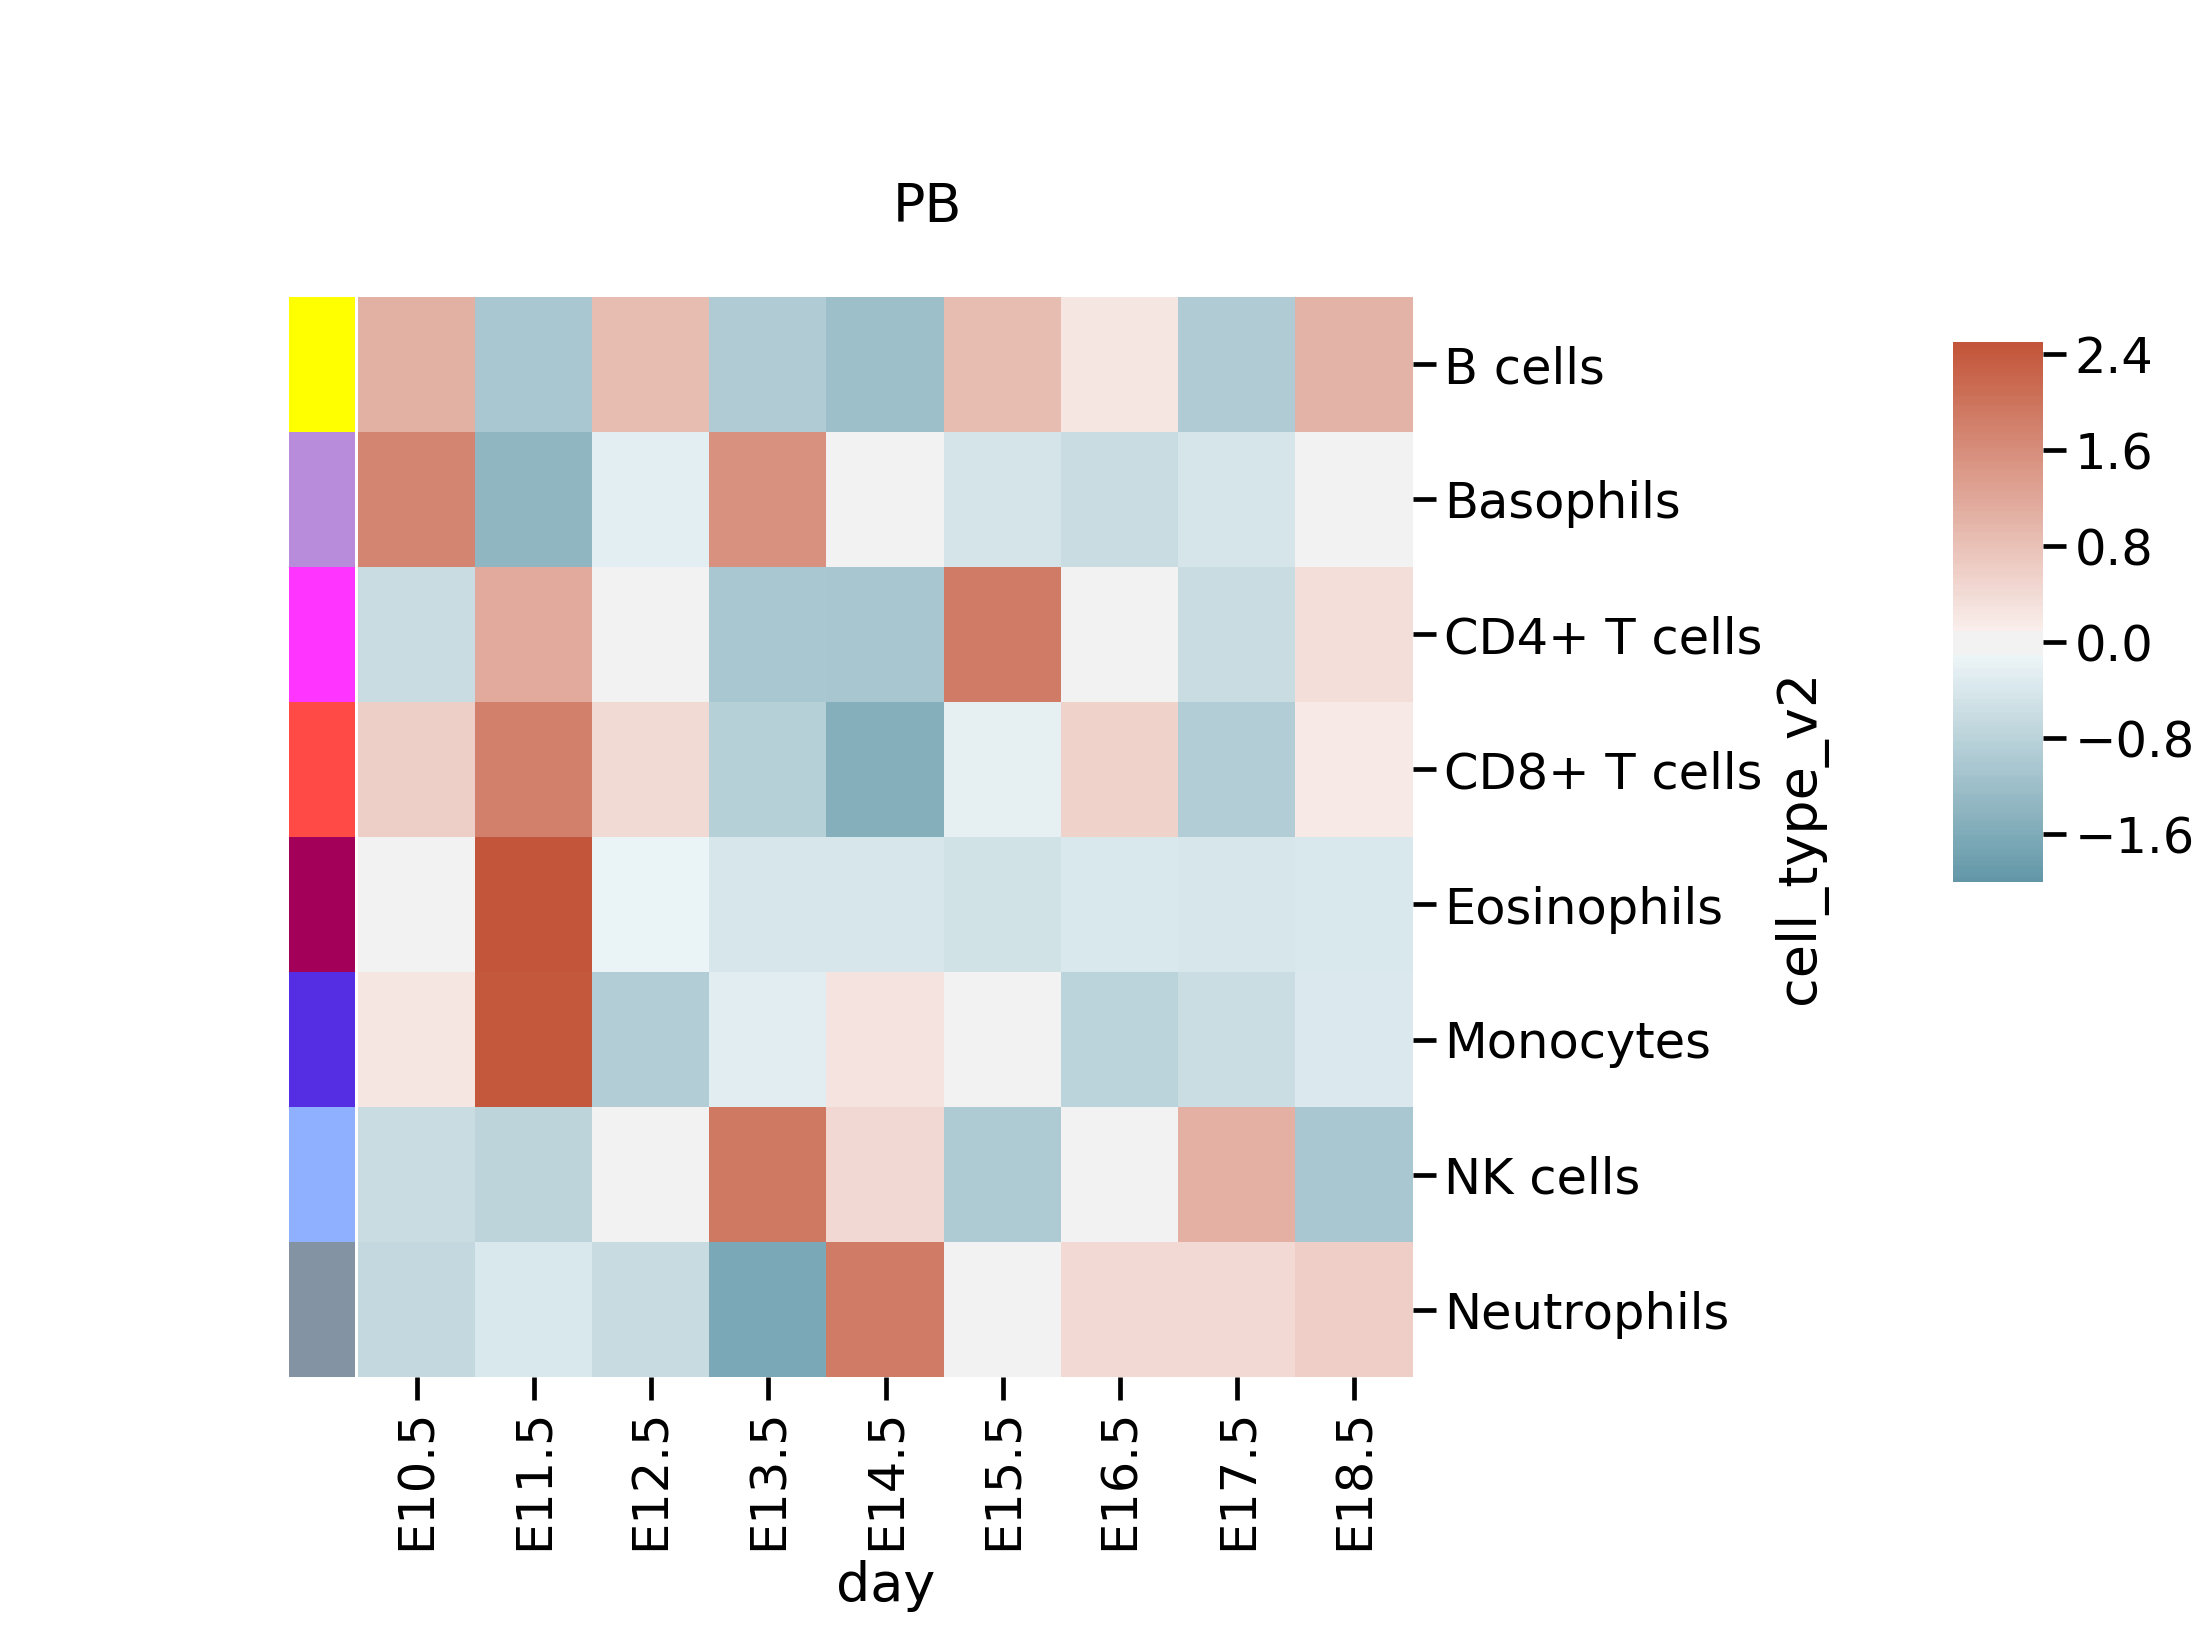

In [59]:
row_colors = PB_f_piv.index.map(leiden_color_dictv2)
cg = sns.clustermap(PB_f_piv, figsize=(10, 10),
               cmap = sns.diverging_palette(220, 20, n=200), row_colors = row_colors, 
               row_cluster = False, col_cluster = False, 
               z_score = 0, center = 0,
               vmin=-2, vmax=2.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.text(-55, 3.5, 'PB');
cg.cax.set_position((1.2,0.4,.05,.3))

In [60]:
Neu = cell_frac[cell_frac['cell_type_v2']== 'Neutrophils']
Mo = cell_frac[cell_frac['cell_type_v2']== 'Monocytes']
Neu_piv = Neu.pivot_table(index = 'compartment2', columns = 'day', values = 'frac_of_immune')
Mo_piv = Mo.pivot_table(index = 'compartment2', columns = 'day', values = 'frac_of_immune')
Neu_piv.sort_index(ascending = False, inplace = True)
Mo_piv.sort_index(ascending = False, inplace = True)

In [63]:
Neu_piv

day              E10.5     E11.5     E12.5     E13.5     E14.5     E15.5  \
compartment2                                                               
PL-T          0.252539  0.253572  0.342555  0.365537  0.419352  0.363085   
PL-EV         0.063258  0.066887  0.107529  0.172413  0.356732  0.193279   
PB-EV         0.140657  0.122528  0.107749  0.082177  0.258516  0.134240   

day              E16.5     E17.5     E18.5  
compartment2                                
PL-T          0.336942  0.325916  0.404016  
PL-EV         0.281788  0.227846  0.255318  
PB-EV         0.148484  0.148450  0.165620

In [66]:
comp_dict

{'PB-EV': 'firebrick', 'PL-EV': 'mediumblue', 'PL-T': 'darkgoldenrod'}

In [61]:
days = ['E10.5', 'E11.5', 'E12.5', 'E13.5', 'E14.5', 'E15.5', 'E16.5', 'E17.5',
       'E18.5']

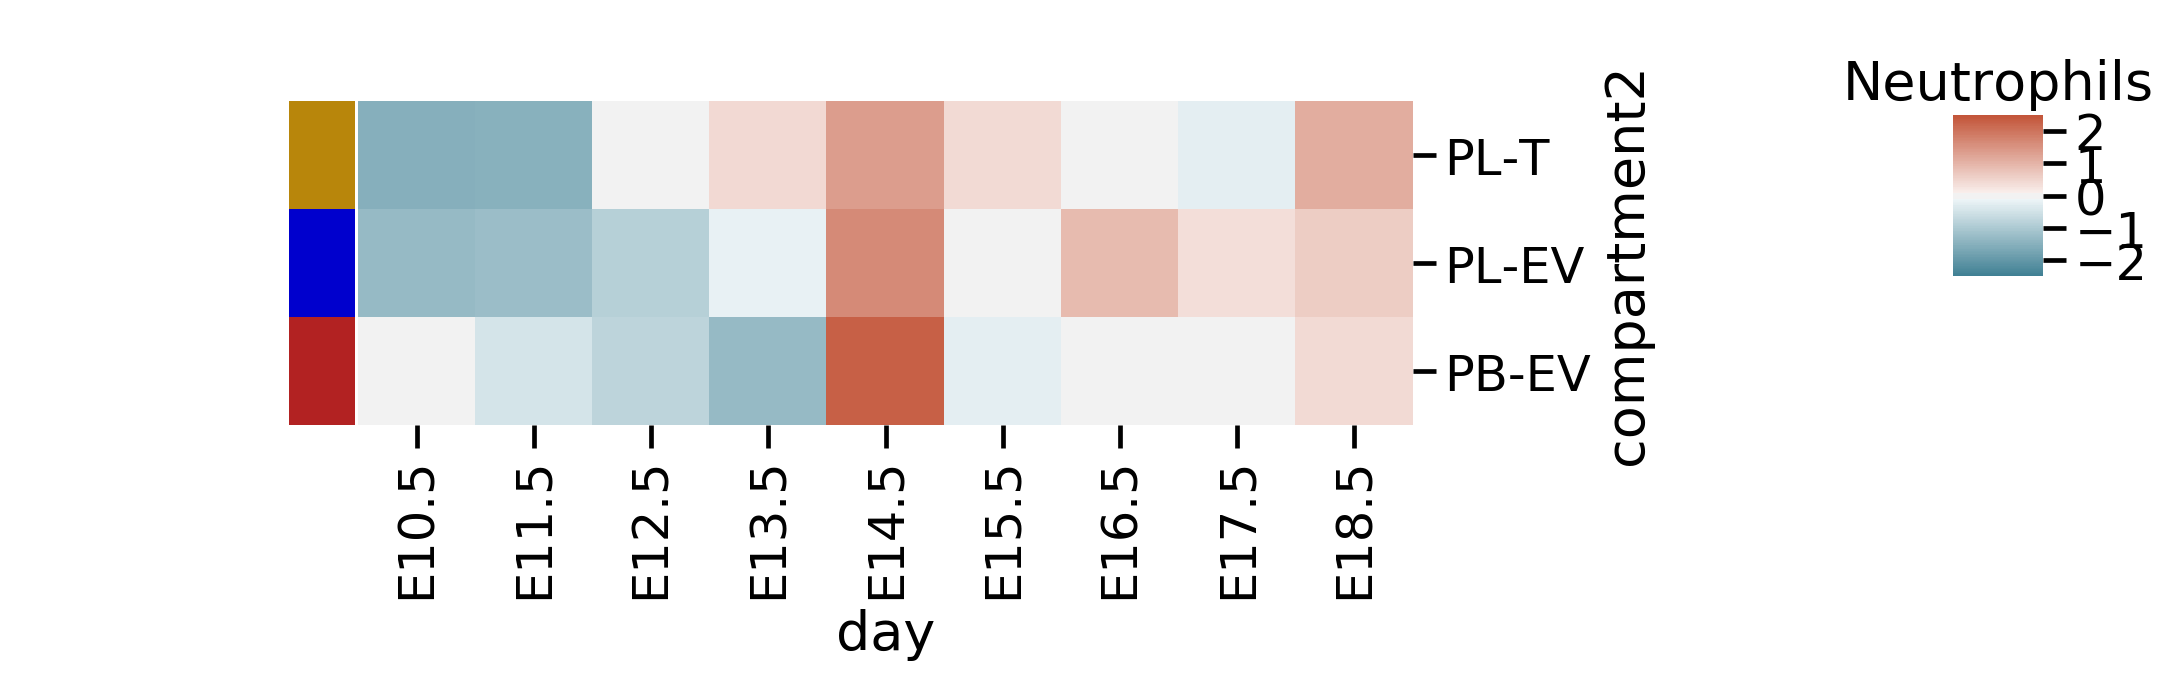

In [67]:
row_colors = Neu_piv.index.map(comp_dict)
plt.rcParams['figure.dpi'] = 180
cg = sns.clustermap(Neu_piv, figsize=(10, 3),
               cmap = sns.diverging_palette(220, 20, n=200), row_colors = row_colors, 
               row_cluster = False, col_cluster = False, 
               z_score = 0, center = 0,
                   vmin=-2.5, vmax=2.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('Neutrophils');
cg.cax.set_position((1.2,0.4,.05,.3))

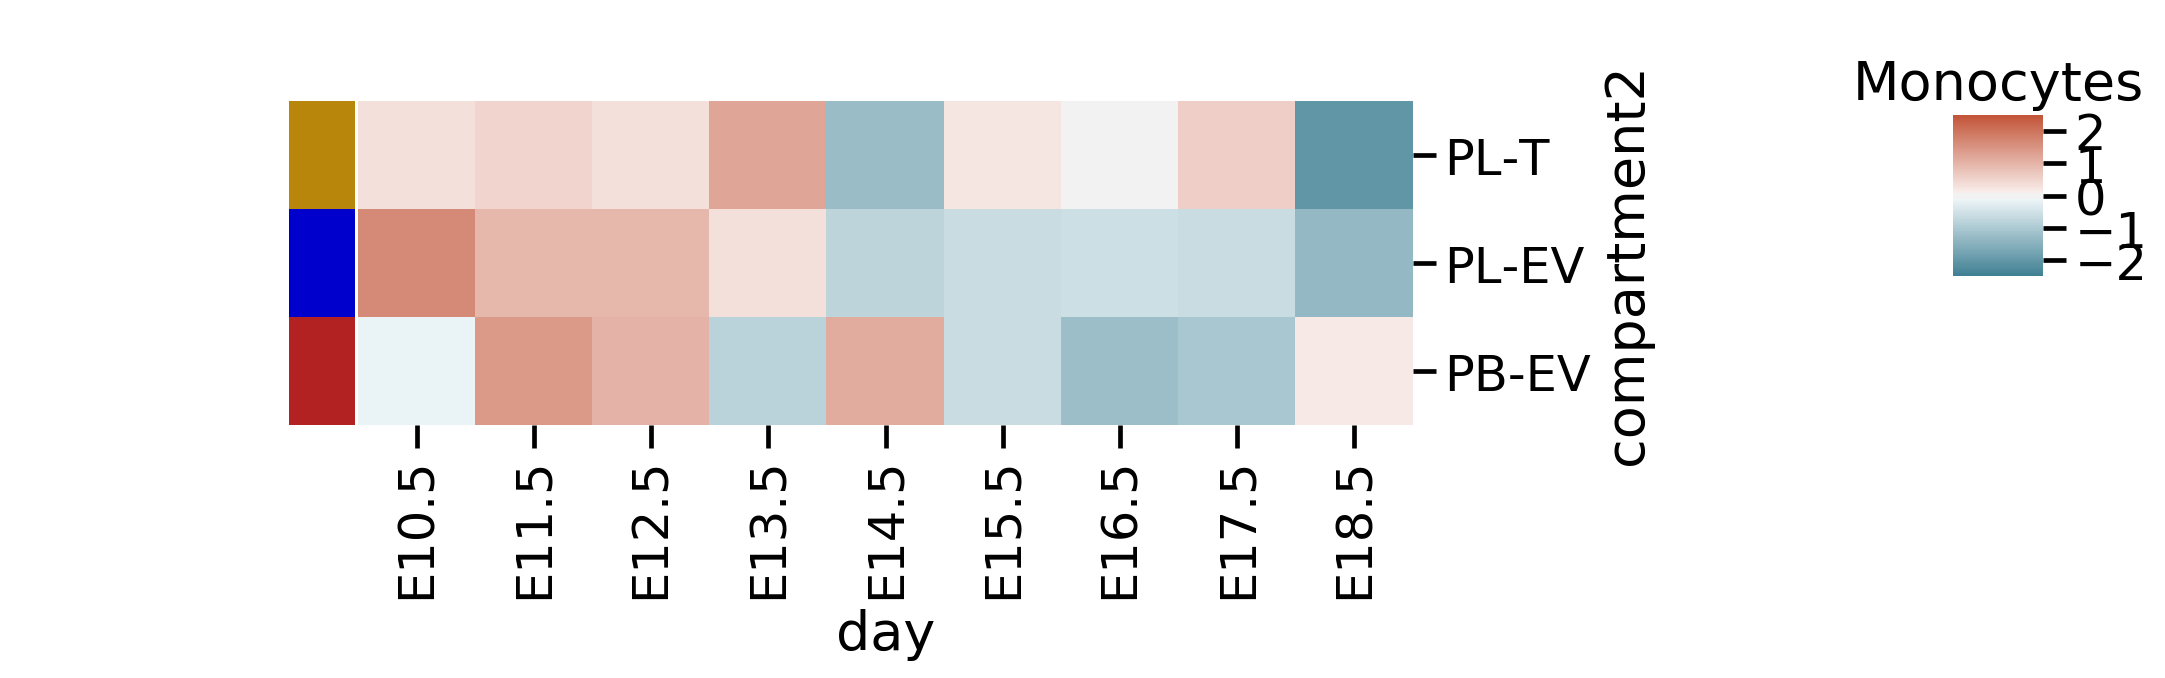

In [68]:
row_colors = Mo_piv.index.map(comp_dict)
plt.rcParams['figure.dpi'] = 180
cg = sns.clustermap(Mo_piv, figsize=(10, 3),
               cmap = sns.diverging_palette(220, 20, n=200), row_colors = row_colors, 
               row_cluster = False, col_cluster = False, 
               z_score = 0, center = 0,
                   vmin=-2.5, vmax=2.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('Monocytes');
cg.cax.set_position((1.2,0.4,.05,.3))

# Supplementary Table

In [8]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
ttest_path = os.path.join(subsample_path, '20200831_t_test_cells_all_comp_all_days.csv')
t_test_data = pd.read_csv(ttest_path)

In [9]:
t_test_data.head(5)

day1   day2 compartment2  cell_type_v2  log2_day2divday1  t-stat  p-value  \
0  E10.5  E10.5        PB-EV       B cells               0.0     0.0      1.0   
1  E10.5  E10.5        PB-EV     Basophils               0.0     0.0      1.0   
2  E10.5  E10.5        PB-EV  CD4+ T cells               0.0     0.0      1.0   
3  E10.5  E10.5        PB-EV  CD8+ T cells               0.0     0.0      1.0   
4  E10.5  E10.5        PB-EV   Eosinophils               0.0     0.0      1.0   

  Stat diff    day2/day1  
0        no  E10.5/E10.5  
1        no  E10.5/E10.5  
2        no  E10.5/E10.5  
3        no  E10.5/E10.5  
4        no  E10.5/E10.5

In [11]:
t_test_data[(t_test_data['cell_type_v2']=='Neutrophils') & (t_test_data['day2/day1']=='E14.5/E13.5')]

day1   day2 compartment2 cell_type_v2  log2_day2divday1    t-stat  \
607  E13.5  E14.5        PB-EV  Neutrophils          1.237530 -1.543465   
615  E13.5  E14.5        PL-EV  Neutrophils          0.748669 -2.435140   
623  E13.5  E14.5         PL-T  Neutrophils          0.265955 -2.463967   

      p-value Stat diff    day2/day1  
607  0.173664        no  E14.5/E13.5  
615  0.030040       yes  E14.5/E13.5  
623  0.028456       yes  E14.5/E13.5

In [7]:
t_test_data.to_csv(ttest_path, index = False)

# Figure 2E

In [38]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
cell_counts.head(5)

cell_type_v2 compartment2    day challenge timePI  cage  id  counts  \
0      B cells        PB-EV  E10.5       sal    2hr  6942   8     194   
1      B cells        PB-EV  E10.5       sal    2hr  6944  16     142   
2      B cells        PB-EV  E10.5       sal    2hr  9582  15     135   
3      B cells        PB-EV  E11.5       sal    2hr   429  19     114   
4      B cells        PB-EV  E11.5       sal    2hr  6942  10     158   

                        sample  sample_total  frac_of_immune  
0   6942_8_E10.5_sal_2hr_PB-EV           494        0.392713  
1  6944_16_E10.5_sal_2hr_PB-EV           496        0.286290  
2  9582_15_E10.5_sal_2hr_PB-EV           459        0.294118  
3   429_19_E11.5_sal_2hr_PB-EV           482        0.236515  
4  6942_10_E11.5_sal_2hr_PB-EV           462        0.341991

In [70]:
cell_counts.head(5)

cell_type_v2 compartment2    day challenge timePI  cage  id  counts  \
0      B cells        PB-EV  E10.5       sal    2hr  6942   8     194   
1      B cells        PB-EV  E10.5       sal    2hr  6944  16     142   
2      B cells        PB-EV  E10.5       sal    2hr  9582  15     135   
3      B cells        PB-EV  E11.5       sal    2hr   429  19     114   
4      B cells        PB-EV  E11.5       sal    2hr  6942  10     158   

                        sample  sample_total  frac_of_immune  
0   6942_8_E10.5_sal_2hr_PB-EV           494        0.392713  
1  6944_16_E10.5_sal_2hr_PB-EV           496        0.286290  
2  9582_15_E10.5_sal_2hr_PB-EV           459        0.294118  
3   429_19_E11.5_sal_2hr_PB-EV           482        0.236515  
4  6942_10_E11.5_sal_2hr_PB-EV           462        0.341991

In [78]:
cell_list = cell_counts['cell_type_v2'].unique().tolist()

In [79]:
cell_piv = cell_counts.pivot_table(index = ['compartment2', 'day', 'challenge', 'timePI','cage', 'id', 'sample'], columns = 'cell_type_v2', values = 'frac_of_immune')
cell_piv.reset_index(inplace = True)
cell_piv.loc[:,cell_list] = cell_piv.loc[:,cell_list].fillna(0)

In [86]:
days_dict = {'E10.5': 10.5,
 'E11.5': 11.5,
 'E12.5': 12.5,
 'E13.5': 13.5,
 'E14.5': 14.5,
 'E15.5': 15.5,
 'E16.5': 16.5,
 'E17.5': 17.5,
 'E18.5': 18.5}
cell_piv.loc[:, 'float_day'] = cell_piv.loc[:, 'day'].map(days_dict)

In [80]:
cell_piv['Basophils'].isnull().values.any()

False

In [87]:
PB_gen = cell_piv[cell_piv['compartment2'] == 'PB-EV']
EV_gen = cell_piv[cell_piv['compartment2'] == 'PL-EV']
TIS_gen = cell_piv[cell_piv['compartment2'] == 'PL-T']
PB_gen.reset_index(inplace = True)
EV_gen.reset_index(inplace = True)
TIS_gen.reset_index(inplace = True)
features = ['Monocytes','Neutrophils']
target = ['float_day']

# adaptive immune system
features = ['CD4+ T cells','CD8+ T cells', 'B cells']
target = ['float_day']

In [88]:
from scipy.stats import ttest_ind

In [89]:
comp_dict = {'TIS': TIS_gen, 'EV': EV_gen, 'PB': PB_gen}

In [90]:
mse_df = pd.DataFrame(columns = ['compartment', 'training_n_mse', 'test_n_mse'])
r2_df = pd.DataFrame(columns = ['compartment', 'training_r2', 'test_r2'])
for comp in comp_dict.keys():
    compartment_df = comp_dict[comp]
    compartment_df.loc[:, features] = compartment_df.loc[:, features].apply(lambda x:(x-x.mean()) / (x.max()-x.min()))
    X = compartment_df.loc[:, features].values
    Y = compartment_df.loc[:, target].values
    clf = LinearRegression()
    scores = cross_validate(clf, X, Y, cv= 10,
                         scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
    error_df = pd.DataFrame({'compartment':comp, 'training_n_mse': scores['train_neg_mean_squared_error'], 'test_n_mse': scores['test_neg_mean_squared_error']})
    mse_df = mse_df.append(error_df)
    acc_df = pd.DataFrame({'compartment':comp, 'training_r2': scores['train_r2'], 'test_r2': scores['test_r2']})
    r2_df = r2_df.append(acc_df)
    
r2_melt = r2_df.melt(id_vars = 'compartment', value_vars = ['training_r2', 'test_r2'], var_name = 'data_type', value_name = 'r2')
t_test_r2 = pd.DataFrame(columns =['compartment1','compartment2', 'data_type', 't-stat', 'p-value', 'Stat diff'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [91]:
comp_combs = [('TIS', 'EV'), ('EV', 'PB'), ('PB', 'TIS')]
data_types = ['training_r2', 'test_r2']
t_test_r2 = pd.DataFrame(columns =['compartment1','compartment2', 'data_type', 't-stat', 'p-value', 'Stat diff'])
for comb in comp_combs:
    for data_type in data_types: 
            comb1 = r2_melt[(r2_melt['compartment']== comb[0]) &(r2_melt['data_type']== data_type)]
            comb2 = r2_melt[(r2_melt['compartment']== comb[1]) &(r2_melt['data_type']== data_type)]

            t_stat, p_value = ttest_ind(comb1['r2'], comb2['r2'])
            alpha = 0.05
            if p_value > alpha:
                dist = 'no'
            else:
                dist = 'yes'


            data_df = pd.DataFrame(data ={'compartment1': comb[0],
                                          'compartment2': comb[1],
                                          'data_type': data_type,
                                          't-stat': [t_stat], 
                                          'p-value': [p_value], 
                                          'Stat diff':[dist]})
            t_test_r2 = t_test_r2.append(data_df)

In [92]:
t_test_r2

compartment1 compartment2    data_type     t-stat       p-value Stat diff
0          TIS           EV  training_r2 -27.786439  3.098536e-16       yes
0          TIS           EV      test_r2  -1.512935  1.476562e-01        no
0           EV           PB  training_r2  26.809606  5.816325e-16       yes
0           EV           PB      test_r2   1.097965  2.866903e-01        no
0           PB          TIS  training_r2  -2.480286  2.324001e-02       yes
0           PB          TIS      test_r2   0.363998  7.200998e-01        no

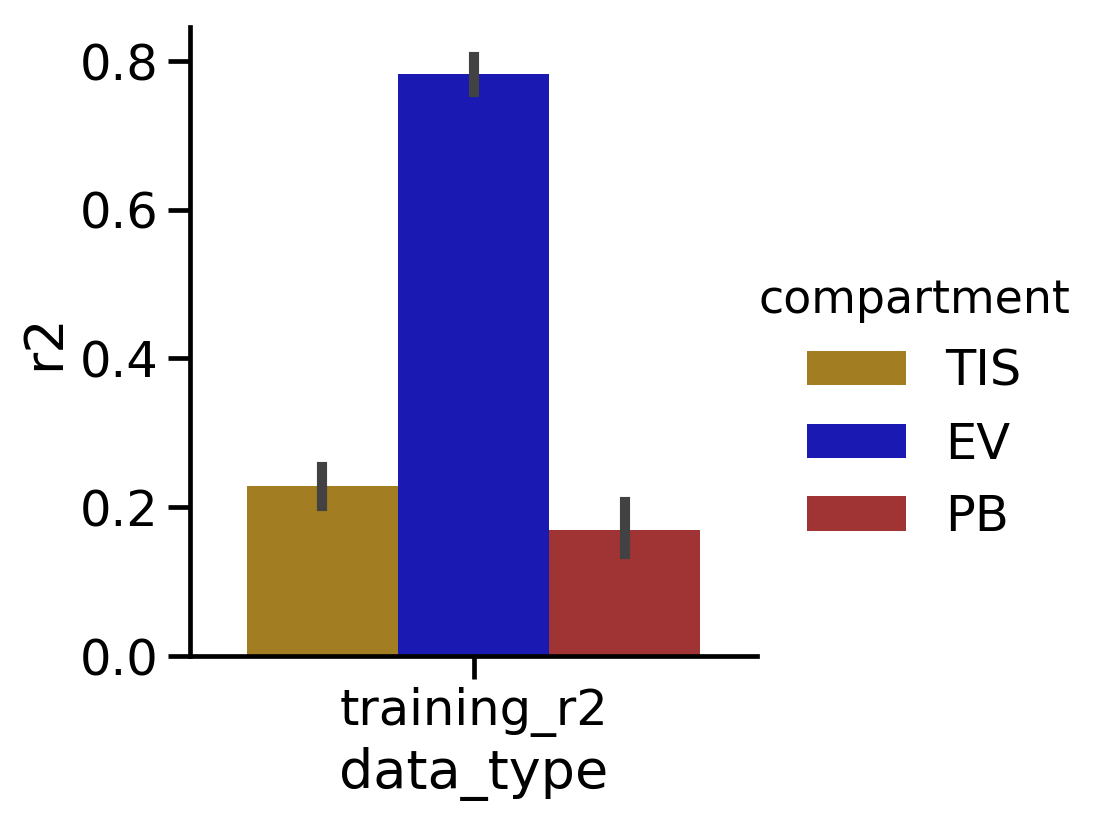

In [93]:
sns.catplot(x= 'data_type', y= 'r2', hue = 'compartment', hue_order = ['TIS', 'EV', 'PB'], 
            palette = {'PB':'firebrick', 'EV': 'mediumblue', 'TIS': 'darkgoldenrod'}, 
            kind = 'bar', data = r2_melt[r2_melt['data_type'] == 'training_r2'])

In [94]:
cell_piv.head(5)

cell_type_v2 compartment2    day challenge timePI  cage  id  \
0                   PB-EV  E10.5       sal    2hr  6942   8   
1                   PB-EV  E10.5       sal    2hr  6944  16   
2                   PB-EV  E10.5       sal    2hr  9582  15   
3                   PB-EV  E11.5       sal    2hr   429  19   
4                   PB-EV  E11.5       sal    2hr  6942  10   

cell_type_v2                       sample   B cells  Basophils  CD4+ T cells  \
0              6942_8_E10.5_sal_2hr_PB-EV  0.392713   0.022267      0.046559   
1             6944_16_E10.5_sal_2hr_PB-EV  0.286290   0.054435      0.018145   
2             9582_15_E10.5_sal_2hr_PB-EV  0.294118   0.006536      0.156863   
3              429_19_E11.5_sal_2hr_PB-EV  0.236515   0.002075      0.043568   
4             6942_10_E11.5_sal_2hr_PB-EV  0.341991   0.006494      0.101732   

cell_type_v2  CD8+ T cells  Eosinophils  Monocytes  NK cells  Neutrophils  \
0                 0.078947     0.012146   0.121457  0.176113     0.149798   
1                 0.030242     0.010081   0.135081  0.328629     0.137097   
2                 0.128540     0.006536   0.078431  0.193900     0.135076   
3                 0.043568     0.076763   0.221992  0.263485     0.112033   
4                 0.112554     0.004329   0.149351  0.173160     0.110390   

cell_type_v2  float_day  
0                  10.5  
1                  10.5  
2                  10.5  
3                  11.5  
4                  11.5

In [95]:
cell_piv.loc[:, 'stage'] = np.where(cell_piv.loc[:, 'float_day'] < 14.5, 'early', 'late')
EV_early = cell_piv[(cell_piv['compartment2'] == 'PL-EV') & (cell_piv['stage'] == 'early')]
EV_early.reset_index(inplace = True)
EV_late = cell_piv[(cell_piv['compartment2'] == 'PL-EV') & (cell_piv['stage'] == 'late')]
EV_late.reset_index(inplace = True)
ev_comp_dict = {'early': EV_early, 'late': EV_late}
ev_mse_df = pd.DataFrame(columns = ['stage', 'training_n_mse', 'test_n_mse'])
ev_r2_df = pd.DataFrame(columns = ['stage', 'training_r2', 'test_r2'])

In [96]:
ev_comp_dict.keys()

dict_keys(['early', 'late'])

In [97]:
for stage in ev_comp_dict.keys():
    compartment_df = ev_comp_dict[stage]
    compartment_df.loc[:, features] = compartment_df.loc[:, features].apply(lambda x:(x-x.mean()) / (x.max()-x.min()))
    X = compartment_df.loc[:, features].values
    Y = compartment_df.loc[:, target].values
    clf = LinearRegression()
    scores = cross_validate(clf, X, Y, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
    error_df = pd.DataFrame({'stage':stage, 'training_n_mse': scores['train_neg_mean_squared_error'], 'test_n_mse': scores['test_neg_mean_squared_error']})
    ev_mse_df = ev_mse_df.append(error_df)
    acc_df = pd.DataFrame({'stage':stage, 'training_r2': scores['train_r2'], 'test_r2': scores['test_r2']})
    ev_r2_df = ev_r2_df.append(acc_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/bendalllab/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/bendalllab/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/bendalllab/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined

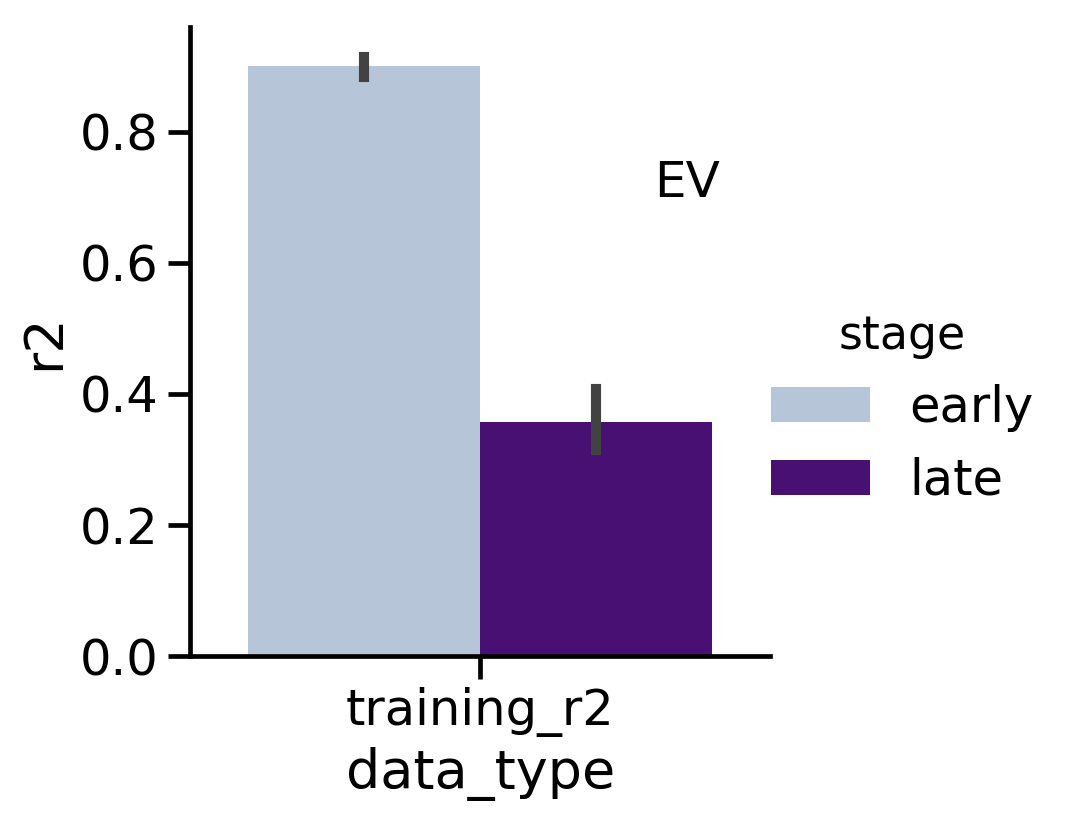

In [98]:
r2_melt = ev_r2_df.melt(id_vars = 'stage', value_vars = ['training_r2', 'test_r2'], var_name = 'data_type', value_name = 'r2')
sns.catplot(x= 'data_type', y= 'r2', hue = 'stage',  palette = {'early':'lightsteelblue', 'late':'indigo'}, 
            kind = 'bar', data = r2_melt[r2_melt['data_type'] == 'training_r2'])
plt.text(0.3, 0.7,'EV', fontsize=20);

linear regression version

In [99]:
mse_df = pd.DataFrame(columns = ['compartment', 'training_n_mse', 'test_n_mse'])
r2_df = pd.DataFrame(columns = ['compartment', 'training_r2', 'test_r2'])

In [100]:
for comp in comp_dict.keys():
    compartment_df = comp_dict[comp]
    compartment_df.loc[:, features] = compartment_df.loc[:, features].apply(lambda x:(x-x.mean()) / (x.max()-x.min()))
    X = compartment_df.loc[:, features].values
    Y = compartment_df.loc[:, target].values
    clf = LinearRegression()
    scores = cross_validate(clf, X, Y, cv= 10,
                         scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
    error_df = pd.DataFrame({'compartment':comp, 'training_n_mse': scores['train_neg_mean_squared_error'], 'test_n_mse': scores['test_neg_mean_squared_error']})
    mse_df = mse_df.append(error_df)
    acc_df = pd.DataFrame({'compartment':comp, 'training_r2': scores['train_r2'], 'test_r2': scores['test_r2']})
    r2_df = r2_df.append(acc_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [101]:
scores

{'fit_time': array([0.00055909, 0.00037193, 0.00037193, 0.00036621, 0.00042772,
        0.00037622, 0.00036192, 0.00035977, 0.00036097, 0.00036001]),
 'score_time': array([0.00056672, 0.00052309, 0.00051904, 0.00051785, 0.00058126,
        0.00051713, 0.00051212, 0.00050998, 0.00051188, 0.00051284]),
 'test_r2': array([  0.        ,   0.        ,  -6.90415113, -22.43815208,
         -1.30280881,  -6.54322567,   0.        ,   0.        ,
        -34.67942534,   0.        ]),
 'train_r2': array([0.2439274 , 0.09919899, 0.13713525, 0.20692974, 0.16669223,
        0.16053148, 0.14396543, 0.12998874, 0.12430364, 0.28413792]),
 'test_neg_mean_squared_error': array([-21.36692863,  -6.58998333,  -1.75647803,  -5.20847824,
         -0.51173529,  -1.67627237,  -1.880191  ,  -5.82667831,
         -8.91985633, -25.24540238]),
 'train_neg_mean_squared_error': array([-3.92757562, -5.6295806 , -6.18522334, -5.97576194, -6.33880994,
        -6.19841976, -5.98629731, -5.70340717, -5.47158193, -4.250431

In [102]:
r2_melt = r2_df.melt(id_vars = 'compartment', value_vars = ['training_r2', 'test_r2'], var_name = 'data_type', value_name = 'r2')

In [103]:
r2_melt.head(5)

compartment    data_type        r2
0         TIS  training_r2  0.168950
1         TIS  training_r2  0.153426
2         TIS  training_r2  0.240080
3         TIS  training_r2  0.240160
4         TIS  training_r2  0.263638

In [104]:
from scipy.stats import ttest_ind

In [105]:
comp_combs = [('TIS', 'EV'), ('EV', 'PB'), ('PB', 'TIS')]
data_types = ['training_r2', 'test_r2']
t_test_r2 = pd.DataFrame(columns =['compartment1','compartment2', 'data_type', 't-stat', 'p-value', 'Stat diff'])
for comb in comp_combs:
    for data_type in data_types: 
            comb1 = r2_melt[(r2_melt['compartment']== comb[0]) &(r2_melt['data_type']== data_type)]
            comb2 = r2_melt[(r2_melt['compartment']== comb[1]) &(r2_melt['data_type']== data_type)]

            t_stat, p_value = ttest_ind(comb1['r2'], comb2['r2'])
            alpha = 0.05
            if p_value > alpha:
                dist = 'no'
            else:
                dist = 'yes'


            data_df = pd.DataFrame(data ={'compartment1': comb[0],
                                          'compartment2': comb[1],
                                          'data_type': data_type,
                                          't-stat': [t_stat], 
                                          'p-value': [p_value], 
                                          'Stat diff':[dist]})
            t_test_r2 = t_test_r2.append(data_df)

In [106]:
t_test_r2

compartment1 compartment2    data_type     t-stat       p-value Stat diff
0          TIS           EV  training_r2 -27.786439  3.098536e-16       yes
0          TIS           EV      test_r2  -1.512935  1.476562e-01        no
0           EV           PB  training_r2  26.809606  5.816325e-16       yes
0           EV           PB      test_r2   1.097965  2.866903e-01        no
0           PB          TIS  training_r2  -2.480286  2.324001e-02       yes
0           PB          TIS      test_r2   0.363998  7.200998e-01        no

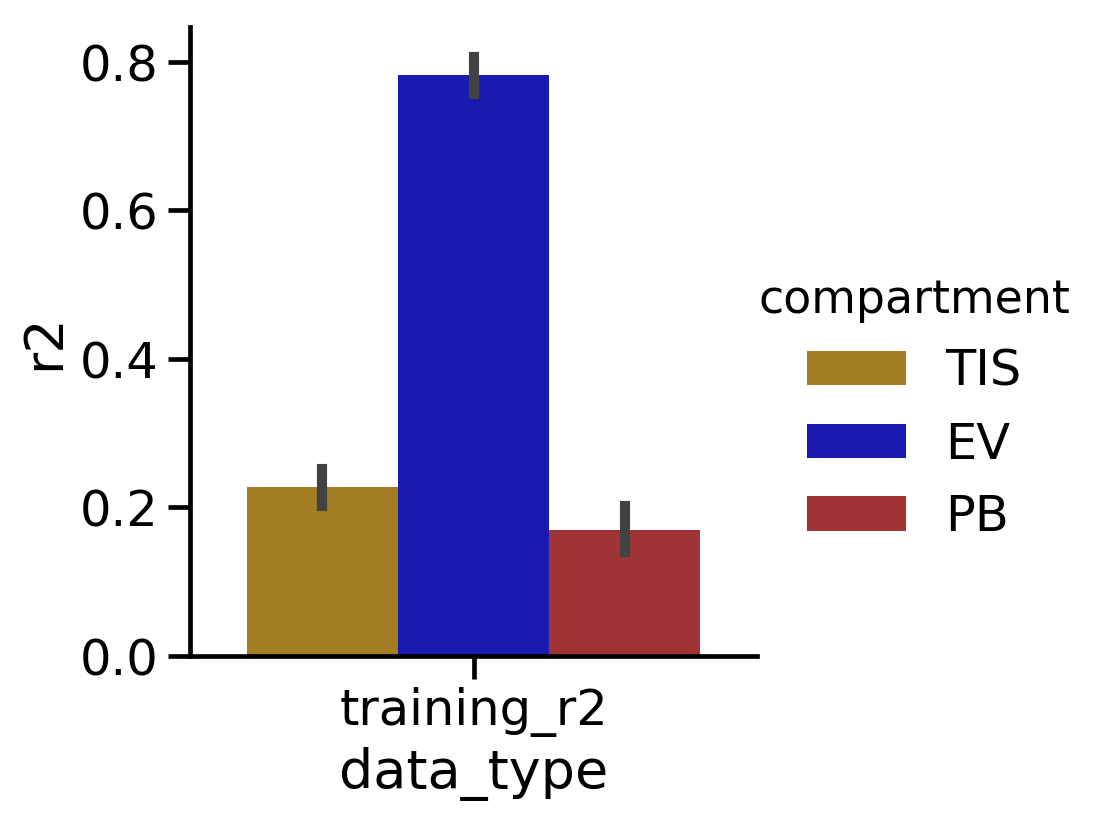

In [107]:
sns.catplot(x= 'data_type', y= 'r2', hue = 'compartment', hue_order = ['TIS', 'EV', 'PB'], 
            palette = {'PB':'firebrick', 'EV': 'mediumblue', 'TIS': 'darkgoldenrod'}, 
            kind = 'bar', data = r2_melt[r2_melt['data_type'] == 'training_r2'])

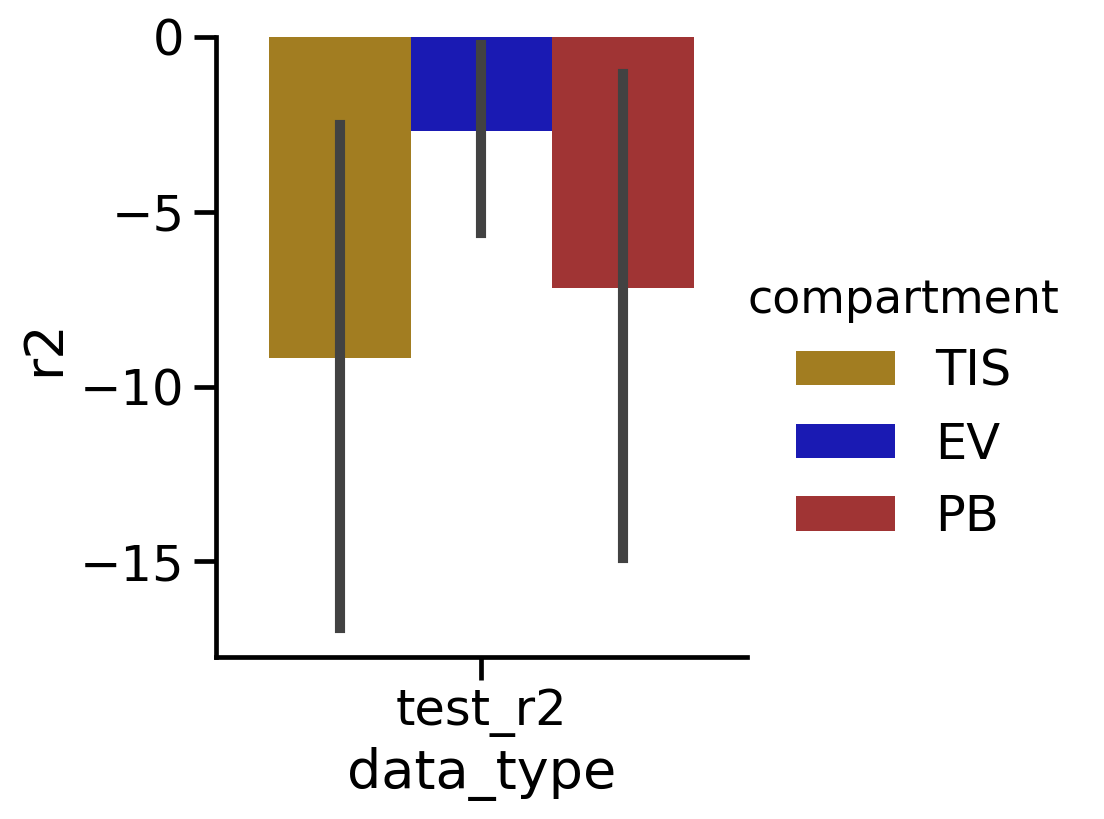

In [108]:
sns.catplot(x= 'data_type', y= 'r2', hue = 'compartment', hue_order = ['TIS', 'EV', 'PB'], 
            palette = {'PB':'firebrick', 'EV': 'mediumblue', 'TIS': 'darkgoldenrod'}, 
            kind = 'bar', data = r2_melt[r2_melt['data_type'] == 'test_r2'])

In [109]:
cell_piv.loc[:, 'stage'] = np.where(cell_piv.loc[:, 'float_day'] < 14.5, 'early', 'late')
EV_early = cell_piv[(cell_piv['compartment2'] == 'PL-EV') & (cell_piv['stage'] == 'early')]
EV_early.reset_index(inplace = True)
EV_late = cell_piv[(cell_piv['compartment2'] == 'PL-EV') & (cell_piv['stage'] == 'late')]
EV_late.reset_index(inplace = True)

In [110]:
ev_comp_dict = {'early': EV_early, 'late': EV_late}
ev_alpha_dict = {'early': 0.1, 'late': 0.1}

linear regression version

In [111]:
ev_mse_df = pd.DataFrame(columns = ['stage', 'training_n_mse', 'test_n_mse'])
ev_r2_df = pd.DataFrame(columns = ['stage', 'training_r2', 'test_r2'])

In [112]:
for stage in ev_comp_dict.keys():
    compartment_df = ev_comp_dict[stage]
    compartment_df.loc[:, features] = compartment_df.loc[:, features].apply(lambda x:(x-x.mean()) / (x.max()-x.min()))
    X = compartment_df.loc[:, features].values
    Y = compartment_df.loc[:, target].values
    clf = LinearRegression()
    scores = cross_validate(clf, X, Y, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
    error_df = pd.DataFrame({'stage':stage, 'training_n_mse': scores['train_neg_mean_squared_error'], 'test_n_mse': scores['test_neg_mean_squared_error']})
    ev_mse_df = ev_mse_df.append(error_df)
    acc_df = pd.DataFrame({'stage':stage, 'training_r2': scores['train_r2'], 'test_r2': scores['test_r2']})
    ev_r2_df = ev_r2_df.append(acc_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/bendalllab/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/bendalllab/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/bendalllab/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined

In [113]:
r2_melt = ev_r2_df.melt(id_vars = 'stage', value_vars = ['training_r2', 'test_r2'], var_name = 'data_type', value_name = 'r2')

In [114]:
r2_melt.head(5)

stage    data_type        r2
0  early  training_r2  0.851300
1  early  training_r2  0.888814
2  early  training_r2  0.920388
3  early  training_r2  0.923207
4  early  training_r2  0.923214

In [115]:
stage_comb = ('early', 'late')
data_types = ['training_r2', 'test_r2']
t_test_r2 = pd.DataFrame(columns =['stage1','stage2', 'data_type', 't-stat', 'p-value', 'Stat diff'])
for data_type in data_types: 
        comb1 = r2_melt[(r2_melt['stage']== stage_comb[0]) &(r2_melt['data_type']== data_type)]
        comb2 = r2_melt[(r2_melt['stage']== stage_comb[1]) &(r2_melt['data_type']== data_type)]

        t_stat, p_value = ttest_ind(comb1['r2'], comb2['r2'])
        alpha = 0.05
        if p_value > alpha:
            dist = 'no'
        else:
            dist = 'yes'


        data_df = pd.DataFrame(data ={'stage1': stage_comb[0],
                                      'stage2': stage_comb[1],
                                      'data_type': data_type,
                                      't-stat': [t_stat], 
                                      'p-value': [p_value], 
                                      'Stat diff':[dist]})
        t_test_r2 = t_test_r2.append(data_df)

In [116]:
t_test_r2

stage1 stage2    data_type     t-stat       p-value Stat diff
0  early   late  training_r2  20.484817  6.367626e-14       yes
0  early   late      test_r2        NaN           NaN       yes

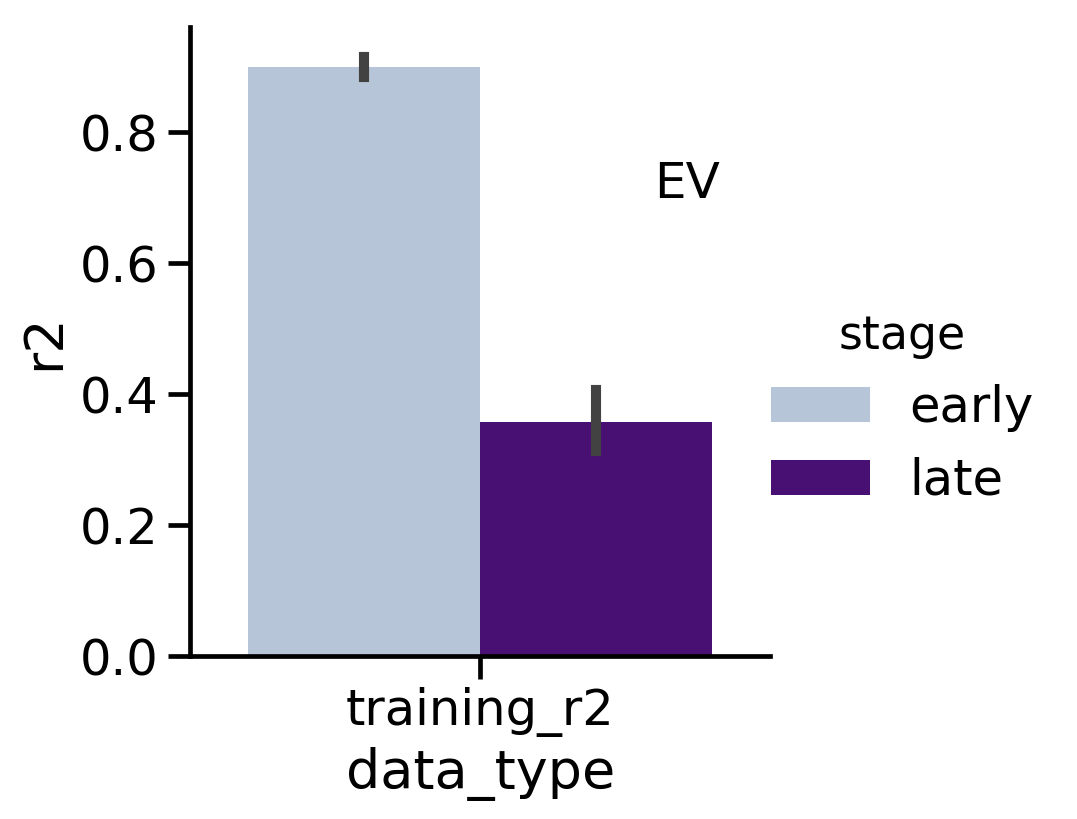

In [117]:
sns.catplot(x= 'data_type', y= 'r2', hue = 'stage',  palette = {'early':'lightsteelblue', 'late':'indigo'}, 
            kind = 'bar', data = r2_melt[r2_melt['data_type'] == 'training_r2'])
plt.text(0.3, 0.7,'EV', fontsize=20);

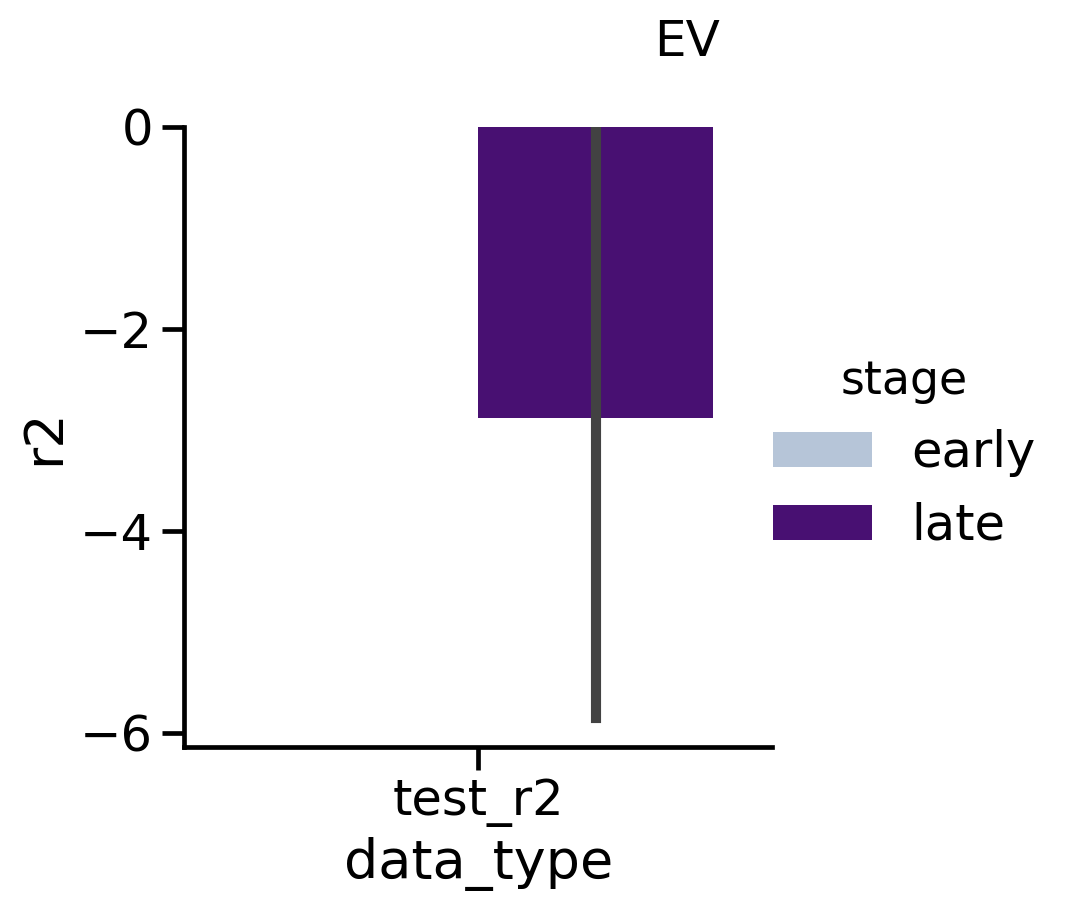

In [118]:
sns.catplot(x= 'data_type', y= 'r2', hue = 'stage',  palette = {'early':'lightsteelblue', 'late':'indigo'}, 
            kind = 'bar', data = r2_melt[r2_melt['data_type'] == 'test_r2'])
plt.text(0.3, 0.7,'EV', fontsize=20);

#  Figure 2F

In [120]:
import statsmodels.stats.multitest as sm

In [182]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
umap_path = os.path.join(subsample_path, '20200508_maternal500_fetal_wo_outliers.csv')
adata_df = pd.read_csv(umap_path)
adata_df.loc[:, ['cage', 'id']] = adata_df.loc[:, ['cage', 'id']].astype('str')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [185]:
bl_df = adata_df[(adata_df['test_status'] == 'test') & 
                 (adata_df['challenge'] == 'sal') & 
                 (adata_df['timePI'] == '2hr') &
                 (adata_df['origin'] == 'maternal') &
                 adata_df['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T'])]

In [187]:
columns_int = ['CD45-retroorbital', 'CD45.2', 'CD45.1', 'IdU', 'B220', 'Ly-6G',
       'CD11c', 'TCRb', 'CD115', 'CD69', 'F480', 'CD3', 'IgD', 'CD19',
       'CD25', 'CD64', 'CD80', 'CD8', 'CD11b', 'CD40', 'IgM', 'c-Kit',
       'FOXP3', 'TCRgd', 'CTLA-4', 'Ly-6C', 'CD194', 'CD62L', 'PD-L1',
       'FcERI', 'NKp46', 'Siglec-F', 'CD68', 'CD49b', 'CD44', 'CD4',
       'PD-1', 'MHCII', 'CD86', 'prpS6', 'cell_type_v2', 'day', 'cage', 'id','compartment2', 'batch_run']
pivot_series = bl_df[columns_int].pivot_table(columns= ['cell_type_v2', 'day', 'cage', 'id','compartment2', 'batch_run'], aggfunc = 'median')
median_df = pd.DataFrame(pivot_series)
median_df.reset_index(inplace = True)
median_df.rename(columns = {'level_0': 'marker', 0: 'median'}, inplace = True)

In [188]:
days_dict = {'E10.5': 10.5,
 'E11.5': 11.5,
 'E12.5': 12.5,
 'E13.5': 13.5,
 'E14.5': 14.5,
 'E15.5': 15.5,
 'E16.5': 16.5,
 'E17.5': 17.5,
 'E18.5': 18.5}
median_df.loc[:, 'float_day'] = median_df.loc[:, 'day'].map(days_dict)
median_df.loc[:, 'stage'] = np.where(median_df.loc[:, 'float_day'] < 14.5, 'early', 'late')

In [189]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
medians_csv = '20201204_maternal500wo_outliers_bl_medians_per_sample.csv'
medians_filepath = os.path.join(subsample_path, medians_csv)
median_df.to_csv(medians_filepath, index = False)

In [190]:
cell_list = median_df['cell_type_v2'].unique().tolist()
compartments = median_df['compartment2'].unique().tolist()
markers = ['IdU',
 'B220',
 'Ly-6G',
 'CD11c',
 'TCRb',
 'CD115',
 'CD69',
 'F480',
 'CD3',
 'IgD',
 'CD19',
 'CD25',
 'CD64',
 'CD80',
 'CD8',
 'CD11b',
 'CD40',
 'IgM',
 'c-Kit',
 'FOXP3',
 'TCRgd',
 'CTLA-4',
 'Ly-6C',
 'CD194',
 'CD62L',
 'PD-L1',
 'FcERI',
 'NKp46',
 'Siglec-F',
 'CD68',
 'CD49b',
 'CD44',
 'CD4',
 'PD-1',
 'MHCII',
 'CD86',
 'prpS6']

In [192]:
prot_medians = median_df[median_df['batch_run'] == 2018]
t_test_data = pd.DataFrame(columns =['marker','compartment2', 'cell_type_v2', 'log2_latedivearly','t-stat', 'p-value', 'Stat diff'])
for marker in markers:
    for compartment in compartments:
        for cell in cell_list:
                cell_early = prot_medians[(prot_medians['marker']== marker)&
                                          (prot_medians['cell_type_v2']== cell) & 
                                        (prot_medians['compartment2']== compartment) & 
                                        (prot_medians['stage']== 'early')]
                cell_late = prot_medians[(prot_medians['marker']== marker)&
                                         (prot_medians['cell_type_v2']== cell) & 
                                        (prot_medians['compartment2']== compartment) & 
                                        (prot_medians['stage']== 'late')]

                early_mean = cell_early.mean()['median']
                late_mean = cell_late.mean()['median']
                log_diff = np.log2(late_mean/early_mean)
                t_stat, p = ttest_ind(cell_early['median'], cell_late['median'])
                alpha = 0.05
                if p > alpha:
                    dist = 'no'
                else:
                    dist = 'yes'
                data_df = pd.DataFrame(data ={'marker': [marker],
                                              'compartment2': [compartment], 
                                              'cell_type_v2': [cell],
                                              'log2_latedivearly': [log_diff],
                                              't-stat': [t_stat], 
                                              'p-value': [p], 
                                              'Stat diff':[ dist]})
                t_test_data = t_test_data.append(data_df)

In [193]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
ttest_path2 = os.path.join(subsample_path, '20201204_batch2018_t_test_all_markers_all_days.csv')
t_test_data.to_csv(ttest_path2, index = False)

In [194]:
t_test_data.head(5)

marker compartment2  cell_type_v2  log2_latedivearly    t-stat   p-value  \
0    IdU        PB-EV       B cells          -0.614844  0.999211  0.327661   
0    IdU        PB-EV     Basophils           0.915624 -1.335718  0.195296   
0    IdU        PB-EV  CD4+ T cells          -0.353890  0.560350  0.580434   
0    IdU        PB-EV  CD8+ T cells           0.867147 -1.477764  0.152475   
0    IdU        PB-EV   Eosinophils          -1.126128  1.824244  0.081135   

  Stat diff  
0        no  
0        no  
0        no  
0        no  
0        no

neutrophils_only = t_test_data2[(t_test_data2['cell_type_v2'] == 'Neutrophils') & (~(t_test_data2['marker'].isin(['CTLA-4'])))]
monocytes_only = t_test_data2[(t_test_data2['cell_type_v2'] == 'Monocytes') & (~(t_test_data2['marker'].isin(['CD194', 'CTLA-4'])))]

now only use markers that are expressed in the cells

In [195]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
medians_csv = '20201204_maternal500wo_outliers_bl_medians_per_sample.csv'
medians_filepath = os.path.join(subsample_path, medians_csv)
median_df = pd.read_csv(medians_filepath)
median_df.loc[:, ['cage', 'id']] = median_df.loc[:, ['cage', 'id']].astype('str')

In [196]:
prot_medians = median_df[median_df['batch_run'] == 2018]

marker cell_type_v2    day  cage  id compartment2  batch_run  \
0  CD45-retroorbital      B cells  E10.5  6942   8        PB-EV       2018   
1  CD45-retroorbital      B cells  E10.5  6942   8        PL-EV       2018   
2  CD45-retroorbital      B cells  E10.5  6942   8         PL-T       2018   
3  CD45-retroorbital      B cells  E10.5  6943  15        PB-EV       2019   
4  CD45-retroorbital      B cells  E10.5  6944  16        PB-EV       2018   

     median  float_day  stage  
0  4.773626       10.5  early  
1  4.642530       10.5  early  
2  1.893809       10.5  early  
3  4.397351       10.5  early  
4  4.785401       10.5  early

In [197]:
mo_medians = prot_medians[(prot_medians['cell_type_v2']== 'Monocytes')]
neutro_medians = prot_medians[(prot_medians['cell_type_v2']=='Neutrophils')]

In [198]:
mo_medians.head(5)

marker cell_type_v2    day  cage  id compartment2  batch_run  \
501  CD45-retroorbital    Monocytes  E10.5  6942   8        PB-EV       2018   
502  CD45-retroorbital    Monocytes  E10.5  6942   8        PL-EV       2018   
503  CD45-retroorbital    Monocytes  E10.5  6942   8         PL-T       2018   
505  CD45-retroorbital    Monocytes  E10.5  6944  16        PB-EV       2018   
506  CD45-retroorbital    Monocytes  E10.5  6944  16        PL-EV       2018   

       median  float_day  stage  
501  4.724455       10.5  early  
502  4.639658       10.5  early  
503  2.510264       10.5  early  
505  4.314407       10.5  early  
506  4.786741       10.5  early

In [199]:
neutro_medians['expressed'] = 'no'
neu_expressed_mask = (neutro_medians['median'] > 1)
neutro_medians['expressed'][neu_expressed_mask] = 'yes'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
neutro_medians[neutro_medians['expressed'] == 'yes']['marker'].unique()

array(['CD45-retroorbital', 'CD45.2', 'B220', 'Ly-6G', 'CD80', 'CD11b',
       'CD40', 'Ly-6C', 'CD194', 'Siglec-F', 'CD68', 'CD49b', 'CD44',
       'CD4', 'MHCII'], dtype=object)

In [201]:
mo_medians['expressed'] = 'no'
mo_expressed_mask = (mo_medians['median'] > 1)
mo_medians['expressed'][mo_expressed_mask] = 'yes'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
mo_medians[mo_medians['expressed'] == 'yes']['marker'].unique()

array(['CD45-retroorbital', 'CD45.2', 'IdU', 'B220', 'CD11c', 'CD115',
       'F480', 'CD64', 'CD80', 'CD11b', 'CD40', 'IgM', 'CTLA-4', 'Ly-6C',
       'CD194', 'PD-L1', 'CD68', 'CD49b', 'CD44', 'CD4', 'MHCII'],
      dtype=object)

In [203]:
mono_markers = ['IdU', 'B220', 'CD11c', 'CD115',
       'F480', 'CD64', 'CD80', 'CD11b', 'CD40','Ly-6C', 
                'CD62L', 'PD-L1', 'CD68', 'CD49b', 'CD44', 'CD4','MHCII']

In [204]:
neutro_markers = ['IdU', 'B220', 'Ly-6G','CD80', 'CD11b',
       'CD40', 'Ly-6C', 'CD62L', 'PD-L1', 'CD49b', 'CD44', 'MHCII']

In [205]:
mo_medians = prot_medians[(prot_medians['cell_type_v2']== 'Monocytes') & prot_medians['marker'].isin(mono_markers)]
neutro_medians = prot_medians[(prot_medians['cell_type_v2']=='Neutrophils') & prot_medians['marker'].isin(neutro_markers)]

neutrophils_only = t_test_data2[(t_test_data2['cell_type_v2'] == 'Neutrophils') & t_test_data2['marker'].isin(neutro_markers)]
monocytes_only = t_test_data2[(t_test_data2['cell_type_v2'] == 'Monocytes') & t_test_data2['marker'].isin(mono_markers)]

In [206]:
neutrophils_only = t_test_data[(t_test_data['cell_type_v2'] == 'Neutrophils') & t_test_data['marker'].isin(neutro_markers) & t_test_data['compartment2'].isin(['PL-T', 'PL-EV'])]
monocytes_only = t_test_data[(t_test_data['cell_type_v2'] == 'Monocytes') & t_test_data['marker'].isin(mono_markers) & t_test_data['compartment2'].isin(['PL-T', 'PL-EV'])]

In [207]:
neu_adjust_pval = sm.multipletests(neutrophils_only['p-value'].values, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
mo_adjust_pval = sm.multipletests(monocytes_only['p-value'].values, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)

In [208]:
neutrophils_only.loc[:, 'reject'] = neu_adjust_pval[0]
neutrophils_only.loc[:, 'adj_p_val'] = neu_adjust_pval[1]
monocytes_only.loc[:, 'reject'] = mo_adjust_pval[0]
monocytes_only.loc[:, 'adj_p_val'] = mo_adjust_pval[1]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [209]:
neutrophils_only['neg_log10_pval'] = -np.log10(neutrophils_only['p-value'])
monocytes_only['neg_log10_pval'] = -np.log10(monocytes_only['p-value'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [210]:
neutrophils_only['adj_neg_log10_pval'] = -np.log10(neutrophils_only['adj_p_val'])
monocytes_only['adj_neg_log10_pval'] = -np.log10(monocytes_only['adj_p_val'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [211]:
monocytes_only.head(5)

marker compartment2 cell_type_v2  log2_latedivearly    t-stat   p-value  \
0    IdU        PL-EV    Monocytes          -0.827564  2.445096  0.022197   
0    IdU         PL-T    Monocytes          -0.741856  3.622035  0.001361   
0   B220        PL-EV    Monocytes           0.016250 -0.489383  0.629014   
0   B220         PL-T    Monocytes          -0.031992  1.240861  0.226650   
0  CD11c        PL-EV    Monocytes          -0.968047  2.564173  0.017026   

  Stat diff  reject  adj_p_val  neg_log10_pval  adj_neg_log10_pval  
0       yes   False   0.754705        1.653702            0.122223  
0       yes    True   0.046270        2.866179            1.334700  
0        no   False   1.000000        0.201340           -0.000000  
0        no   False   1.000000        0.644644           -0.000000  
0       yes   False   0.578868        1.768899            0.237420

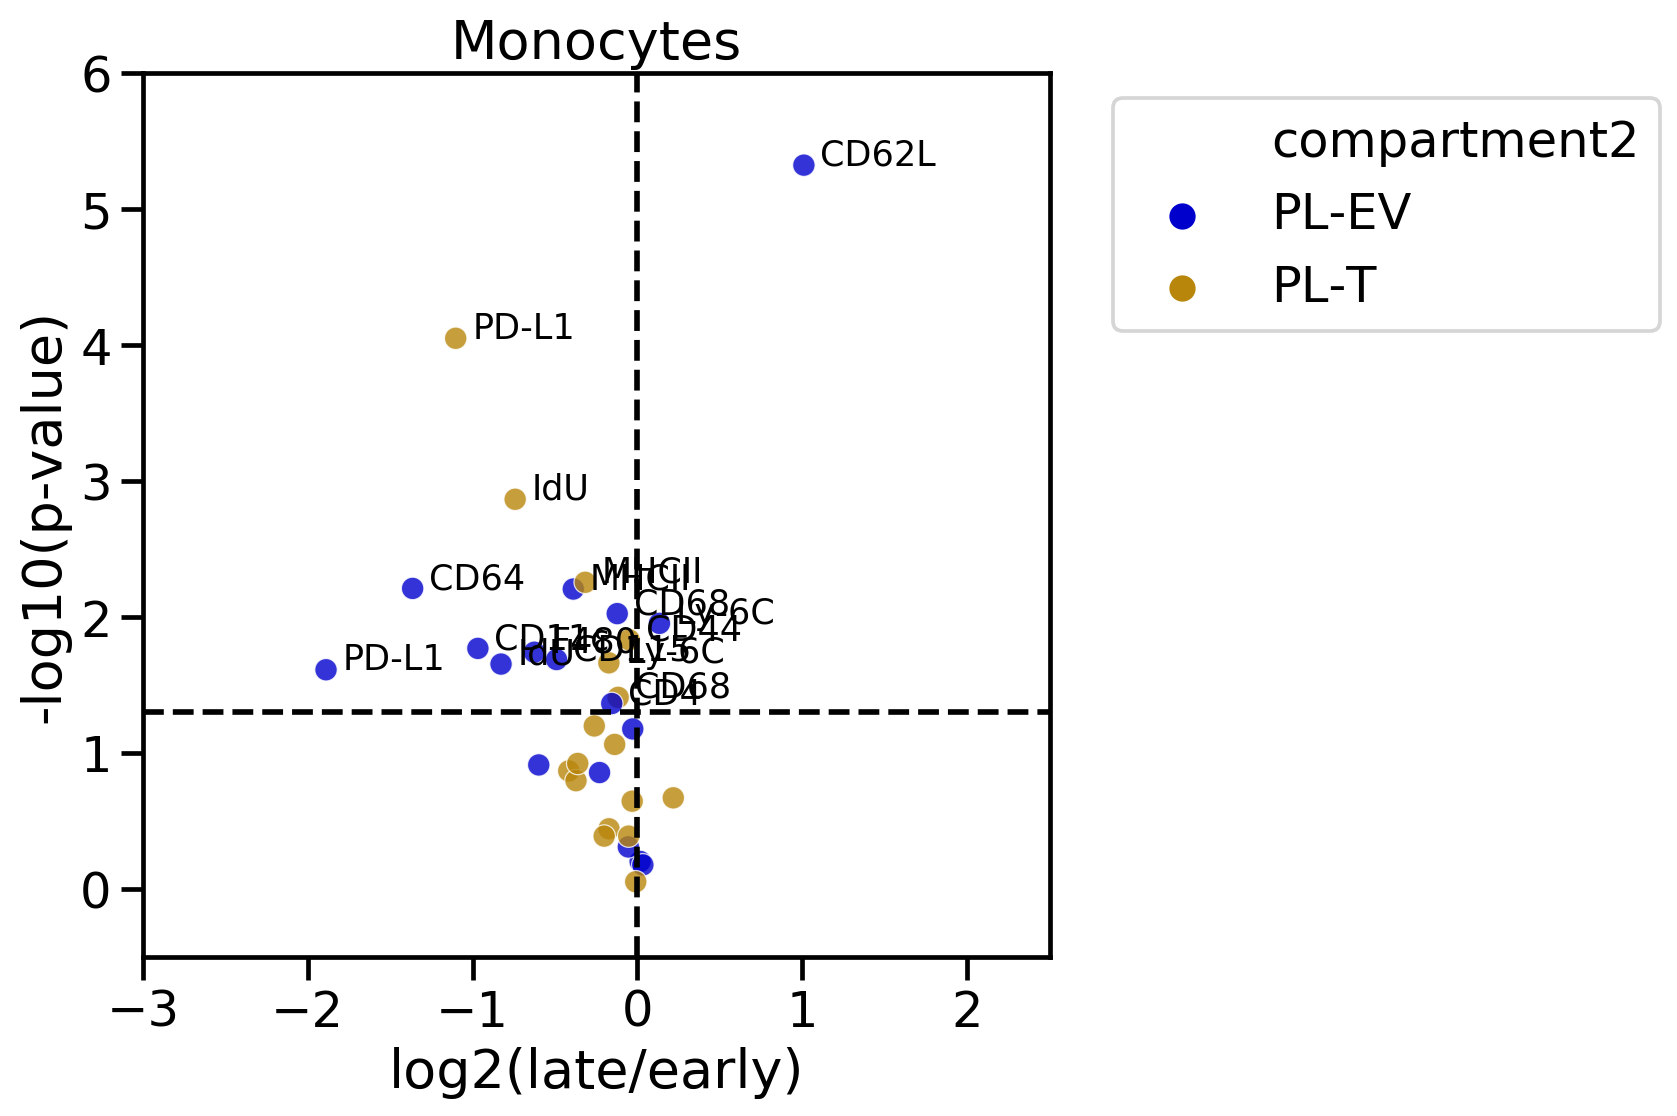

In [224]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x= 'log2_latedivearly', y='neg_log10_pval',
                     hue='compartment2', palette = {'PB-EV':'firebrick', 'PL-EV': 'mediumblue', 'PL-T': 'darkgoldenrod'}, 
                data=monocytes_only,  marker='o', linewidth = 0.5, alpha = 0.8, ax = ax)
plt.title('Monocytes')
plt.xlabel('log2(late/early)')
plt.ylabel('-log10(p-value)')
plt.xlim(-3, 2.5)
plt.ylim(-0.5, 6)
ax.legend(bbox_to_anchor=(1.7, 1))
plt.axhline(y=1.301, color='k', linestyle='--')
#plt.axhline(y=3.301, color='grey', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
for i, point, in monocytes_only.iterrows():
    if (point['Stat diff'] == 'yes'): #and (point['marker'] in ['PD-L1', 'Ly-6C']):
        ax.text(point['log2_latedivearly']+ 0.1, point['neg_log10_pval'], point['marker'], fontsize=14)


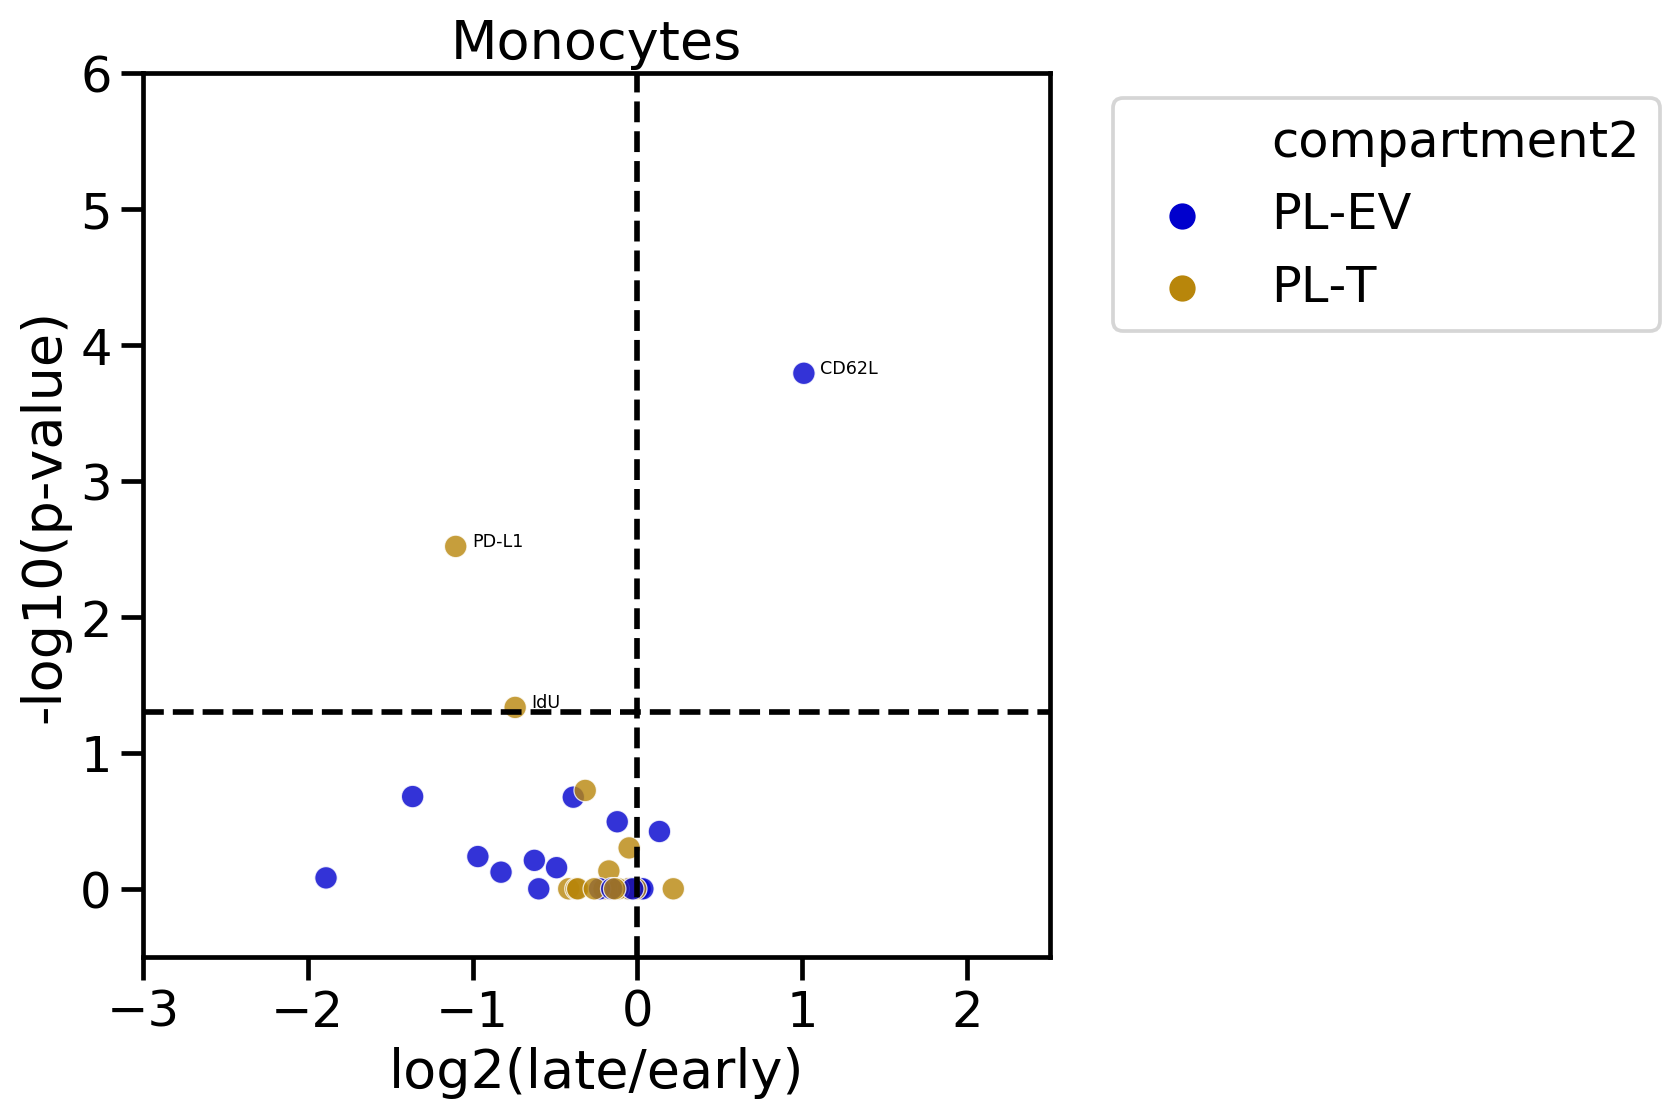

In [225]:
plt.rcParams['figure.dpi'] = 180
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x= 'log2_latedivearly', y='adj_neg_log10_pval',
                     hue='compartment2', palette = {'PB-EV':'firebrick', 'PL-EV': 'mediumblue', 'PL-T': 'darkgoldenrod'}, 
                data=monocytes_only,  marker='o', linewidth = 0.5, alpha = 0.8, ax = ax)
plt.title('Monocytes')
plt.xlabel('log2(late/early)')
plt.ylabel('-log10(p-value)')
plt.xlim(-3, 2.5)
plt.ylim(-0.5, 6)
ax.legend(bbox_to_anchor=(1.7, 1))
plt.axhline(y=1.301, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
for i, point, in monocytes_only.iterrows():
    if point['reject'] == True:
        ax.text(point['log2_latedivearly']+ 0.1, point['adj_neg_log10_pval'], point['marker'], fontsize=7)

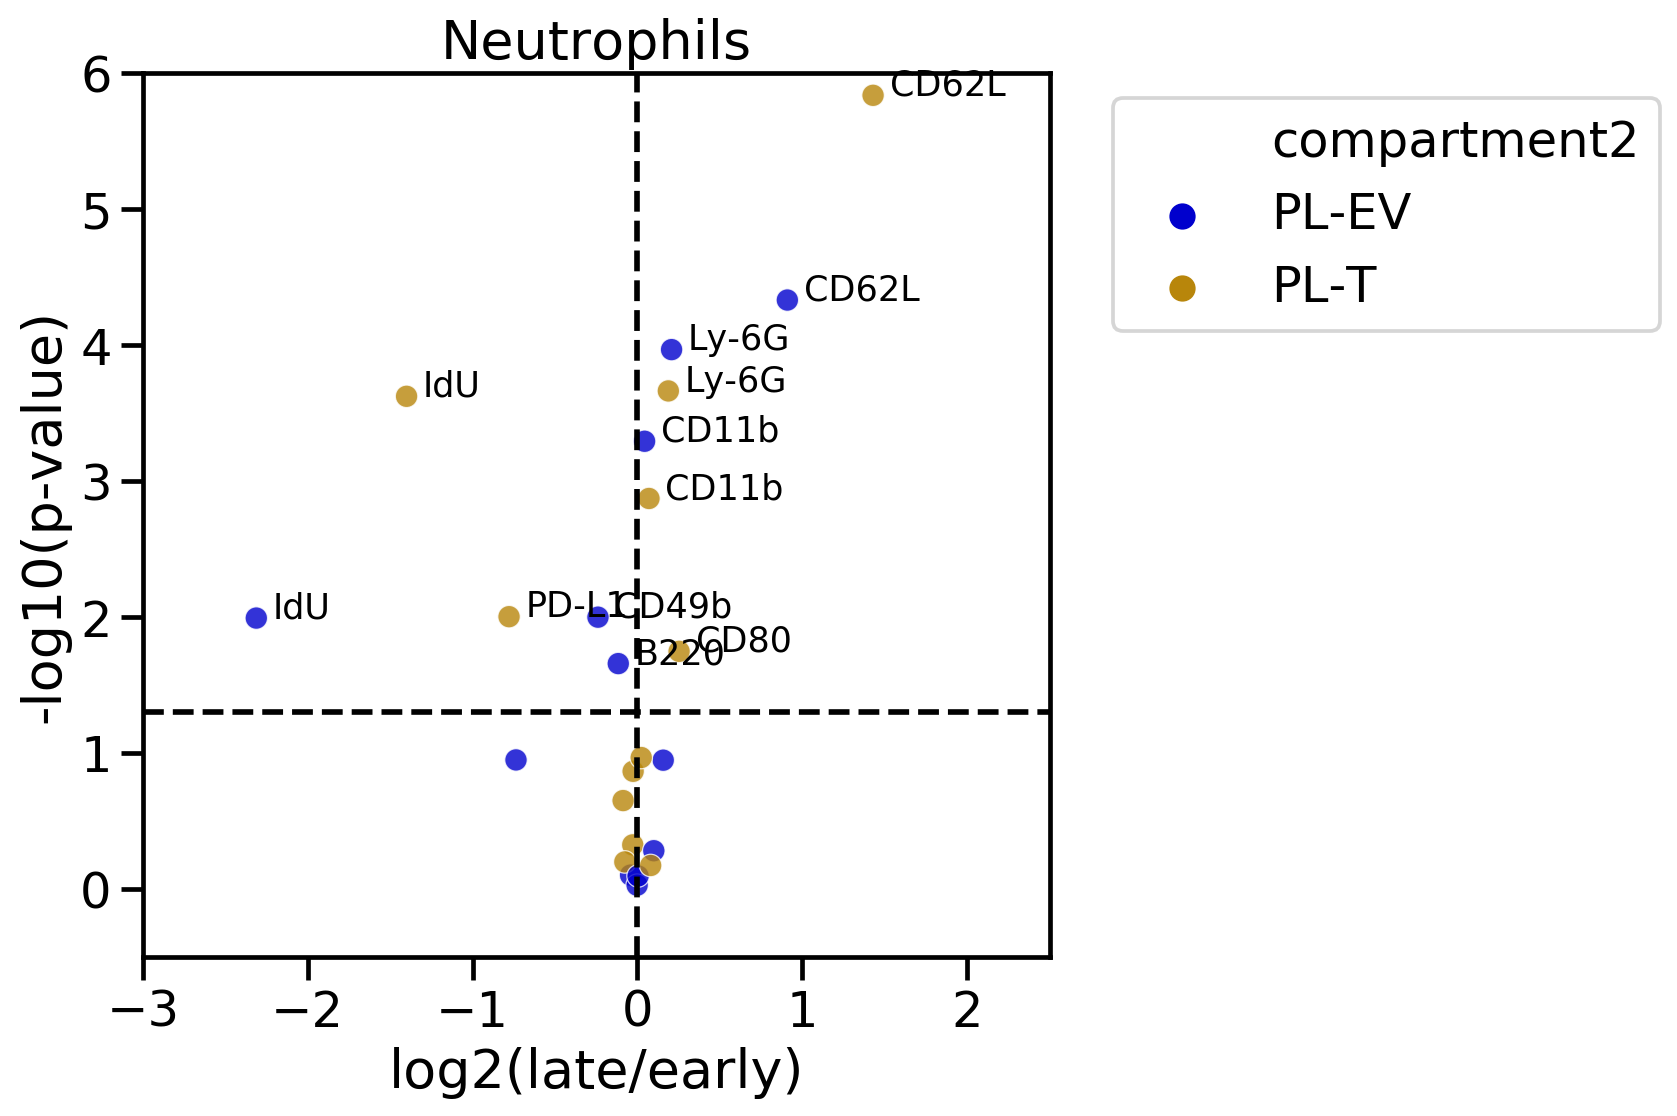

In [226]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x= 'log2_latedivearly', y='neg_log10_pval',
                     hue='compartment2', palette = {'PB-EV':'firebrick', 'PL-EV': 'mediumblue', 'PL-T': 'darkgoldenrod'}, 
                data=neutrophils_only,  marker='o', linewidth = 0.5, alpha = 0.8, ax = ax)
plt.title('Neutrophils')
plt.xlabel('log2(late/early)')
plt.ylabel('-log10(p-value)')
plt.xlim(-3, 2.5)
plt.ylim(-0.5, 6)
ax.legend(bbox_to_anchor=(1.7, 1))
plt.axhline(y=1.301, color='k', linestyle='--')
#plt.axhline(y=3.301, color='grey', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
for i, point, in neutrophils_only.iterrows():
    if (point['Stat diff'] == 'yes'):
        ax.text(point['log2_latedivearly']+ 0.1, point['neg_log10_pval'], point['marker'], fontsize=14)

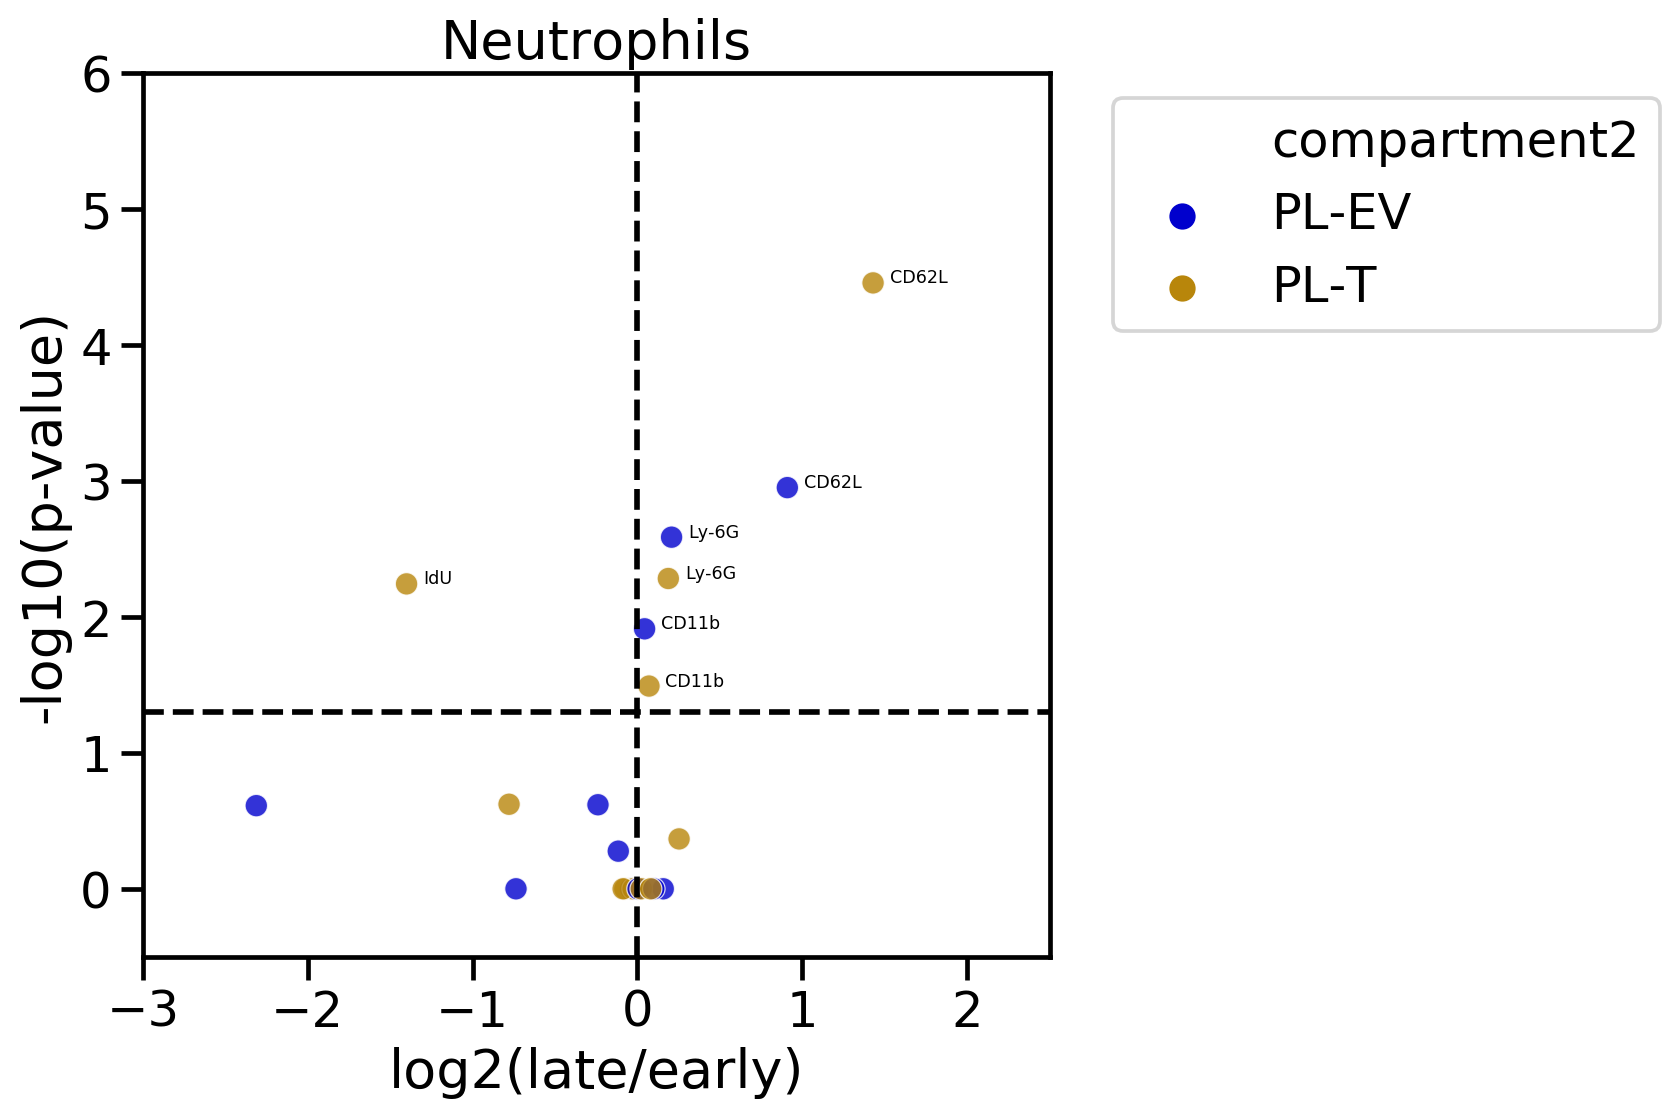

In [227]:
plt.rcParams['figure.dpi'] = 180
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x= 'log2_latedivearly', y='adj_neg_log10_pval',
                     hue='compartment2', palette = {'PB-EV':'firebrick', 'PL-EV': 'mediumblue', 'PL-T': 'darkgoldenrod'}, 
                data= neutrophils_only,  marker='o', linewidth = 0.5, alpha = 0.8, ax = ax)
plt.title('Neutrophils')
plt.xlabel('log2(late/early)')
plt.ylabel('-log10(p-value)')
plt.xlim(-3, 2.5)
plt.ylim(-0.5, 6)
ax.legend(bbox_to_anchor=(1.7, 1))
plt.axhline(y=1.301, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
for i, point, in neutrophils_only.iterrows():
    if point['reject'] == True:
        ax.text(point['log2_latedivearly']+ 0.1, point['adj_neg_log10_pval'], point['marker'], fontsize=7)

# Figure 2G

In [229]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
medians_csv = '20201204_maternal500wo_outliers_bl_medians_per_sample.csv'
medians_filepath = os.path.join(subsample_path, medians_csv)
median_df = pd.read_csv(medians_filepath)
median_df.loc[:, ['cage', 'id']] = median_df.loc[:, ['cage', 'id']].astype('str')

In [230]:
prot_medians = median_df[median_df['batch_run'] == 2018]

In [231]:
mono_df = prot_medians[(prot_medians['cell_type_v2'] == 'Monocytes') & prot_medians['marker'].isin(['Ly-6C', 'IdU','PD-L1', 'CD62L'])]
neu_df = prot_medians[(prot_medians['cell_type_v2'] == 'Neutrophils') & prot_medians['marker'].isin(['Ly-6G','CD11b','IdU', 'PD-L1', 'CD62L'])]

In [232]:
comp_dict = {'PB-EV':'firebrick', 'PL-EV': 'mediumblue', 'PL-T': 'darkgoldenrod'}

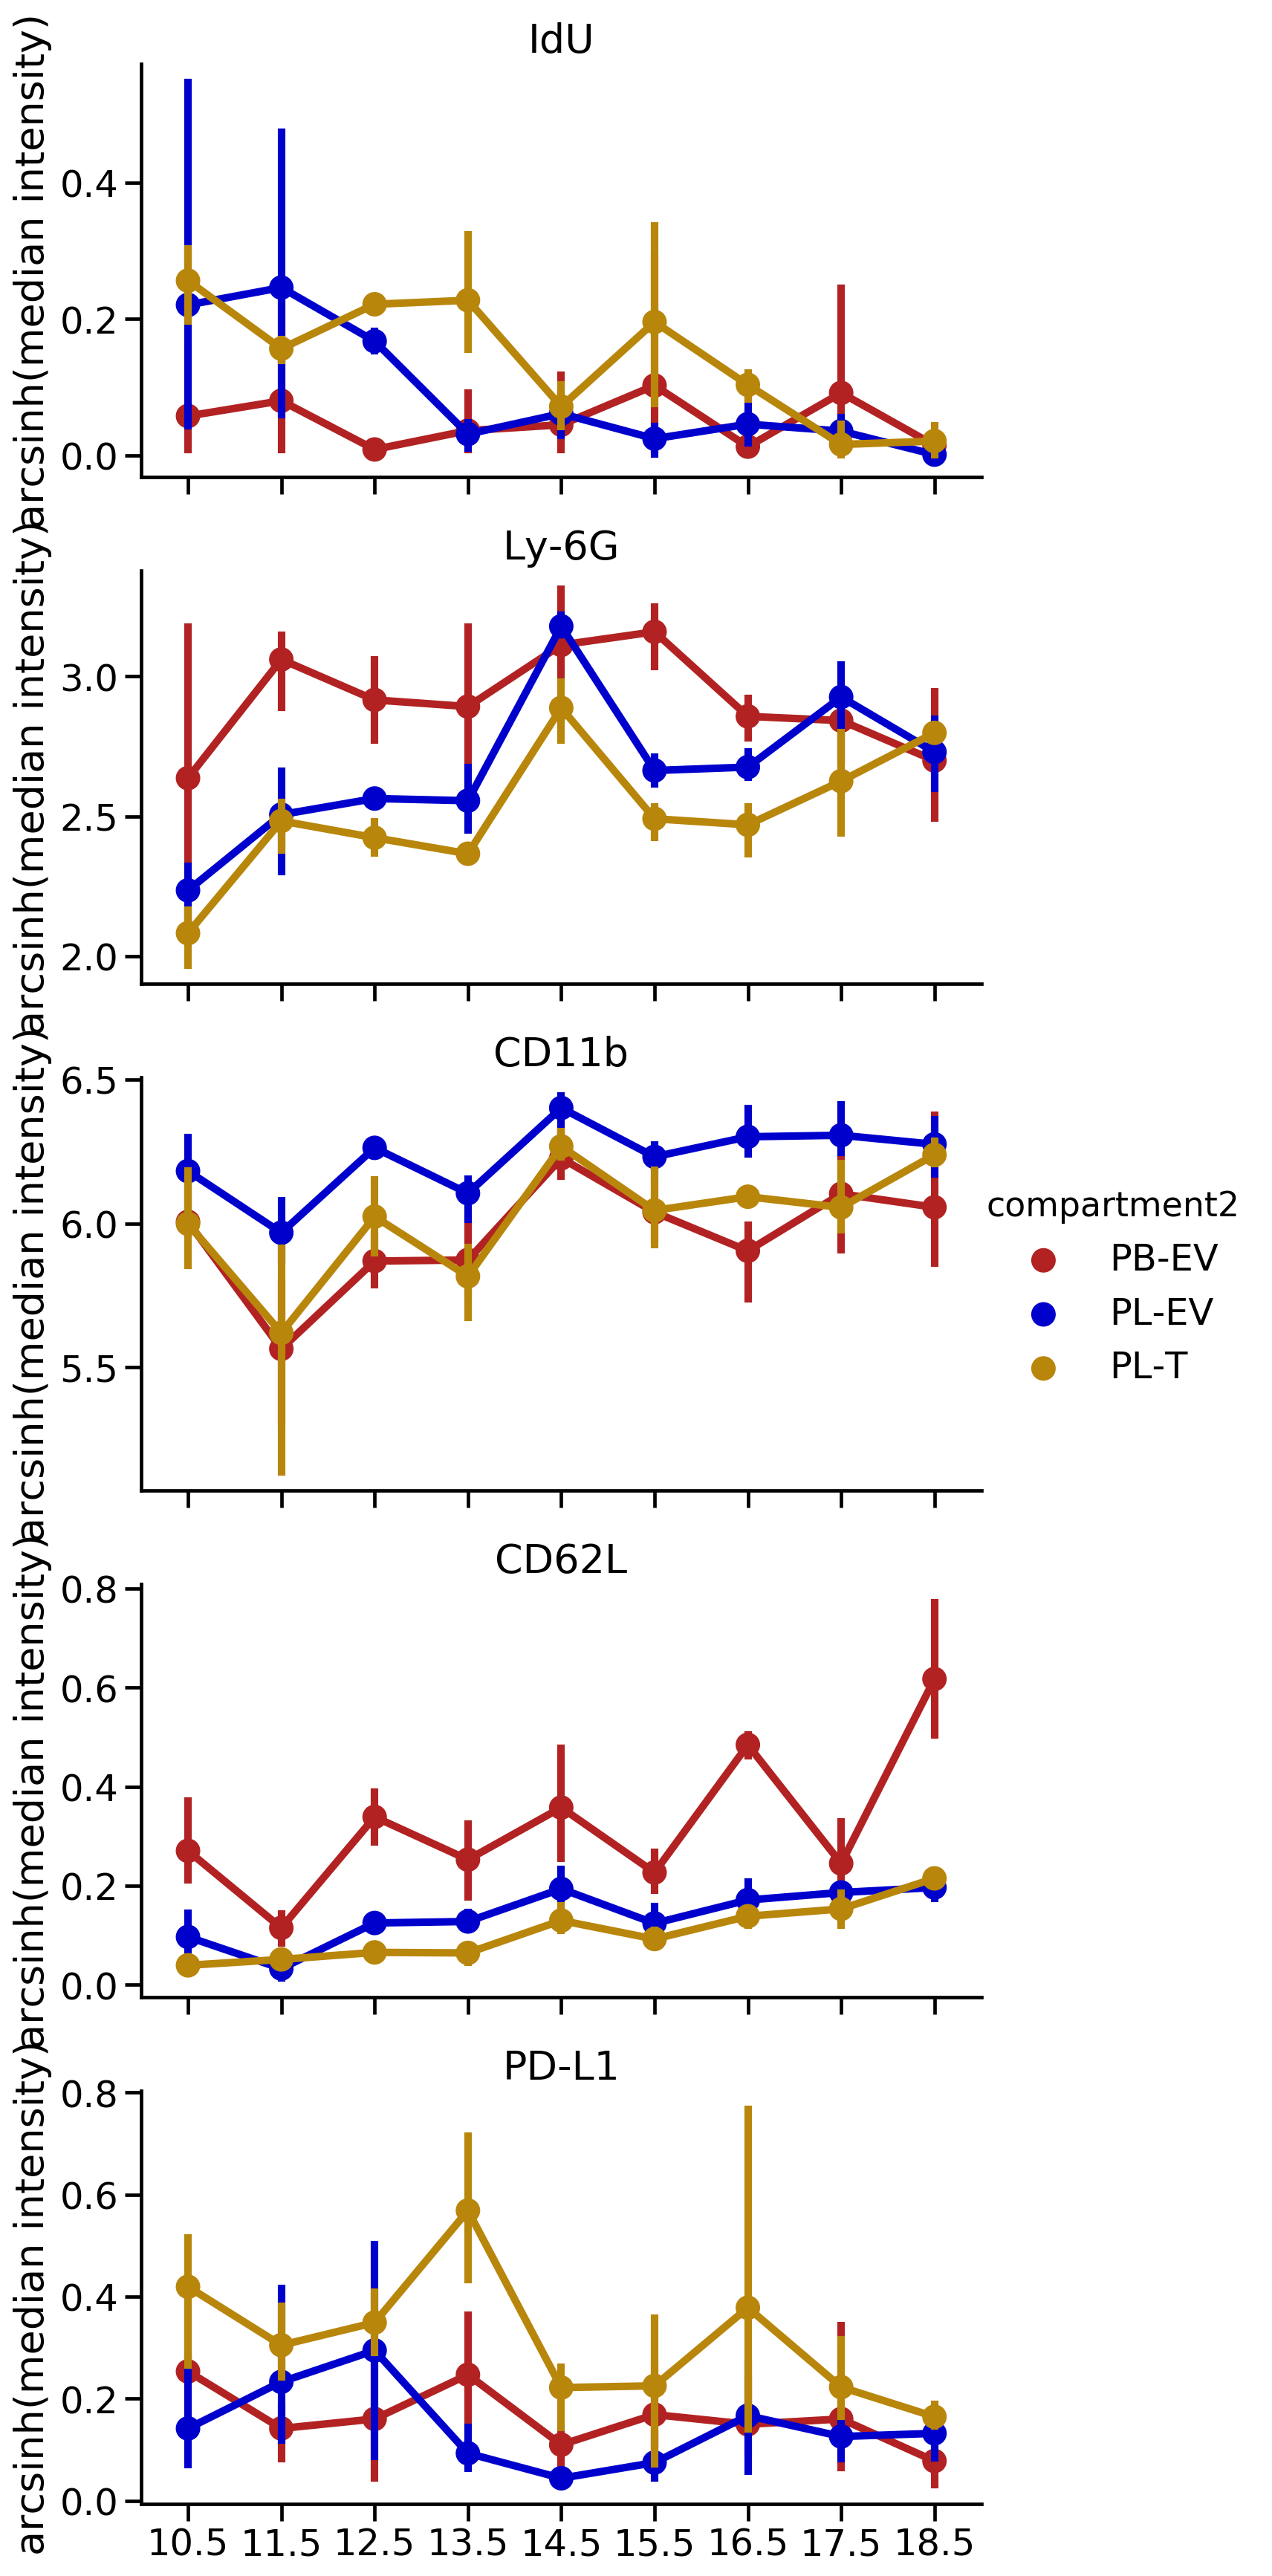

In [233]:
g = sns.catplot(x='float_day', y='median', hue='compartment2', row = 'marker', height=4, aspect=2, sharey= False,
               data=neu_df, kind='point', palette = comp_dict)
(g.set_axis_labels('', 'arcsinh(median intensity)')
  .set_titles('{row_name}'))  

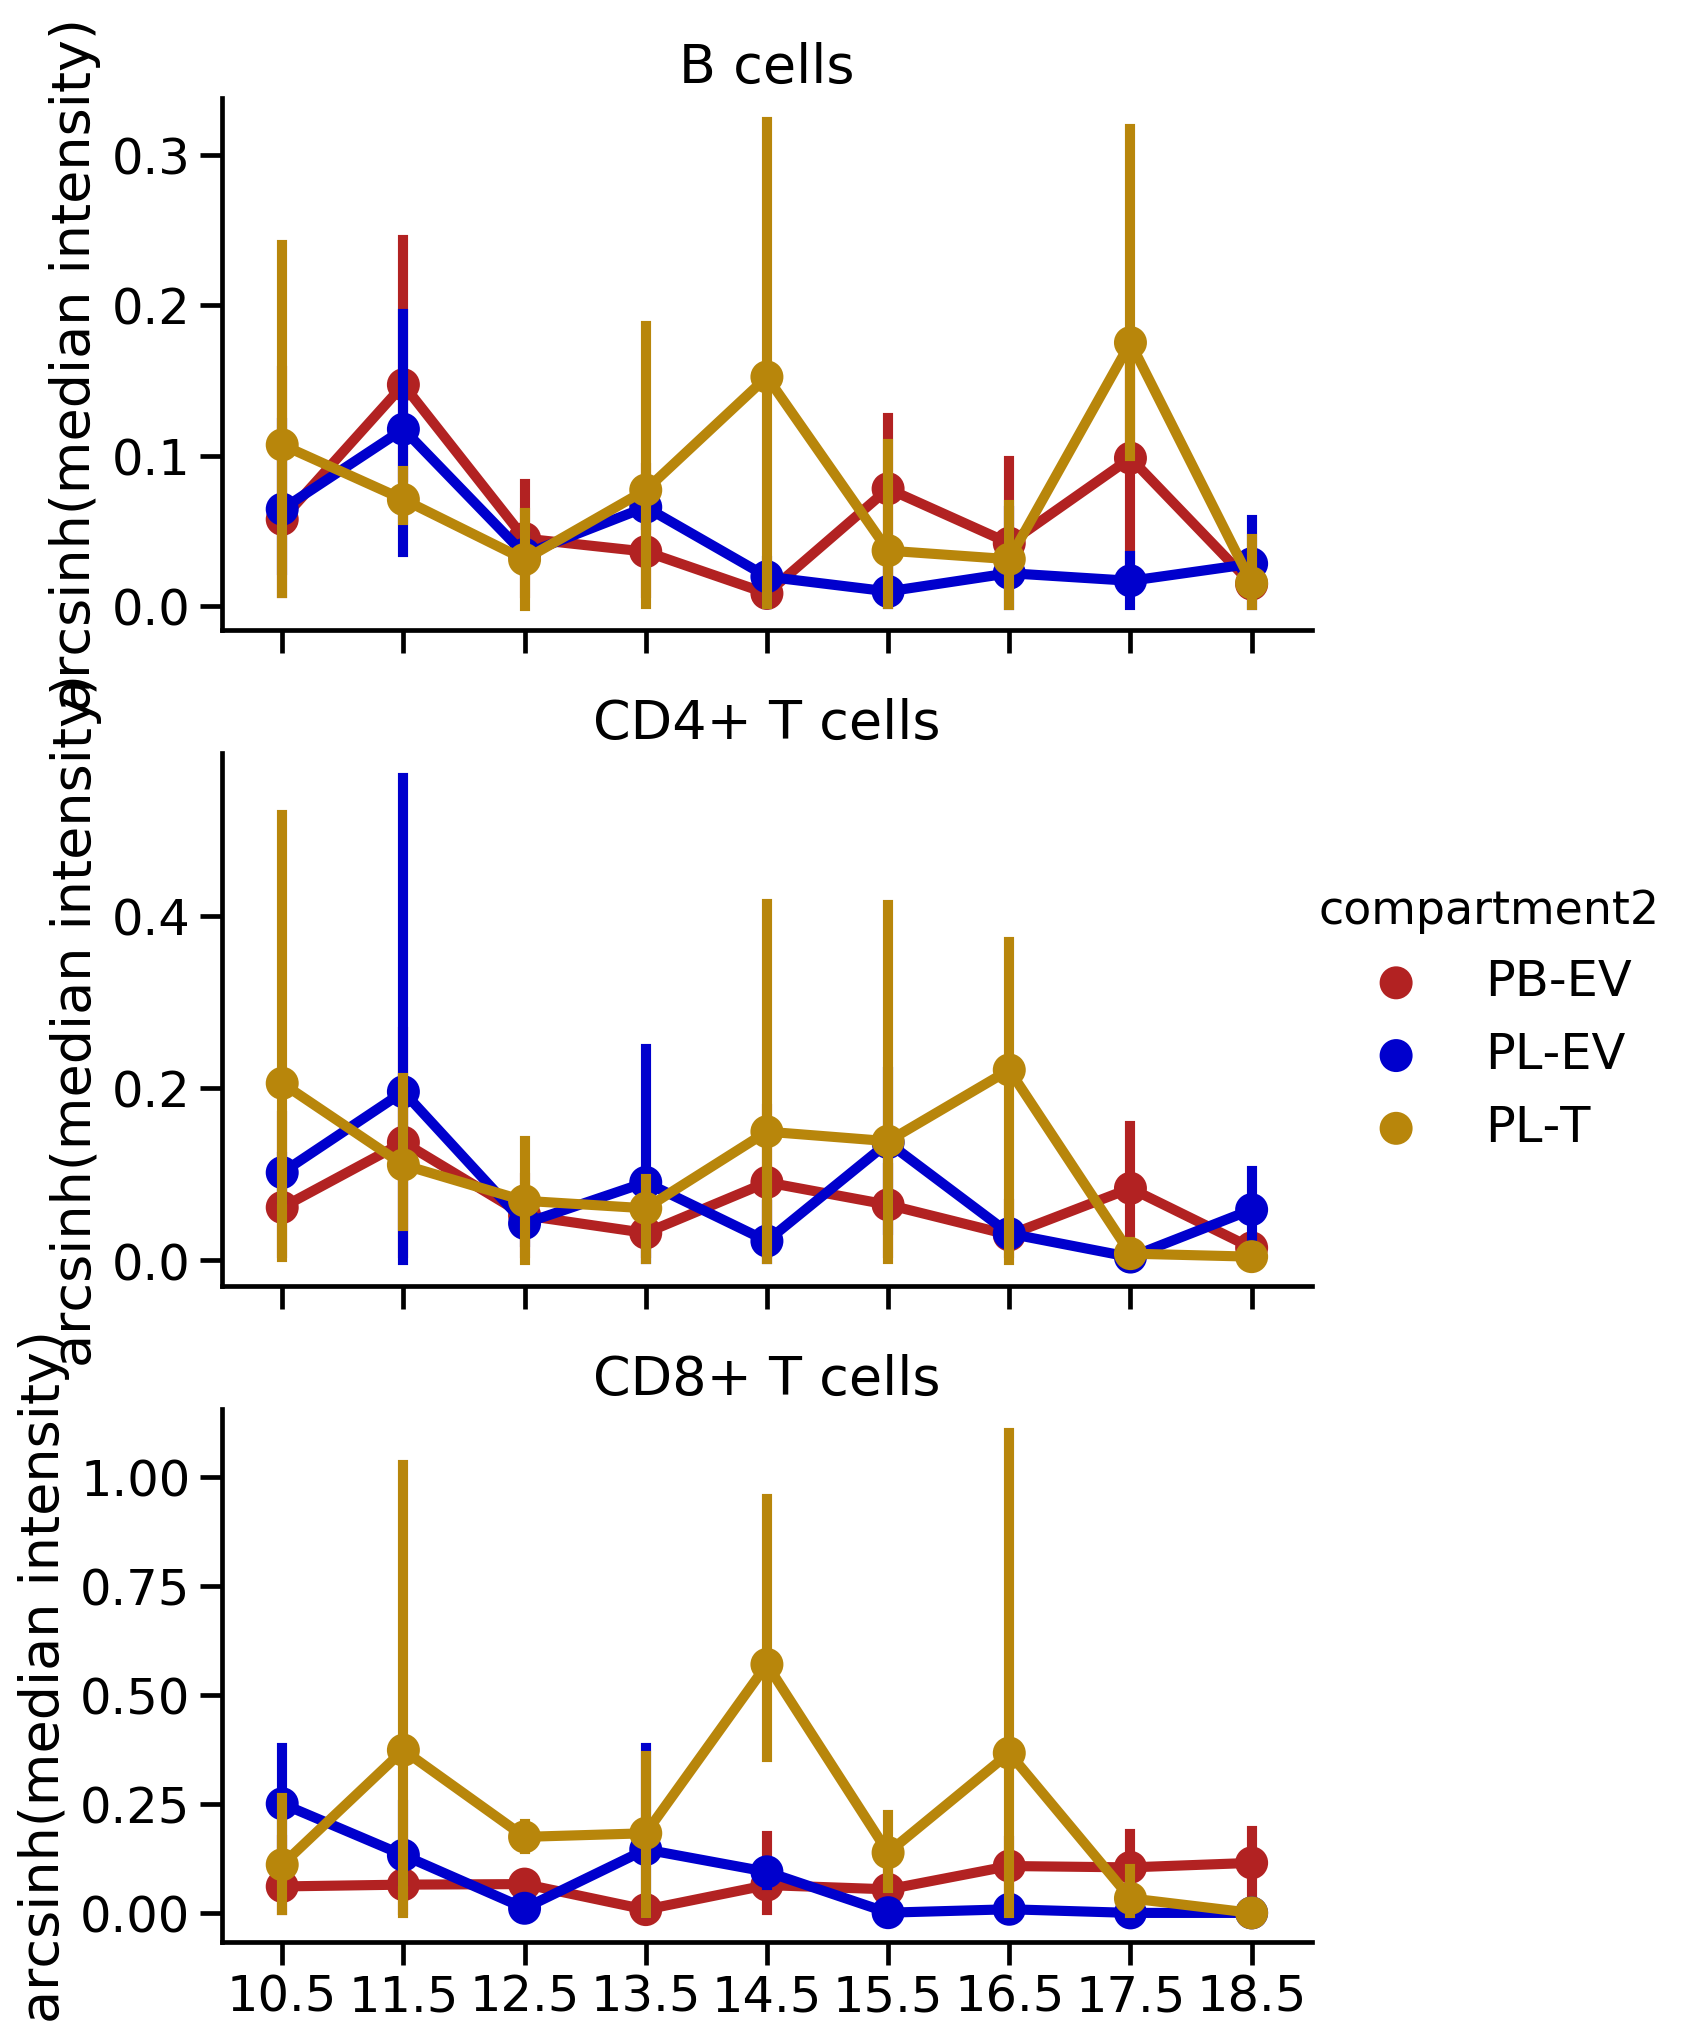

In [234]:
g = sns.catplot(x='float_day', y='median', hue='compartment2', row = 'cell_type_v2', height=4, aspect=2, sharey= False,
               data=prot_medians[prot_medians['cell_type_v2'].isin(['CD4+ T cells','CD8+ T cells', 'B cells']) & prot_medians['marker'].isin(['IdU'])], kind='point', palette = comp_dict)
(g.set_axis_labels('', 'arcsinh(median intensity)')
  .set_titles('{row_name}'))  

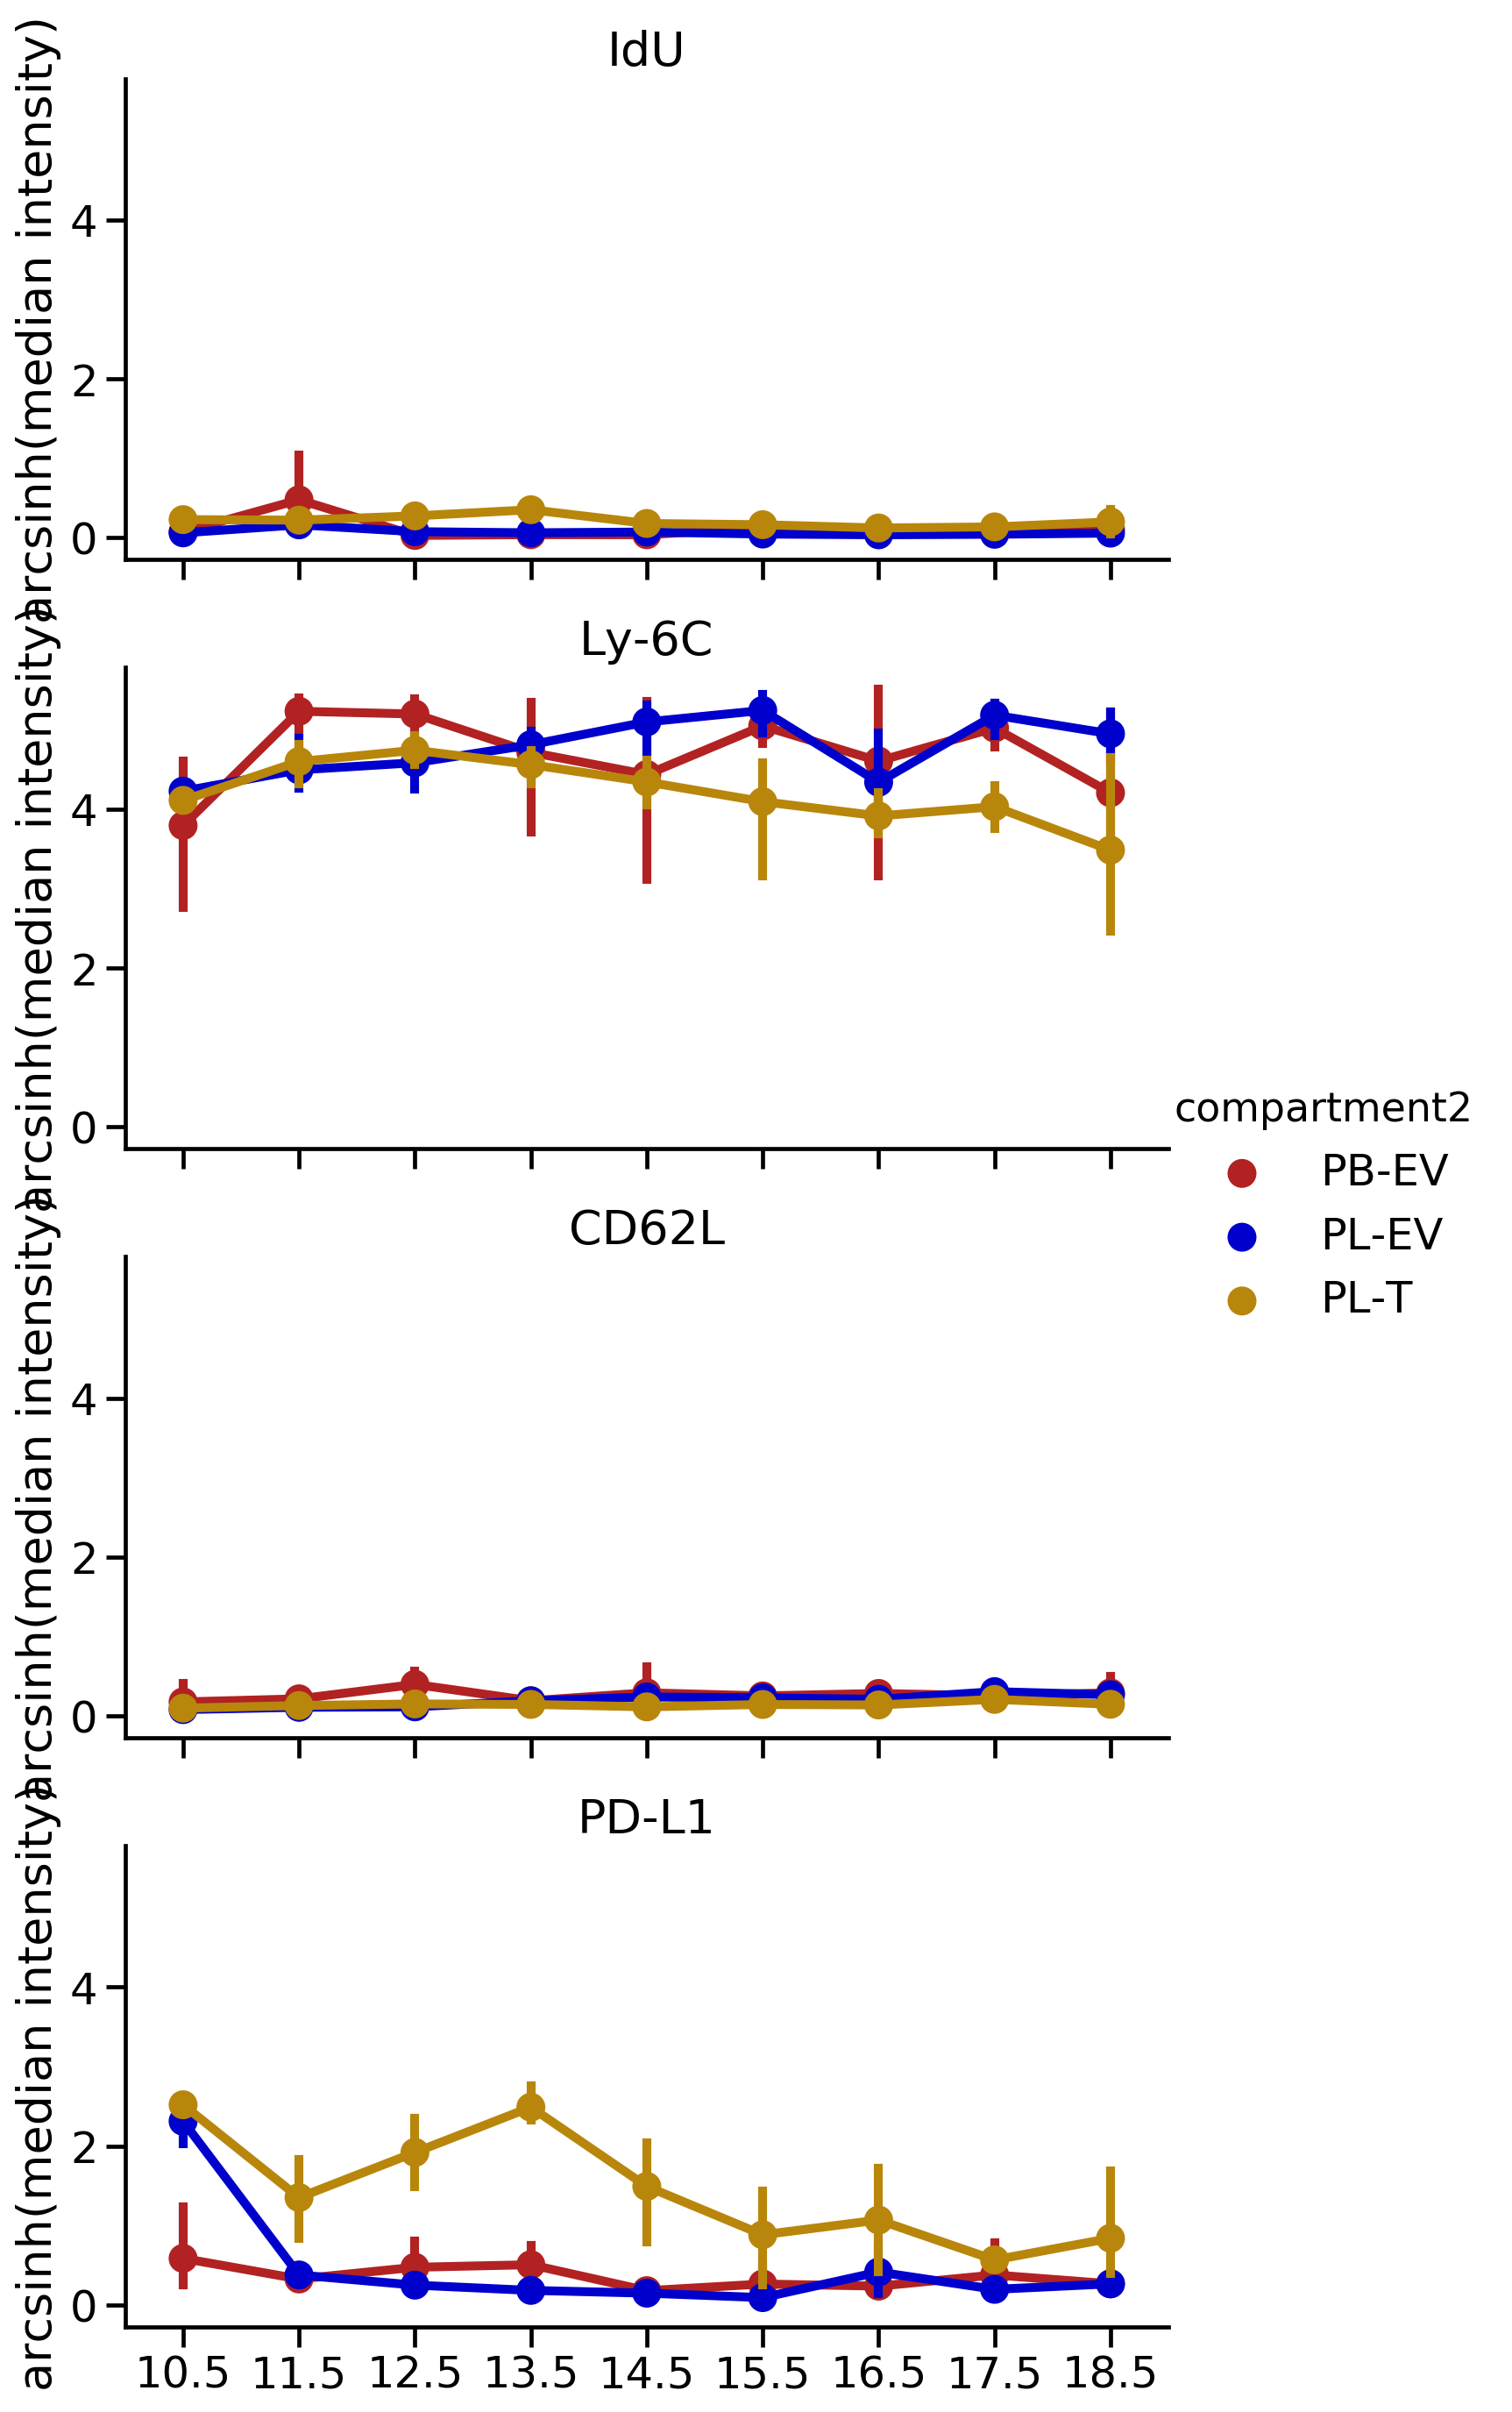

In [235]:
g = sns.catplot(x='float_day', y='median', hue='compartment2', row = 'marker', height=4, aspect=2, sharey= True,
               data=mono_df, kind='point', palette = comp_dict)
(g.set_axis_labels('', 'arcsinh(median intensity)')
  .set_titles('{row_name}'))  

In [240]:
days = [(10.5, 13.5), (13.5, 18.5), (18.5, 10.5)]
combos = [('PL-T', 'PL-EV'), ('PL-EV', 'PB-EV'), ('PB-EV', 'PL-T')]
markers = ['Ly-6C', 'PD-L1']
t_test_mo_marker = pd.DataFrame(columns =['marker', 'comp_only','day1', 'day2', 't-stat_day', 'p-value_day', 'Stat diff day', 'comp1', 'comp2', 'day_only', 't-stat_comp', 'p-value_comp', 'Stat diff comp'])

for marker in markers:   
    for comb in combos:
        for day in days: 
                day1 = mono_df[(mono_df['marker']== marker) & 
                                        (mono_df['compartment2']== comb[0])&
                                        (mono_df['float_day']== day[0])]
                day2 = mono_df[(mono_df['marker']== marker) & 
                                        (mono_df['compartment2']== comb[0])&
                                        (mono_df['float_day']== day[1])]

                t_stat_day, p_day = ttest_ind(day1['median'], day2['median'])
                alpha = 0.05
                if p_day > alpha:
                    dist_day = 'no'
                else:
                    dist_day = 'yes'

                comp_1 = mono_df[(mono_df['marker']== marker) & 
                                        (mono_df['compartment2']== comb[0])&
                                        (mono_df['float_day']== day[0])]
                comp_2 = mono_df[(mono_df['marker']== marker) & 
                                        (mono_df['compartment2']== comb[1])&
                                        (mono_df['float_day']== day[0])]

                t_stat_comp, p_comp = ttest_ind(comp_1['median'], comp_2['median'])
                alpha = 0.05
                if p_comp > alpha:
                    dist_comp = 'no'
                else:
                    dist_comp = 'yes'


                data_df = pd.DataFrame(data ={'marker': [marker],
                                              'comp_only': [comb[0]],
                                              'day1':[day[0]],
                                              'day2':[day[1]],
                                              't-stat_day': [t_stat_day], 
                                              'p-value_day': [p_day], 
                                              'Stat diff day':[ dist_day],
                                              'comp1': [comb[0]],
                                              'comp2': [comb[1]],
                                              'day_only':[day[0]],
                                              't-stat_comp': [t_stat_comp], 
                                              'p-value_comp': [p_comp], 
                                              'Stat diff comp':[ dist_comp]})
                t_test_mo_marker = t_test_mo_marker.append(data_df)

In [241]:
t_test_mo_marker

marker comp_only  day1  day2  t-stat_day  p-value_day Stat diff day  comp1  \
0  Ly-6C      PL-T  10.5  13.5   -3.171087     0.033823           yes   PL-T   
0  Ly-6C      PL-T  13.5  18.5    1.661769     0.171894            no   PL-T   
0  Ly-6C      PL-T  18.5  10.5   -0.979123     0.382958            no   PL-T   
0  Ly-6C     PL-EV  10.5  13.5   -6.302506     0.003240           yes  PL-EV   
0  Ly-6C     PL-EV  13.5  18.5   -0.702843     0.520905            no  PL-EV   
0  Ly-6C     PL-EV  18.5  10.5    4.089068     0.014987           yes  PL-EV   
0  Ly-6C     PB-EV  10.5  13.5   -1.239851     0.282797            no  PB-EV   
0  Ly-6C     PB-EV  13.5  18.5    0.693639     0.526083            no  PB-EV   
0  Ly-6C     PB-EV  18.5  10.5    0.543621     0.615582            no  PB-EV   
0  PD-L1      PL-T  10.5  13.5    0.204479     0.847962            no   PL-T   
0  PD-L1      PL-T  13.5  18.5    3.707495     0.020699           yes   PL-T   
0  PD-L1      PL-T  18.5  10.5   -3.924254     0.017186           yes   PL-T   
0  PD-L1     PL-EV  10.5  13.5   13.083643     0.000197           yes  PL-EV   
0  PD-L1     PL-EV  13.5  18.5   -1.713653     0.161747            no  PL-EV   
0  PD-L1     PL-EV  18.5  10.5  -12.643551     0.000225           yes  PL-EV   
0  PD-L1     PB-EV  10.5  13.5    0.228069     0.830777            no  PB-EV   
0  PD-L1     PB-EV  13.5  18.5    1.644063     0.175508            no  PB-EV   
0  PD-L1     PB-EV  18.5  10.5   -0.963670     0.389783            no  PB-EV   

   comp2  day_only  t-stat_comp  p-value_comp Stat diff comp  
0  PL-EV      10.5    -1.587531      0.187585             no  
0  PL-EV      13.5    -1.635514      0.177281             no  
0  PL-EV      18.5    -2.221484      0.090463             no  
0  PB-EV      10.5     0.796517      0.470332             no  
0  PB-EV      13.5     0.185569      0.861813             no  
0  PB-EV      18.5     1.330211      0.254224             no  
0   PL-T      10.5    -0.579048      0.593600             no  
0   PL-T      13.5     0.295703      0.782172             no  
0   PL-T      18.5     0.871671      0.432583             no  
0  PL-EV      10.5     1.218485      0.289989             no  
0  PL-EV      13.5    16.419509      0.000081            yes  
0  PL-EV      18.5     1.350283      0.248268             no  
0  PB-EV      10.5     4.783356      0.008754            yes  
0  PB-EV      13.5    -2.421265      0.072664             no  
0  PB-EV      18.5    -0.011596      0.991304             no  
0   PL-T      10.5    -5.861719      0.004228            yes  
0   PL-T      13.5   -10.606823      0.000447            yes  
0   PL-T      18.5    -1.334404      0.252968             no

# Figure 2H

In [25]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
umap_path = os.path.join(subsample_path, '20200508_maternal500_fetal_wo_outliers.csv')
adata_df= pd.read_csv(umap_path)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


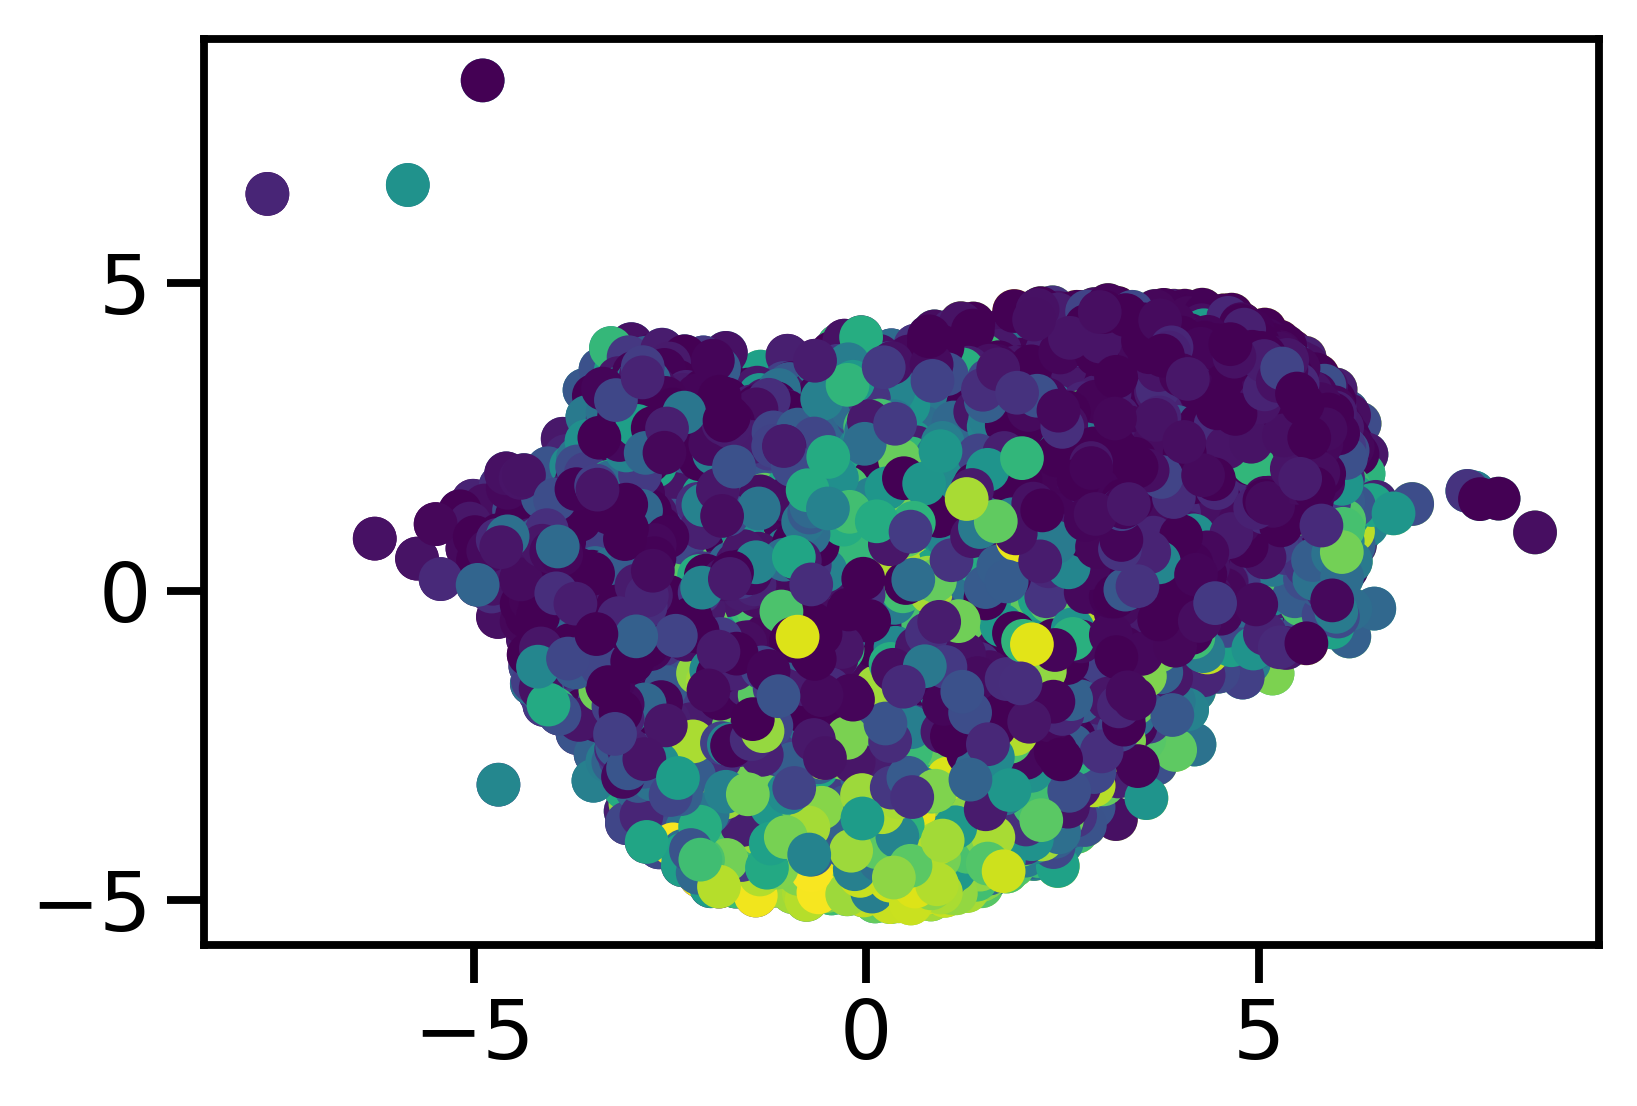

In [26]:
clean_df = adata_df[(adata_df['test_status'] == 'test') & 
                    adata_df['organ'].isin(['PB', 'PL_F', 'PL_M'])]
mono_df = clean_df[(clean_df['challenge'] == 'sal') & (clean_df['timePI'] == '2hr') & (clean_df['origin'] == 'maternal')& (clean_df['cell_type_v2'] == 'Monocytes')]
int_markers = ['Ly-6C','PD-L1']
mono_df[int_markers] = mono_df[int_markers].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
adata_melt= mono_df.melt(id_vars=['compartment2','cell_type_v2', 'cage','id', 'day', 'umap1', 'umap2'], value_vars = int_markers)
adata_melt.rename(columns = {'variable': 'marker', 'value': 'median'}, inplace = True)
points = plt.scatter(adata_melt['umap1'], adata_melt['umap2'], c = adata_melt['median'], cmap='viridis')

In [159]:
adata_melt.loc[:, 'stage'] = np.where(adata_melt.loc[:, 'day'].isin(['E10.5', 'E11.5','E12.5', 'E13.5']), 'early', 'late')

In [160]:
adata_melt.head(5)

compartment2 cell_type_v2  cage  id    day     umap1     umap2 marker  \
0        PL-EV    Monocytes  9582  14  E15.5  1.797786 -1.826254  Ly-6C   
1        PL-EV    Monocytes  9582  14  E15.5 -2.867521  0.332538  Ly-6C   
2         PL-T    Monocytes  9582  14  E15.5 -0.955799 -1.288894  Ly-6C   
3        PL-EV    Monocytes  9582  14  E15.5  3.145008  1.840034  Ly-6C   
4         PL-T    Monocytes  9582  14  E15.5  0.763425 -2.356456  Ly-6C   

     median stage  
0  0.670374  late  
1  0.435592  late  
2  0.070589  late  
3  0.720508  late  
4  0.566863  late

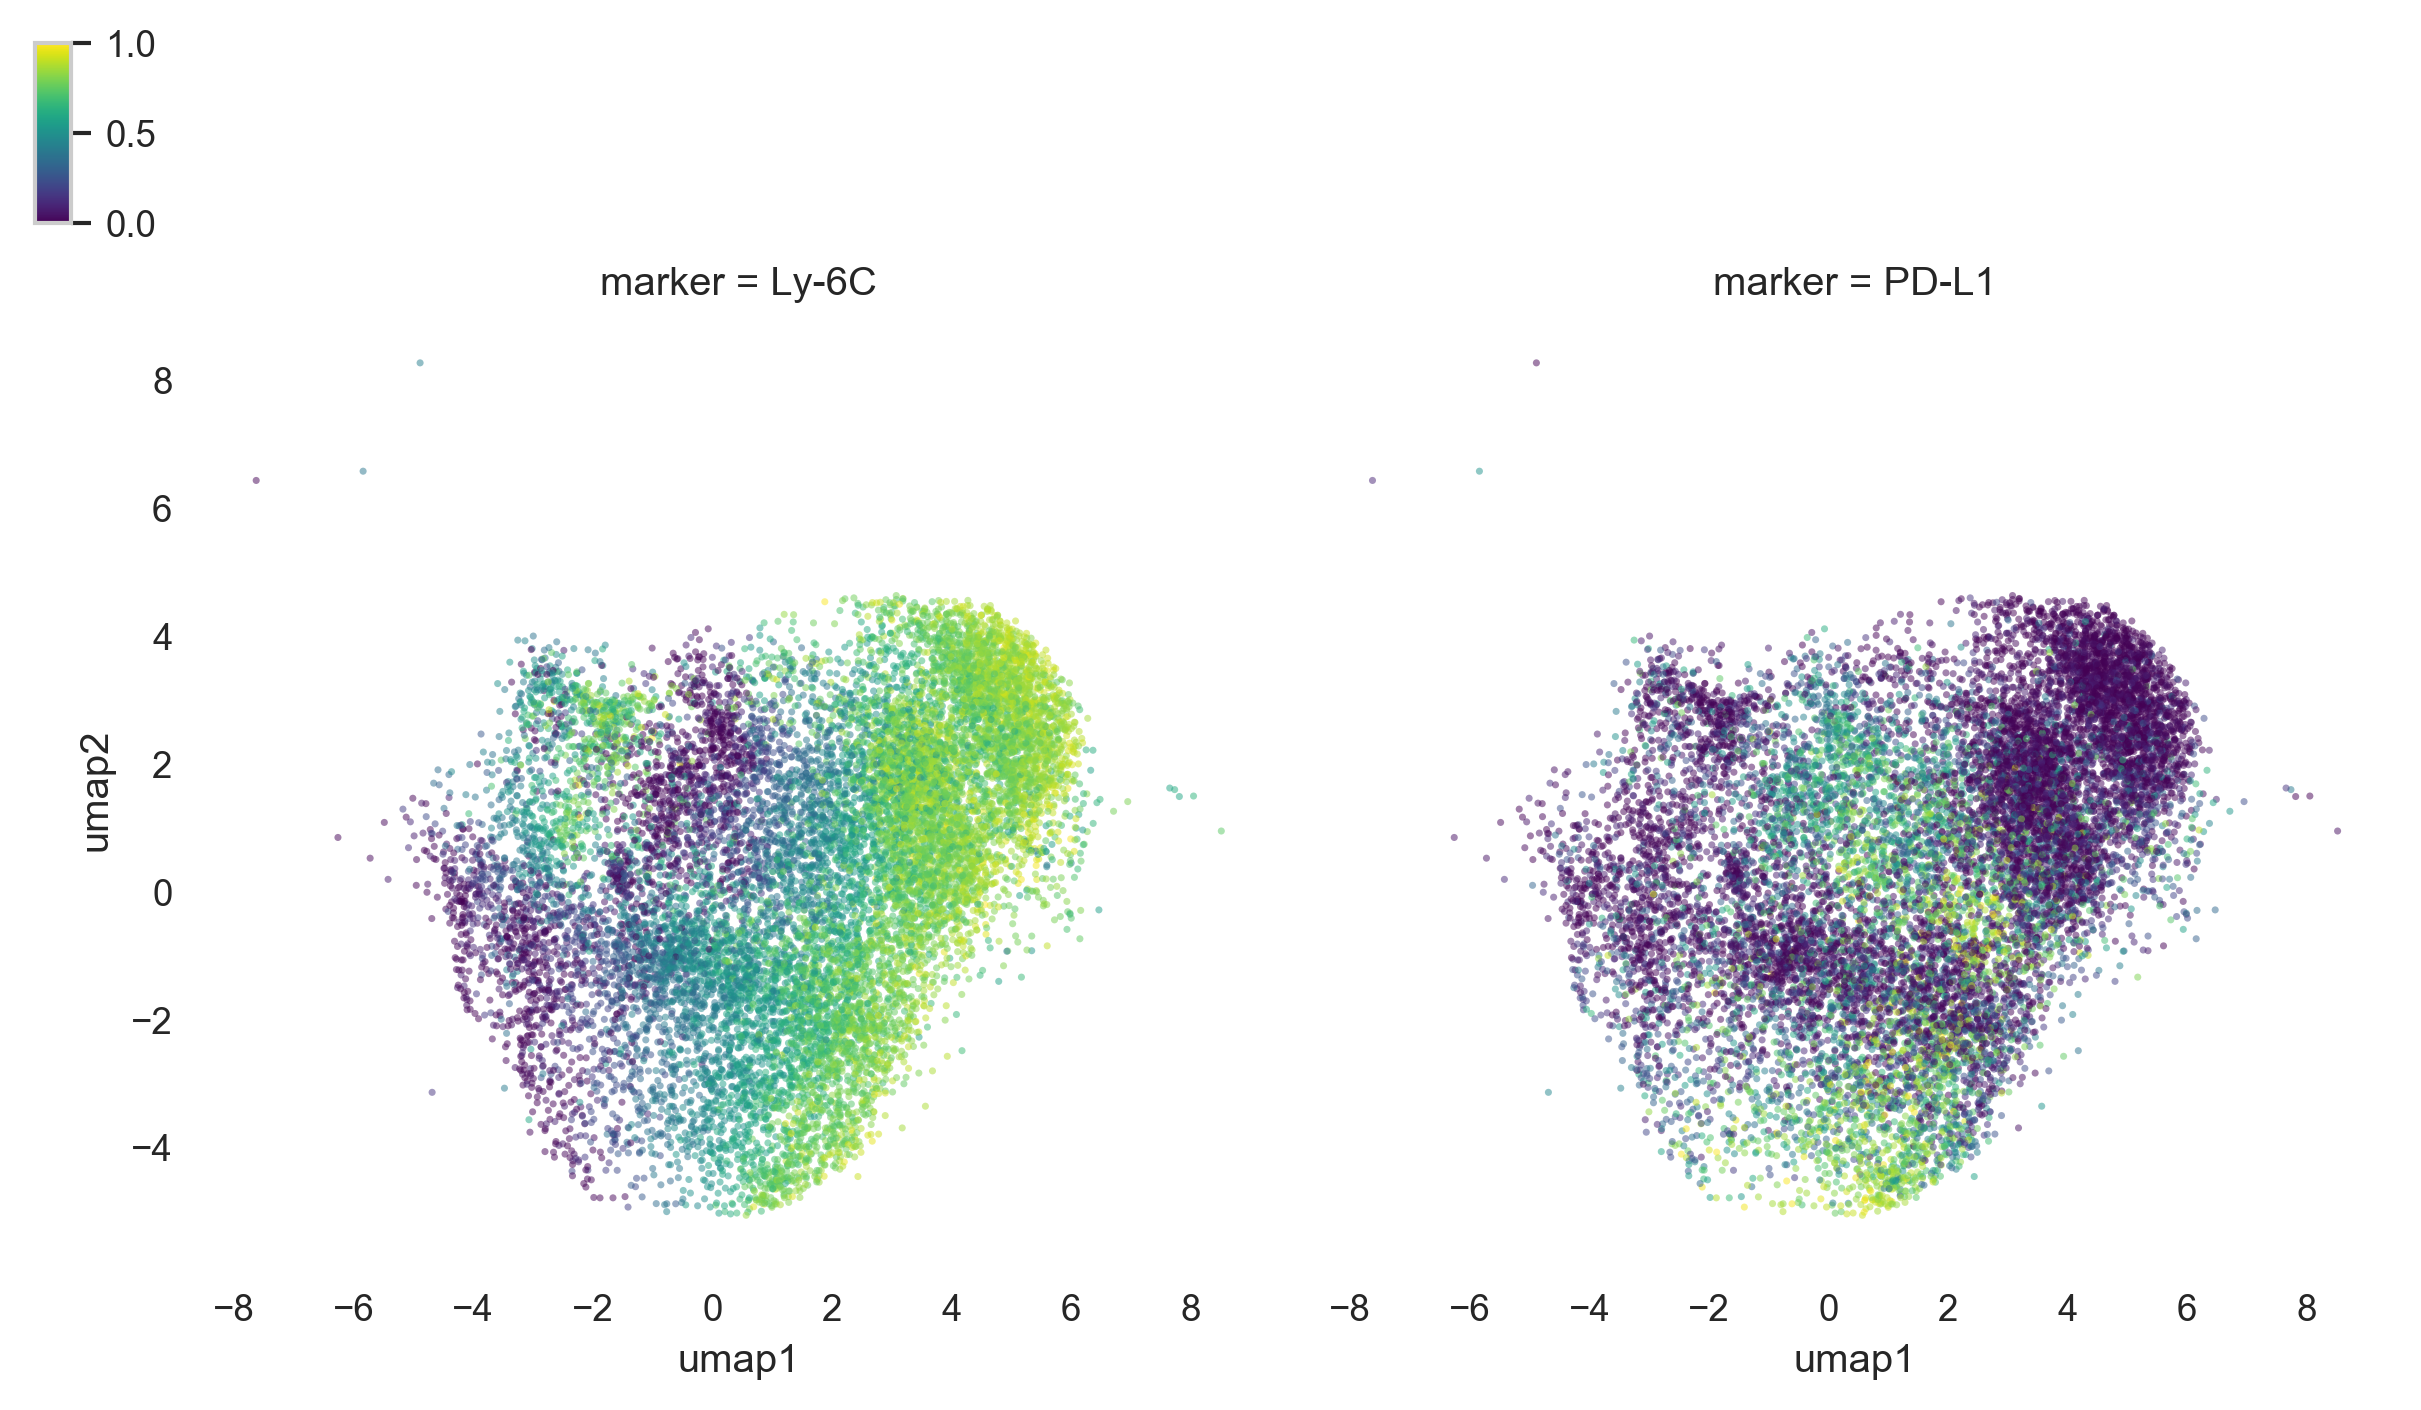

In [31]:
sns.set_context('paper', font_scale= 1)
g = sns.relplot(x='umap1', y= 'umap2', hue = 'median', col= 'marker', data= adata_melt,
                height=4, aspect=1, kind="scatter", palette = 'viridis', 
                marker='.', size = 0.1, linewidth = 0, alpha = 0.5, legend = False)
cax = g.fig.add_axes([0, 1, 0.015, 0.15])
plt.colorbar(points, cax=cax)
#(g.set_axis_labels('UMAP1', 'UMAP2')
  #.set_titles('{col_name}'))
sns.despine(left = True, bottom = True)

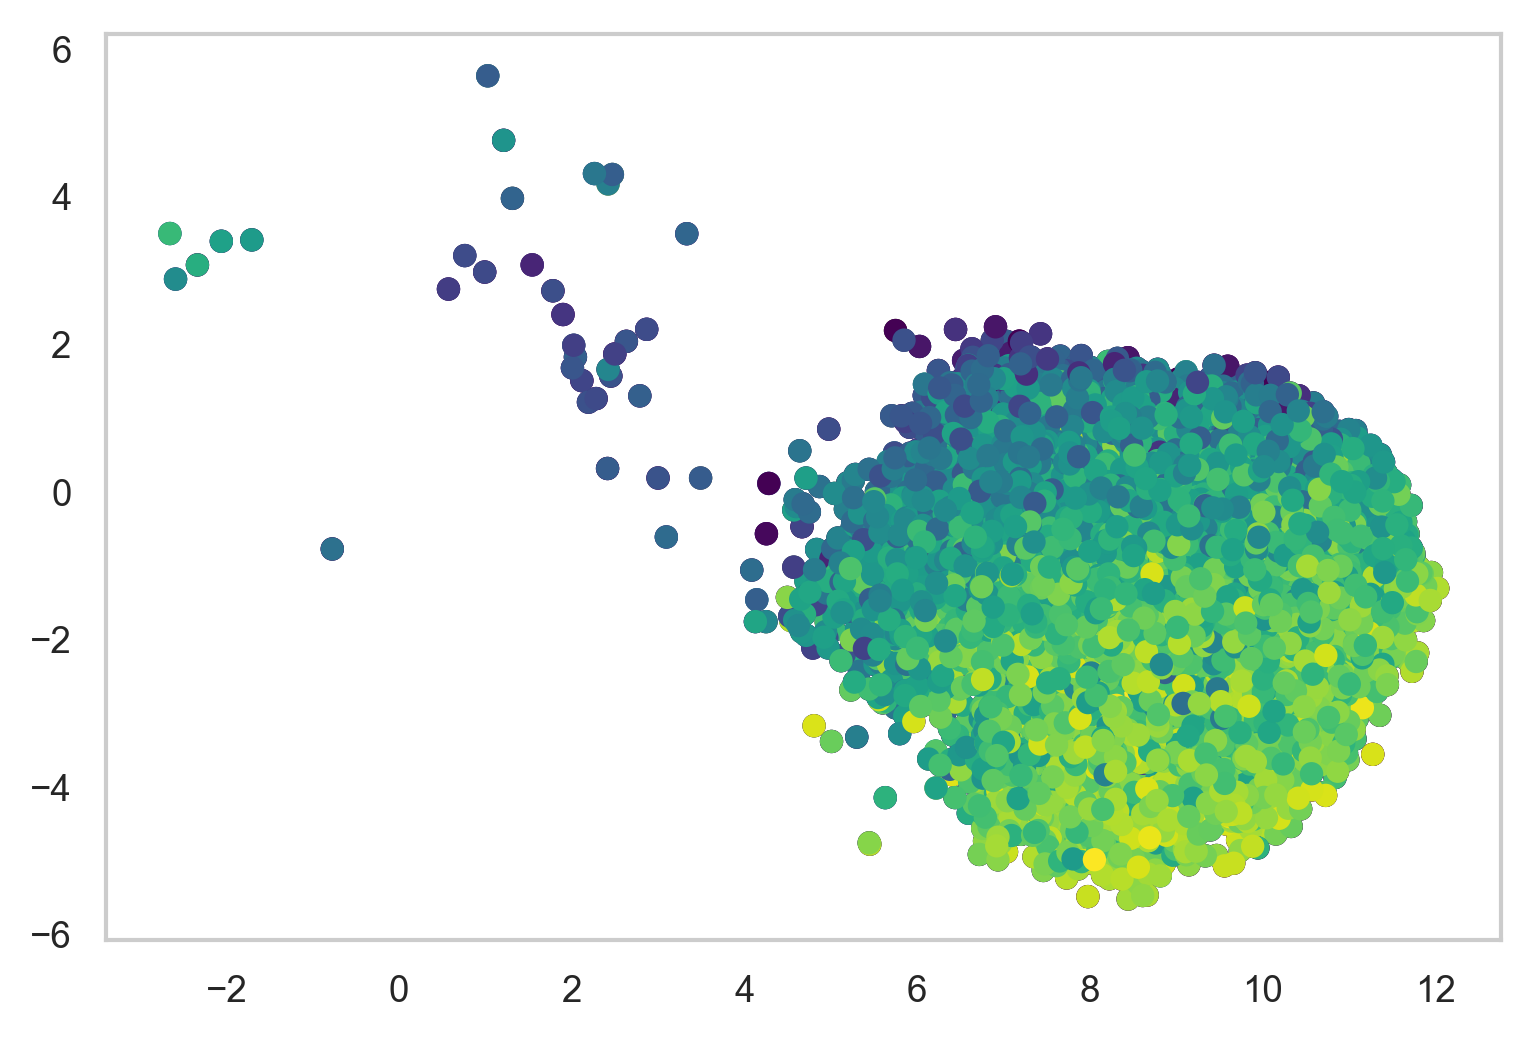

In [38]:
neu_df = clean_df[(clean_df['challenge'] == 'sal') & (clean_df['timePI'] == '2hr') & (clean_df['origin'] == 'maternal')& (clean_df['cell_type_v2'] == 'Neutrophils')]
int_markers = ['PD-L1', 'IdU','Ly-6G']
neu_df[int_markers] = neu_df[int_markers].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
adata_melt= neu_df.melt(id_vars=['compartment2','cell_type_v2', 'cage','id', 'day', 'umap1', 'umap2'], value_vars = int_markers)
adata_melt.rename(columns = {'variable': 'marker', 'value': 'median'}, inplace = True)
points = plt.scatter(adata_melt['umap1'], adata_melt['umap2'], c = adata_melt['median'], cmap='viridis')

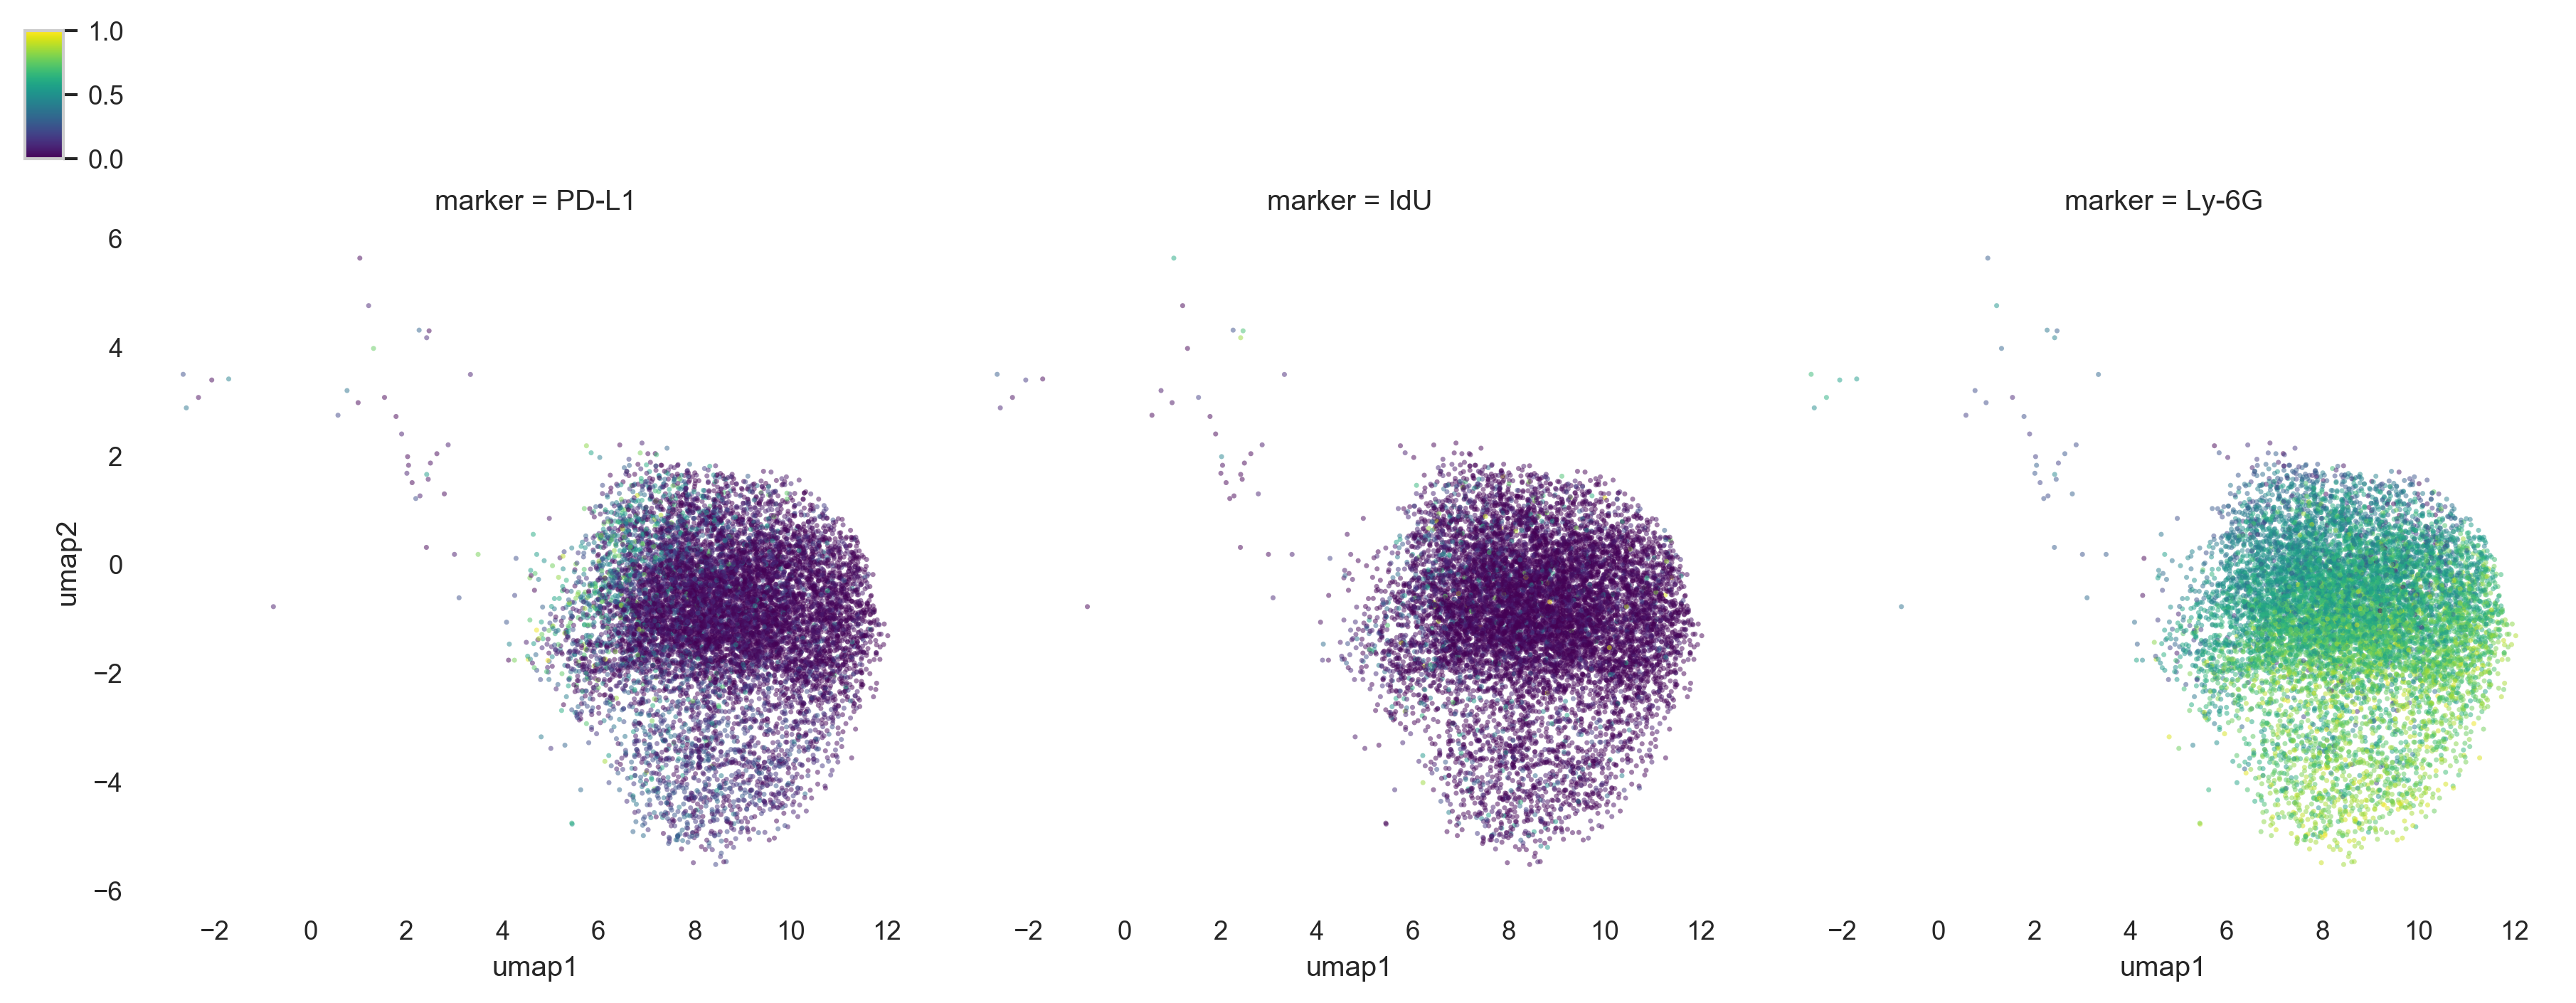

In [46]:
sns.set_context('paper', font_scale= 1)
g = sns.relplot(x='umap1', y= 'umap2', hue = 'median', col= 'marker', data= adata_melt, #[adata_melt['compartment2'].isin(['PL-T', 'PL-EV'])],
                height=4, aspect=1, kind="scatter", palette = 'viridis', 
                marker='.', size = 0.1, linewidth = 0, alpha = 0.5, legend = False)
cax = g.fig.add_axes([0, 1, 0.015, 0.15])
plt.colorbar(points, cax=cax)
#(g.set_axis_labels('UMAP1', 'UMAP2')
  #.set_titles('{col_name}'))
sns.despine(left = True, bottom = True)